In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input, concatenate, BatchNormalization, Activation
from keras.models import Model, Sequential
from keras.optimizers import Adagrad

#Import another jupyter notebook
import import_ipynb
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/04_batchnormal_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\twitter\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\twitter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [7]:
#Load POS data
def get_pos(file):
    pos =[]
    with open(file, 'r') as f:
        for line in f:
            pos.append([int(i) for i in line.split(',')])
    pos= np.asarray(pos)
    return pos

train_pos =get_pos('output_trainTestData/SamEval_train_pos.csv')
test_pos = get_pos('output_trainTestData/SamEval_test_pos.csv')

In [8]:
#Load Sentiment data
def get_sentiment(file):
    senti =[]
    with open(file, 'r') as f:
        for line in f:
            senti.append([float(i) for i in line.split(',')])
    senti= np.asarray(senti)
    return senti

train_senti_blob =get_sentiment('output_trainTestData/SamEval_train_data_sentiment_blob.csv')
test_senti_blob = get_sentiment('output_trainTestData/SamEval_test_data_sentiment_blob.csv')

### Hyperparameter for all models

In [9]:
BATCH_SIZE = 64
NUM_EPOCHS = 30
softmax = True
lossfunction ='binary_crossentropy'
optimizer = Adagrad(lr=0.001)

Instructions for updating:
Colocations handled automatically by placer.


# Normalization before hidden Layer

In [18]:
#Word Embeddings
wv_layer = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences = wv_layer(input_embedding)
x_embedding = BatchNormalization()(embedded_sequences)
x_embedding = Dense(600, activation='relu', use_bias = False)(x_embedding)
x_embedding = Flatten()(x_embedding)

#Sentiment Features
input_sentiment = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment = BatchNormalization()(input_sentiment)
x_sentiment = Dense(600, activation='relu', use_bias = False)(x_sentiment)

#POS Features
input_pos = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos = BatchNormalization()(input_pos)
x_pos = Dense(600, activation='relu', use_bias = False)(x_pos)

#Concatination
concat = concatenate([x_embedding, x_sentiment, x_pos])

preds = Dense(2, activation='softmax')(concat)

model = Model(inputs=[input_embedding, input_sentiment, input_pos], outputs=preds)


-----Fold 1--------


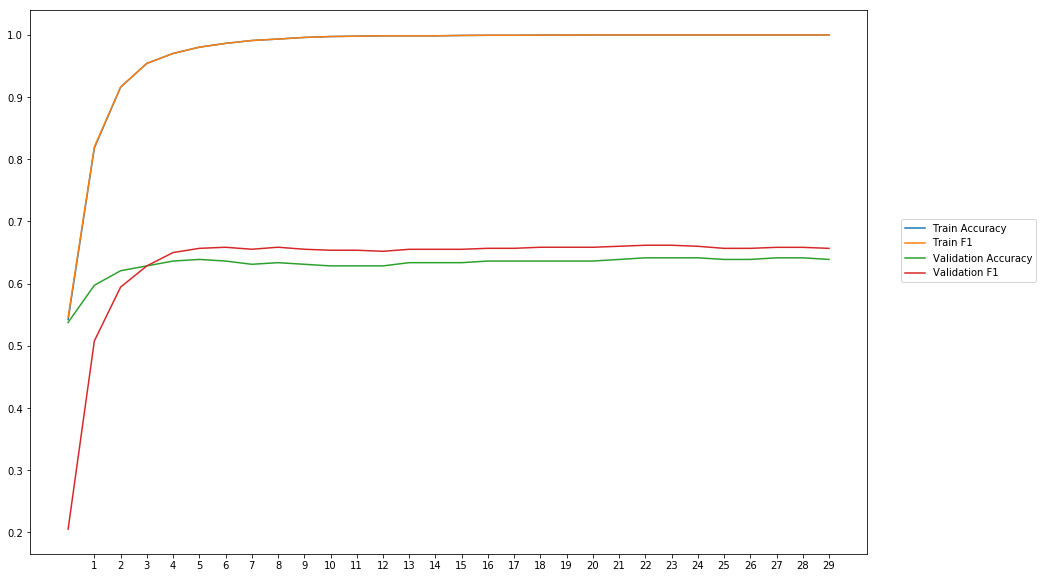

Average Accuracy: 63.08%
Average Precision: 62.52%
Average Recall: 66.28%
Average F1: 63.39%

-----Fold 2--------


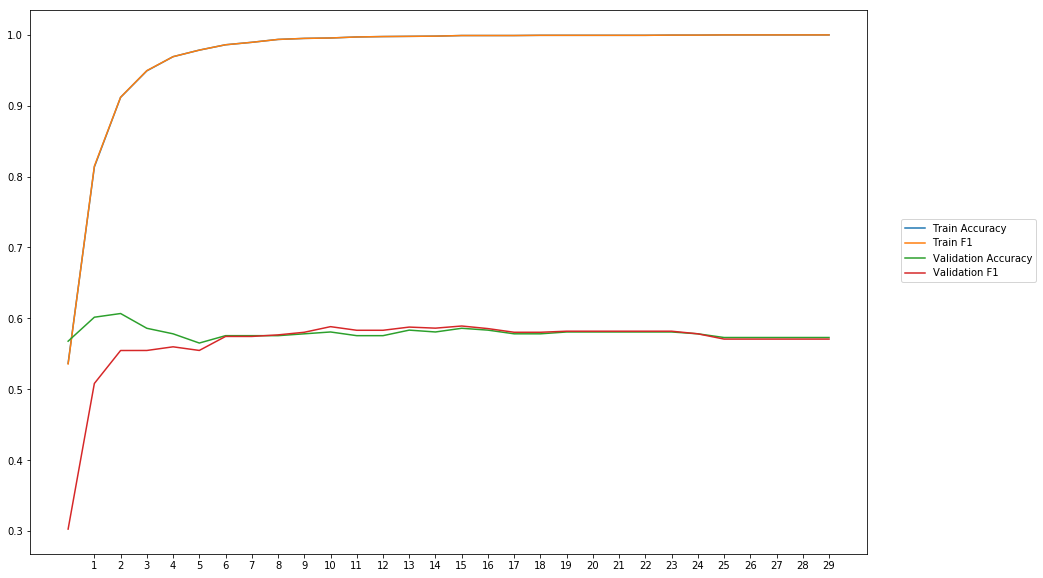

Average Accuracy: 57.93%
Average Precision: 58.63%
Average Recall: 55.78%
Average F1: 56.48%

-----Fold 3--------


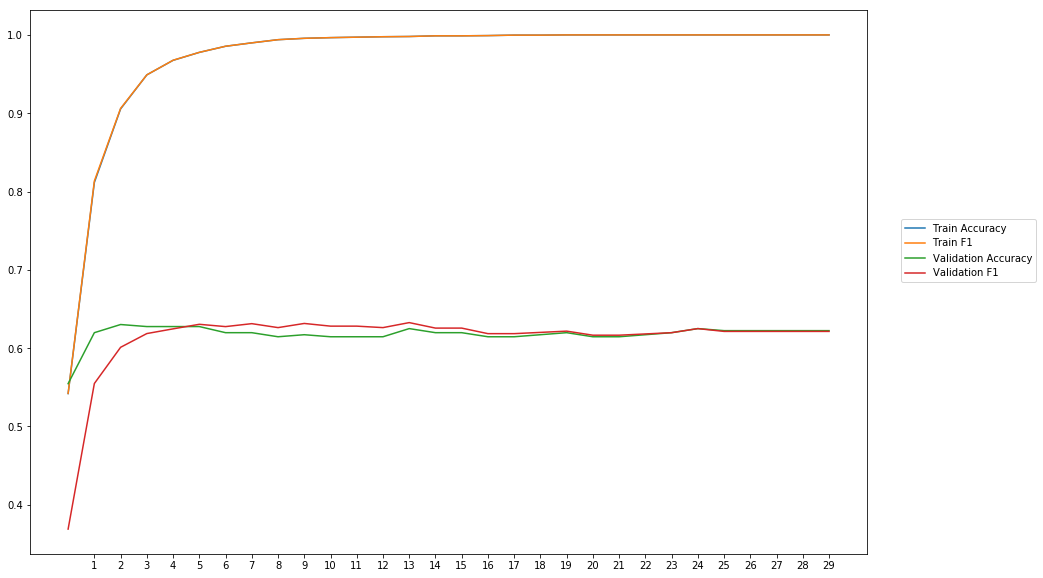

Average Accuracy: 61.79%
Average Precision: 61.74%
Average Recall: 61.36%
Average F1: 61.21%

-----Fold 4--------


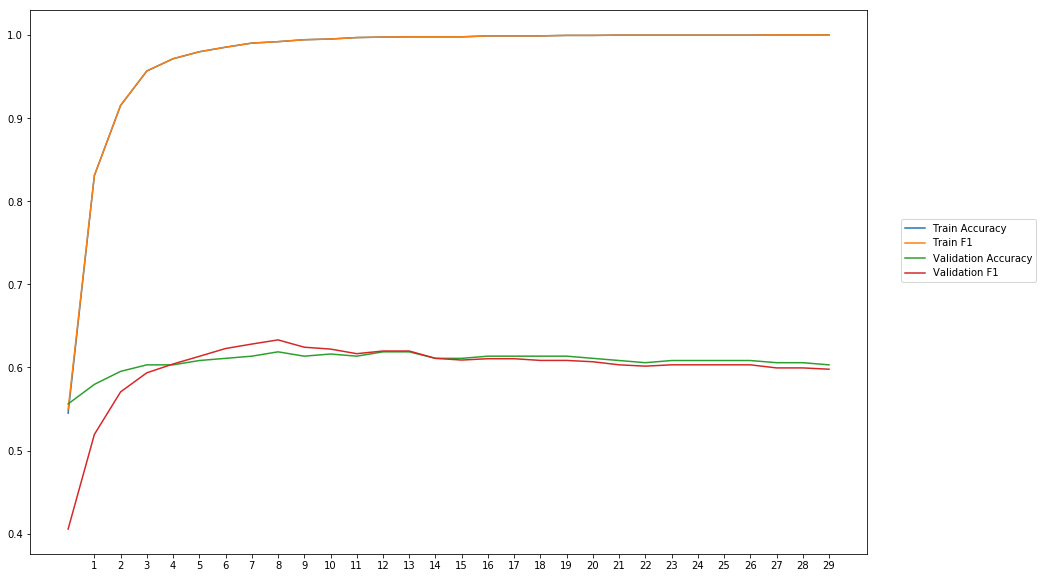

Average Accuracy: 60.73%
Average Precision: 60.90%
Average Recall: 59.37%
Average F1: 59.91%

-----Fold 5--------


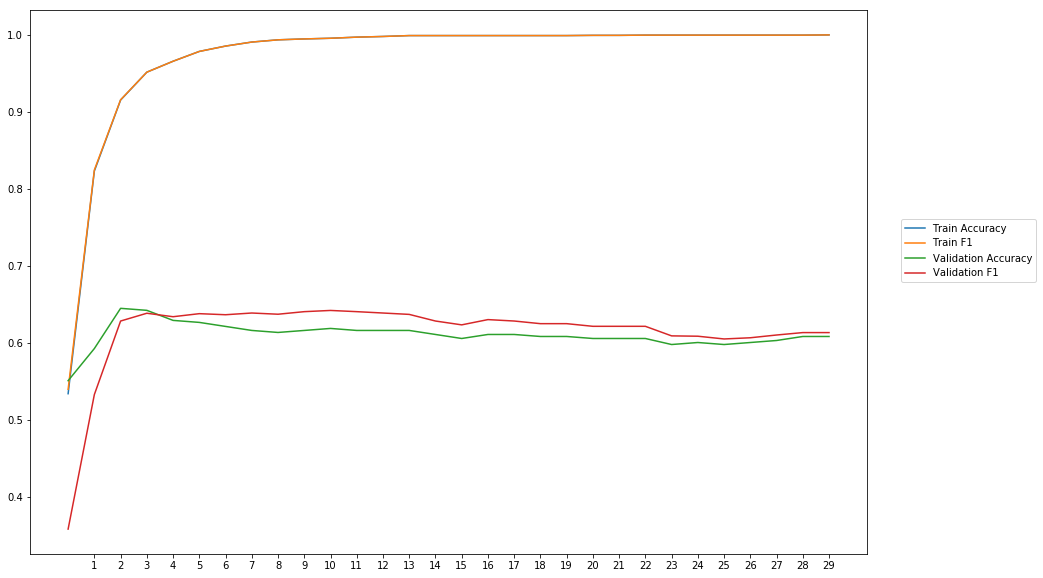

Average Accuracy: 61.04%
Average Precision: 60.57%
Average Recall: 63.16%
Average F1: 61.45%

-----Fold 6--------


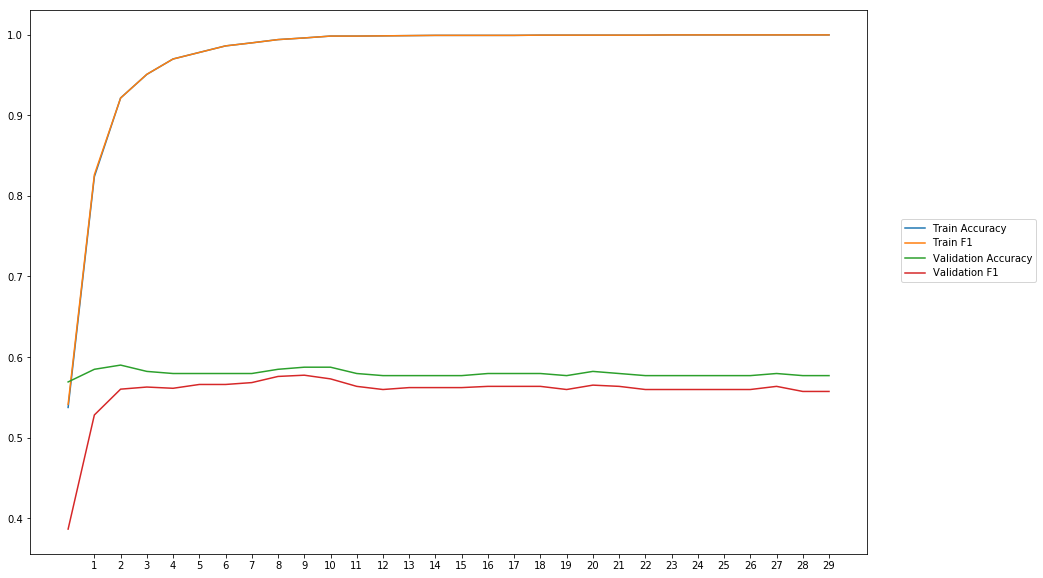

Average Accuracy: 57.96%
Average Precision: 58.82%
Average Recall: 53.23%
Average F1: 55.64%

-----Fold 7--------


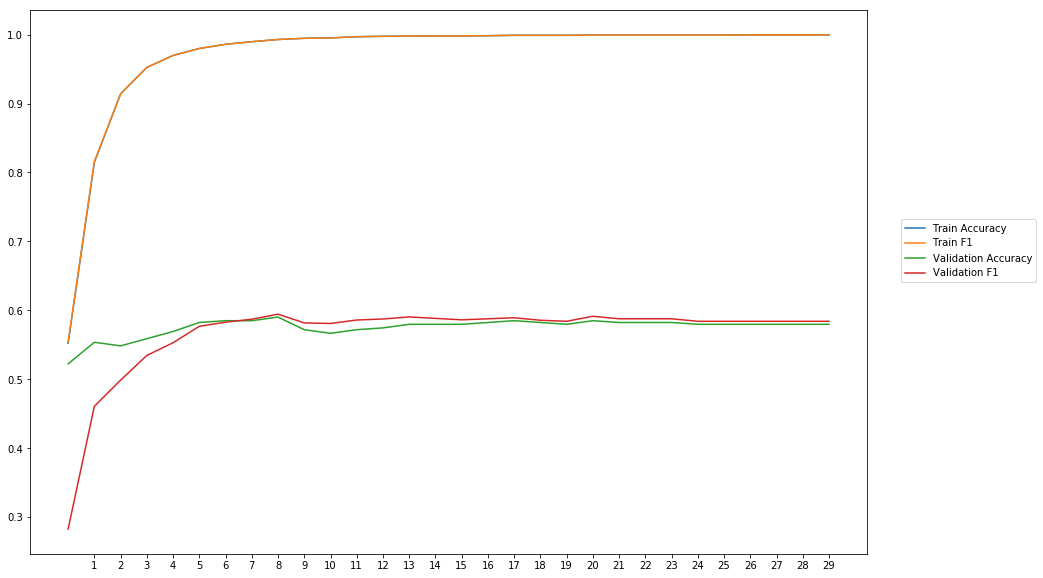

Average Accuracy: 57.52%
Average Precision: 57.51%
Average Recall: 56.49%
Average F1: 56.58%

-----Fold 8--------


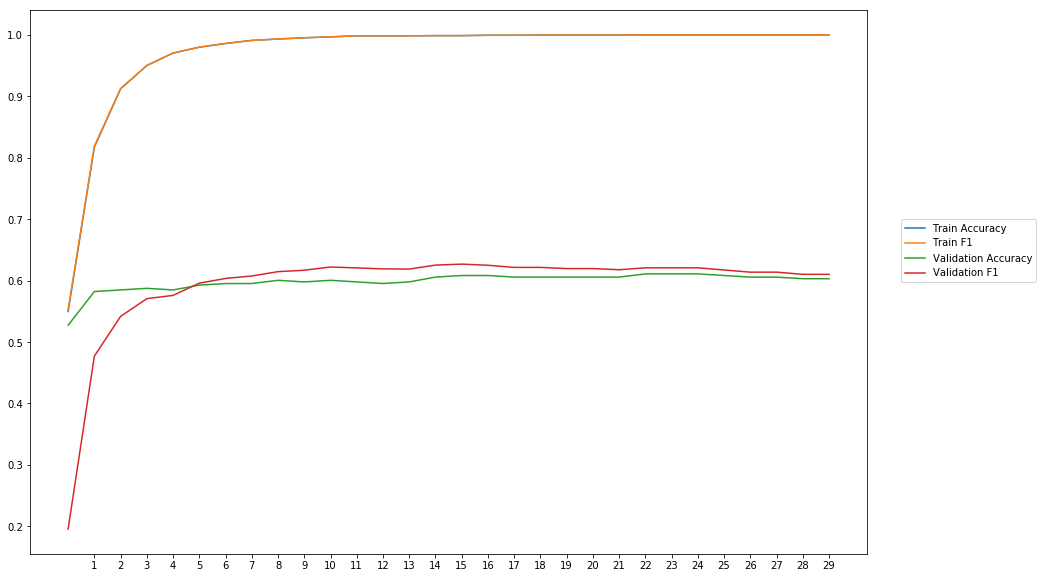

Average Accuracy: 59.83%
Average Precision: 59.80%
Average Recall: 60.42%
Average F1: 59.29%

-----Fold 9--------


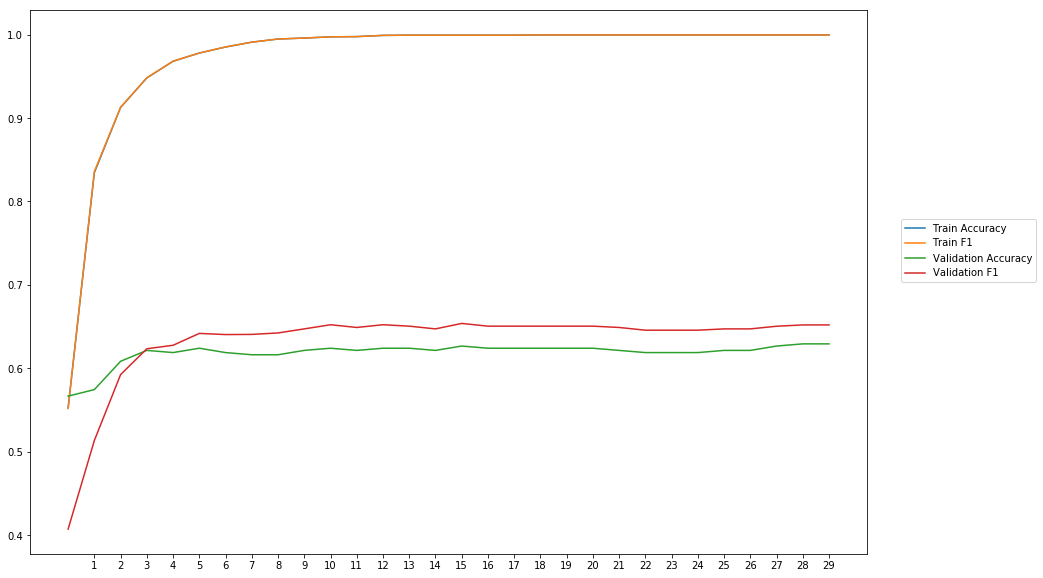

Average Accuracy: 61.85%
Average Precision: 60.75%
Average Recall: 66.74%
Average F1: 63.23%

-----Fold 10--------


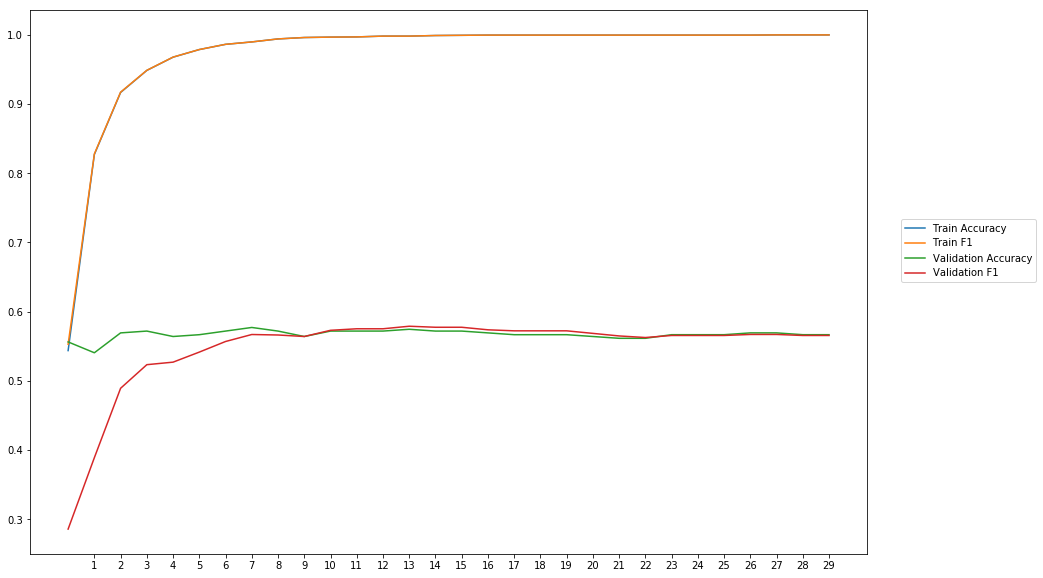

Average Accuracy: 56.71%
Average Precision: 57.47%
Average Recall: 53.56%
Average F1: 54.71%

-------Overallresults-------


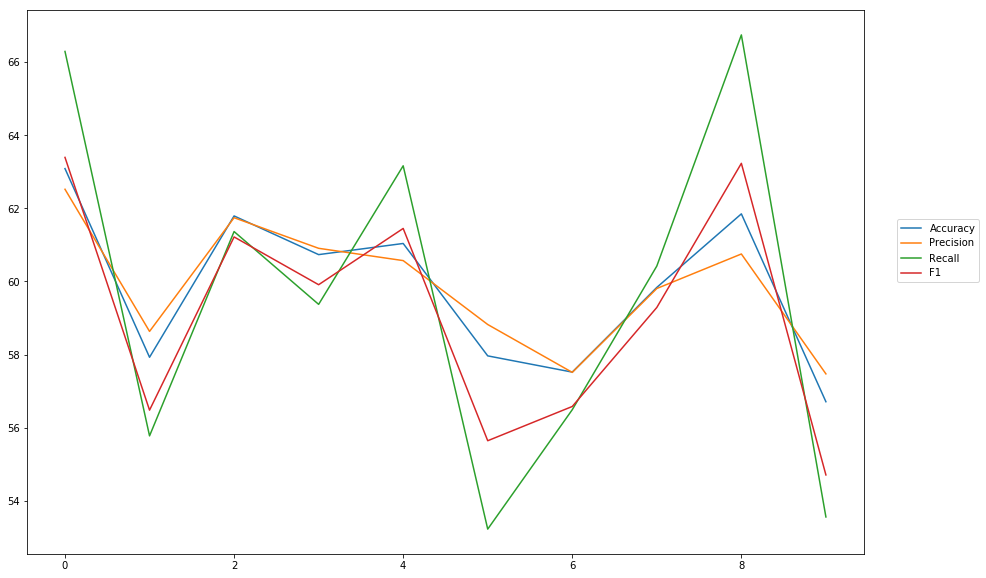

Accuracy: Mean = 59.84% (+/- 2.07%), Max = 63.08%, Min =  56.71%
Precision: Mean = 59.87% (+/- 1.64%), Max = 62.52%, Min =  57.47%
Recall: Mean = 59.64% (+/- 4.62%), Max = 66.74%, Min =  53.23%
F1: Mean = 59.19% (+/- 3.01%), Max = 63.39%, Min =  54.71%


In [19]:
cross_val_three_inputs(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforHidden')

# Normalization after hidden

In [21]:
#word Embeddings
wv_layer_2 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_2 = wv_layer_2(input_embedding_2)
x_embedding_2 = Dense(600, activation='relu')(embedded_sequences_2)
x_embedding_2 = BatchNormalization()(x_embedding_2)
x_embedding_2 = Flatten()(x_embedding_2)

#Sentiment Features
input_sentiment_2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_2 = Dense(600, activation='relu')(input_sentiment_2)
x_sentiment_2 = BatchNormalization()(x_sentiment_2)

#POS Features
input_pos_2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_2 = Dense(600, activation='relu')(input_pos_2)
x_pos_2 = BatchNormalization()(x_pos_2)

#Concatination
concat_2 = concatenate([x_embedding_2, x_sentiment_2, x_pos_2])

preds_2 = Dense(2, activation='softmax')(concat_2)

model_2 = Model(inputs=[input_embedding_2, input_sentiment_2, input_pos_2], outputs=preds_2)


-----Fold 1--------


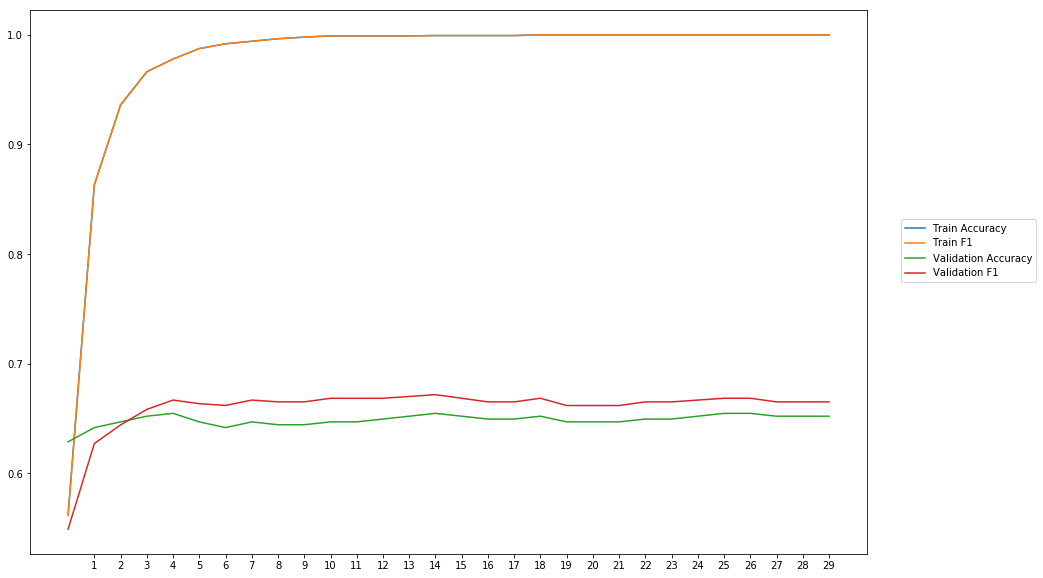

Average Accuracy: 64.85%
Average Precision: 63.80%
Average Recall: 68.63%
Average F1: 65.98%

-----Fold 2--------


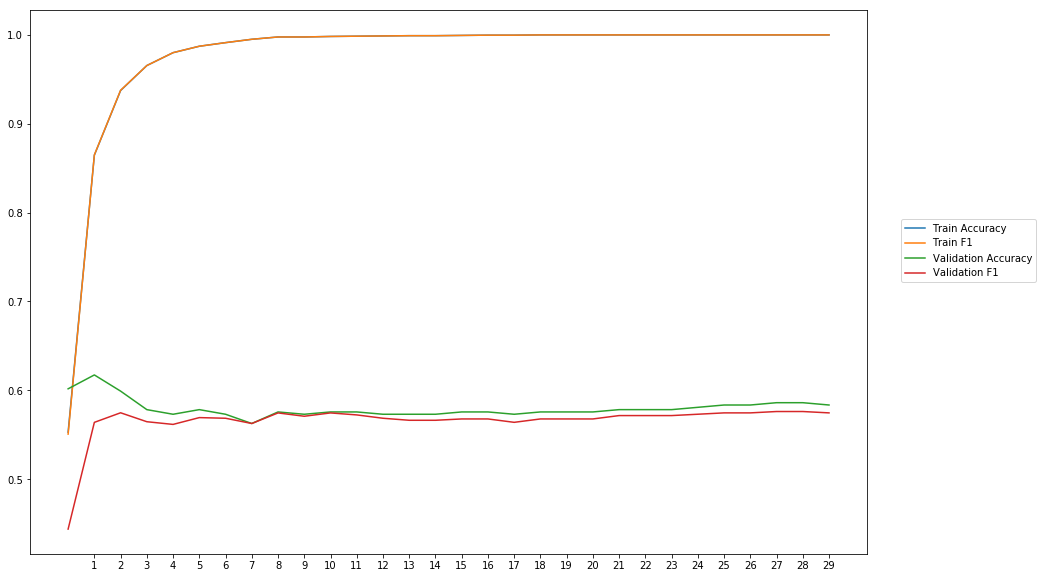

Average Accuracy: 57.96%
Average Precision: 58.47%
Average Recall: 55.25%
Average F1: 56.55%

-----Fold 3--------


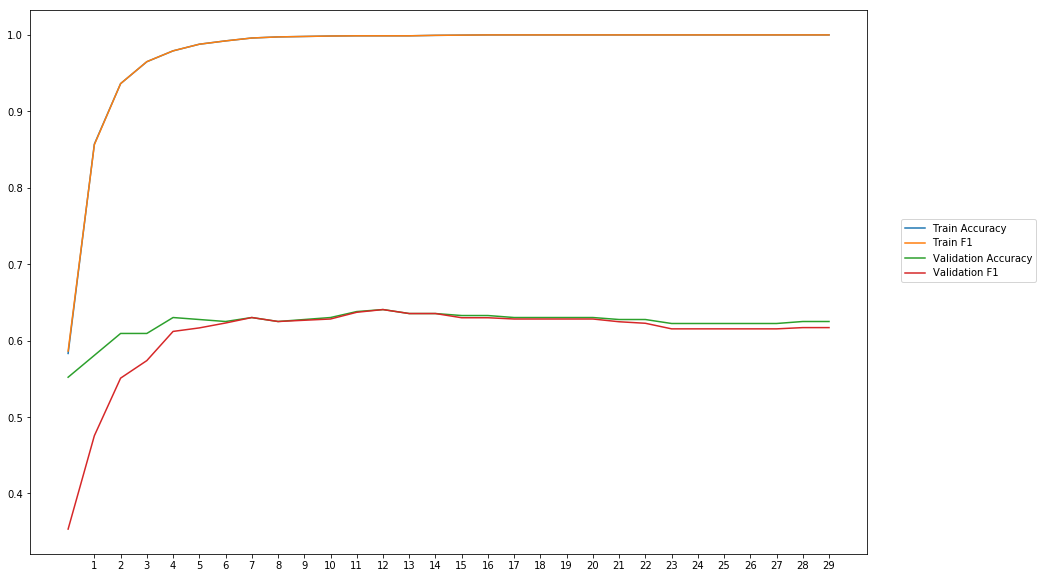

Average Accuracy: 62.34%
Average Precision: 62.88%
Average Recall: 59.30%
Average F1: 60.65%

-----Fold 4--------


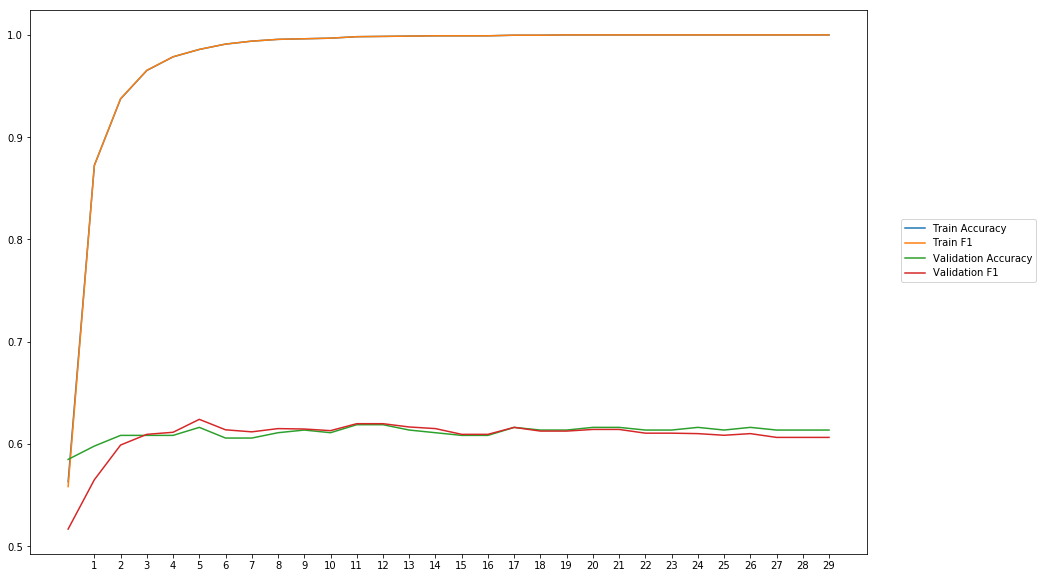

Average Accuracy: 61.13%
Average Precision: 61.18%
Average Recall: 60.44%
Average F1: 60.74%

-----Fold 5--------


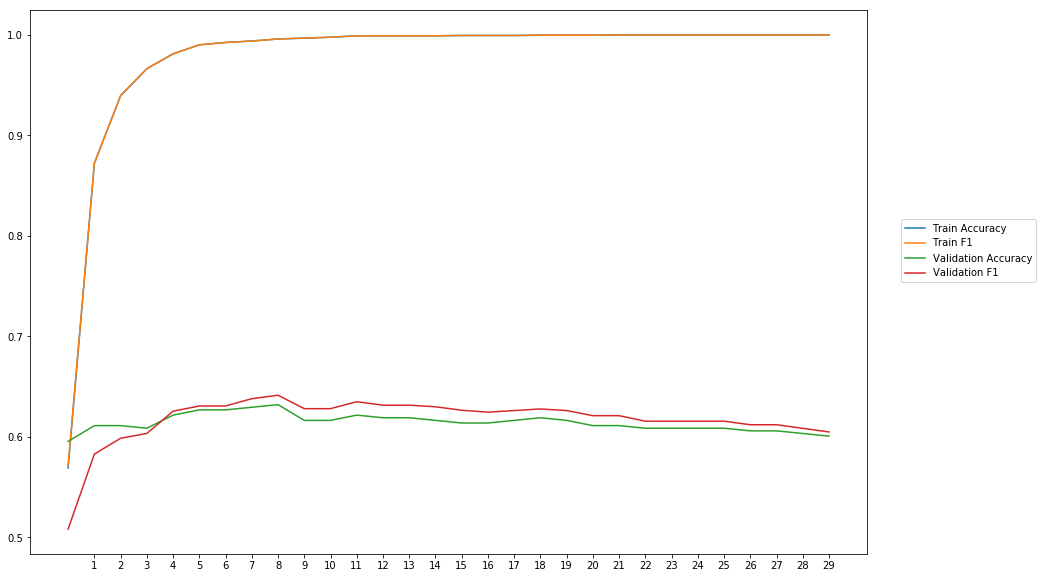

Average Accuracy: 61.39%
Average Precision: 61.06%
Average Recall: 62.60%
Average F1: 61.70%

-----Fold 6--------


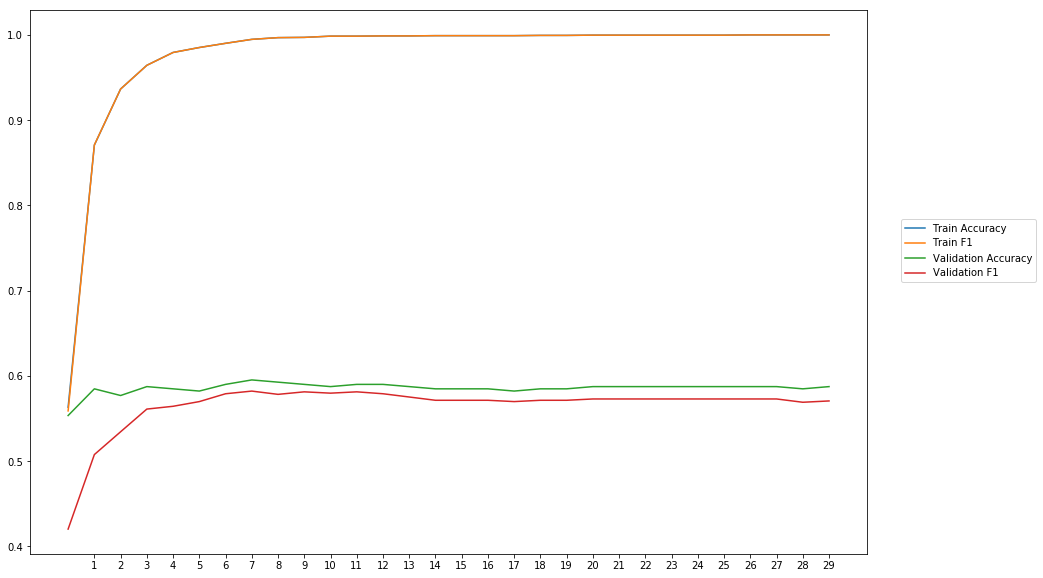

Average Accuracy: 58.57%
Average Precision: 59.28%
Average Recall: 54.21%
Average F1: 56.48%

-----Fold 7--------


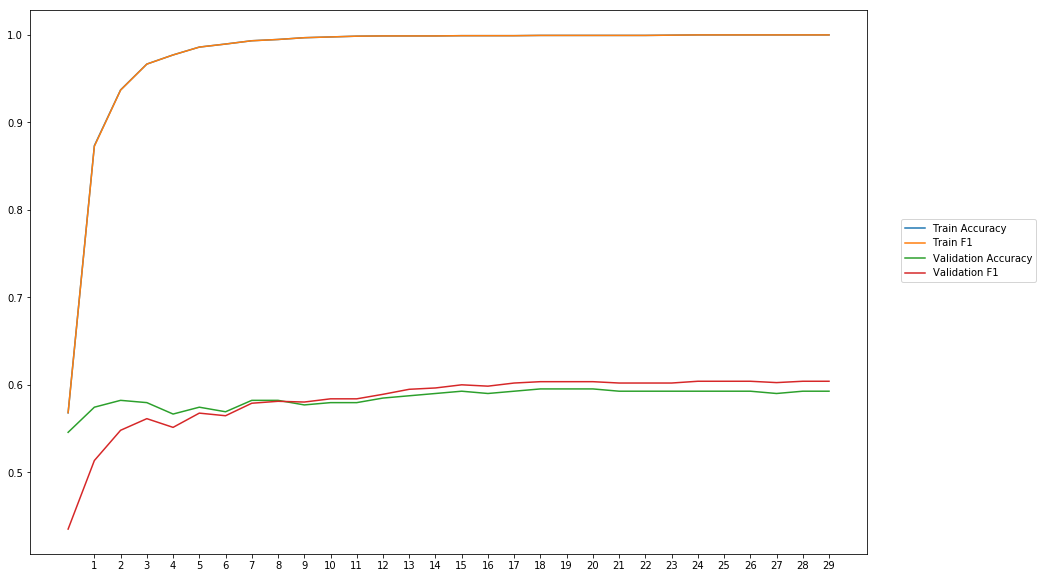

Average Accuracy: 58.49%
Average Precision: 58.37%
Average Recall: 58.43%
Average F1: 58.23%

-----Fold 8--------


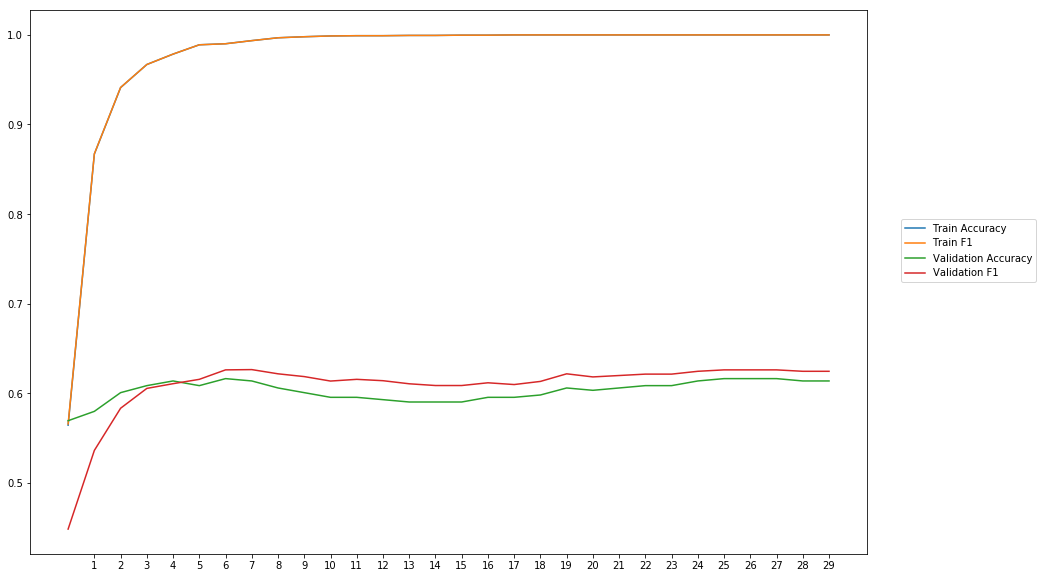

Average Accuracy: 60.26%
Average Precision: 59.80%
Average Recall: 62.30%
Average F1: 60.83%

-----Fold 9--------


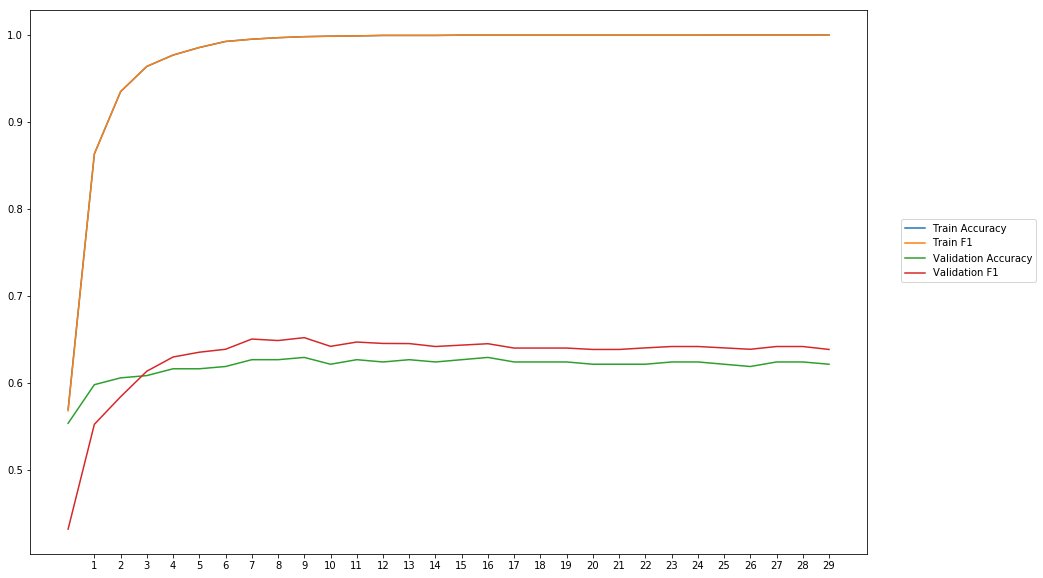

Average Accuracy: 61.91%
Average Precision: 61.00%
Average Recall: 65.36%
Average F1: 62.89%

-----Fold 10--------


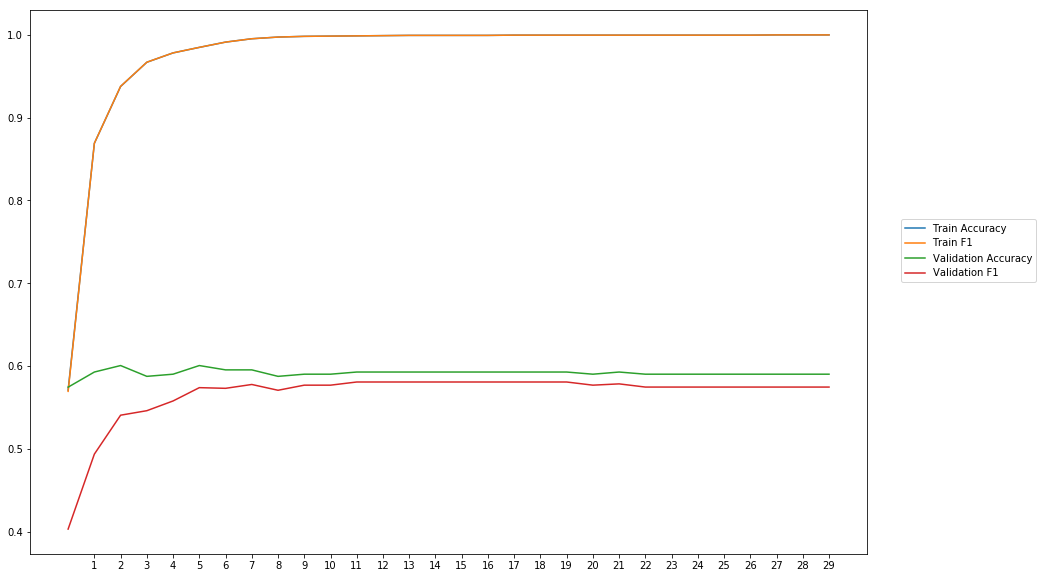

Average Accuracy: 59.14%
Average Precision: 60.30%
Average Recall: 53.77%
Average F1: 56.56%

-------Overallresults-------


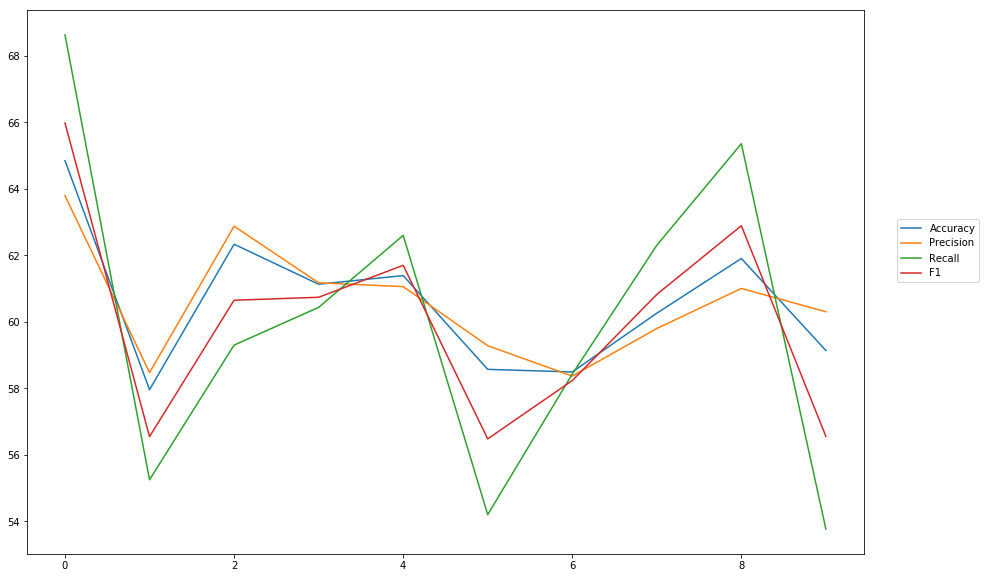

Accuracy: Mean = 60.60% (+/- 2.04%), Max = 64.85%, Min =  57.96%
Precision: Mean = 60.61% (+/- 1.67%), Max = 63.80%, Min =  58.37%
Recall: Mean = 60.03% (+/- 4.62%), Max = 68.63%, Min =  53.77%
F1: Mean = 60.06% (+/- 2.96%), Max = 65.98%, Min =  56.48%


In [21]:
cross_val_three_inputs(model_2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationAfterHidden')

# Before and after hidden layer

In [23]:
#Word Embeddings
wv_layer_3 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_3 = wv_layer_3(input_embedding_3)
x_embedding_3 = BatchNormalization()(embedded_sequences_3)
x_embedding_3 = Dense(600, activation='relu')(x_embedding_3)
x_embedding_3 = BatchNormalization()(x_embedding_3)
x_embedding_3 = Flatten()(x_embedding_3)

#Sentiment Features
input_sentiment_3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_3 = BatchNormalization()(input_sentiment_3)
x_sentiment_3 = Dense(600, activation='relu')(x_sentiment_3)
x_sentiment_3 = BatchNormalization()(x_sentiment_3)

#POS Features
input_pos_3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_3 = BatchNormalization() (input_pos_3)
x_pos_3 = Dense(600, activation='relu')(x_pos_3)
x_pos_3 = BatchNormalization()(x_pos_3)

#Concatination
concat_3 = concatenate([x_embedding_3, x_sentiment_3, x_pos_3])

preds_3 = Dense(2, activation='softmax')(concat_3)

model_3 = Model(inputs=[input_embedding_3, input_sentiment_3, input_pos_3], outputs=preds_3)


-----Fold 1--------


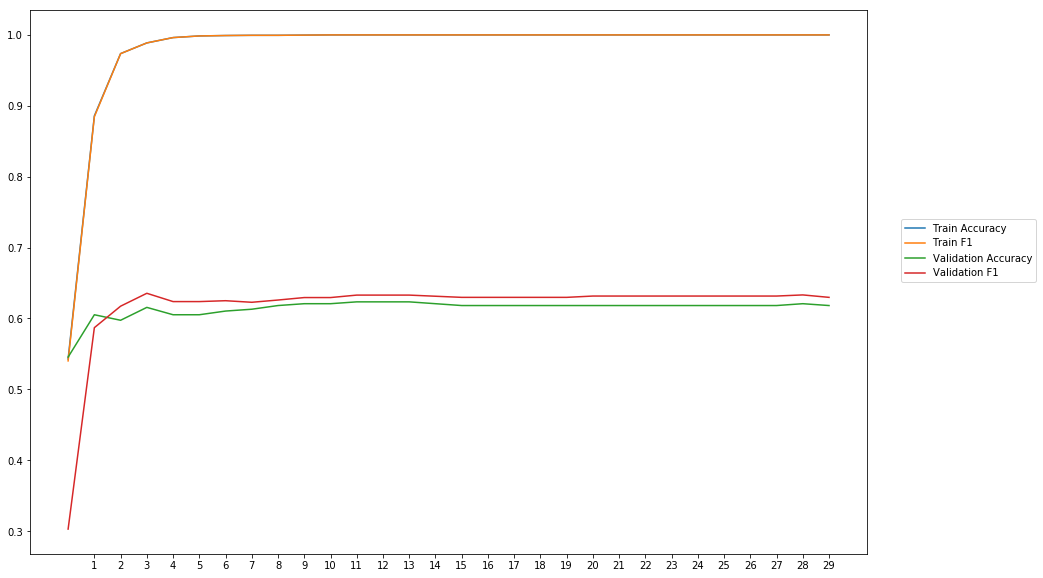

Average Accuracy: 61.41%
Average Precision: 60.94%
Average Recall: 63.45%
Average F1: 61.72%

-----Fold 2--------


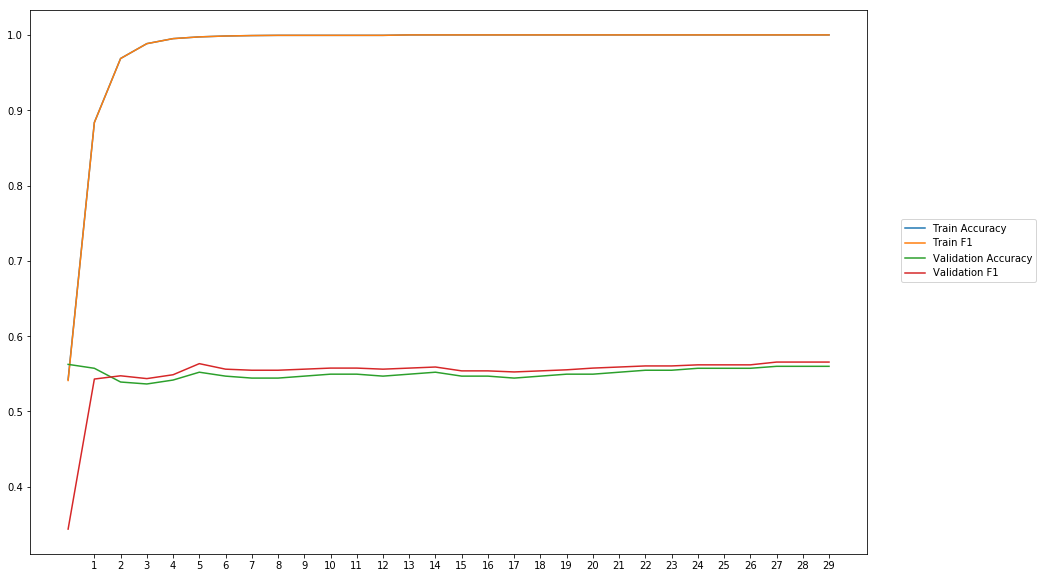

Average Accuracy: 55.05%
Average Precision: 55.03%
Average Recall: 55.67%
Average F1: 54.96%

-----Fold 3--------


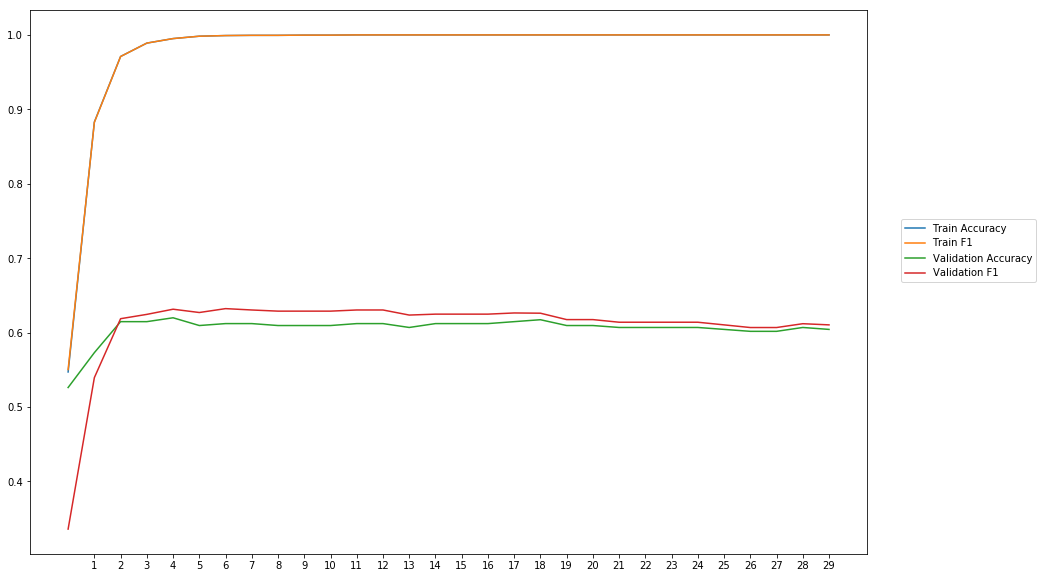

Average Accuracy: 60.57%
Average Precision: 59.83%
Average Recall: 62.57%
Average F1: 60.90%

-----Fold 4--------


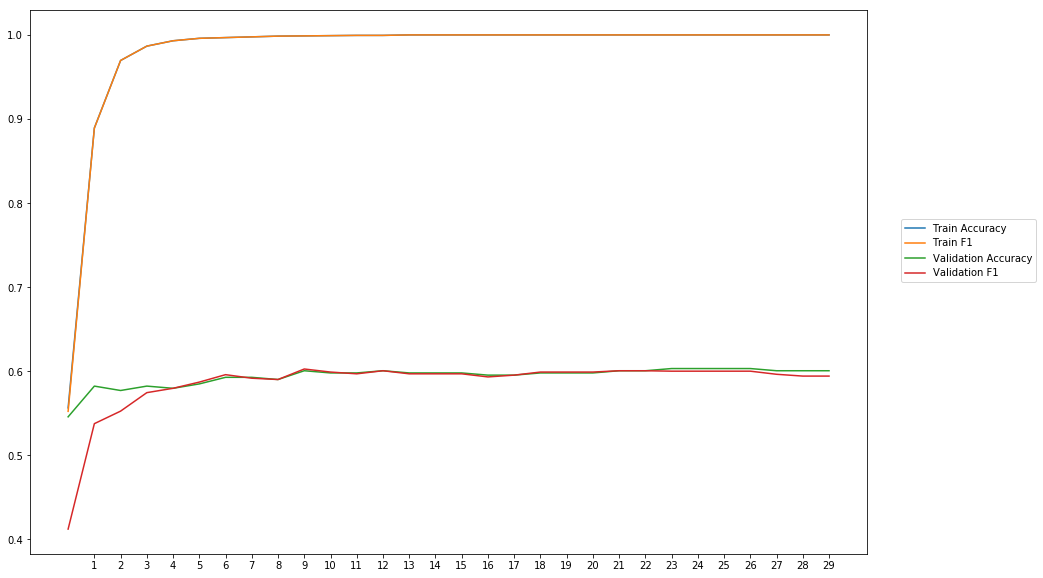

Average Accuracy: 59.39%
Average Precision: 59.51%
Average Recall: 58.01%
Average F1: 58.60%

-----Fold 5--------


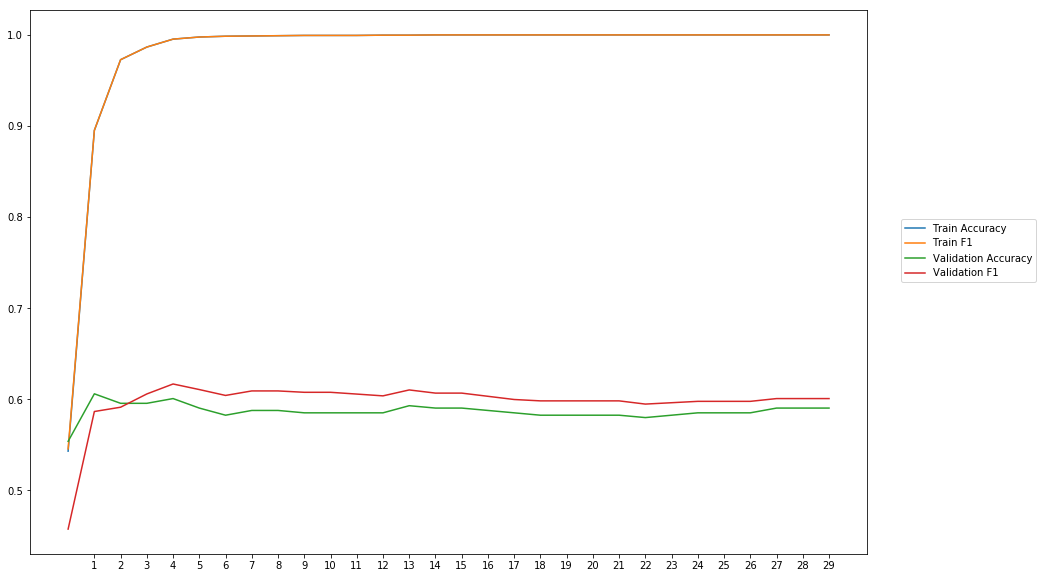

Average Accuracy: 58.66%
Average Precision: 58.07%
Average Recall: 61.71%
Average F1: 59.71%

-----Fold 6--------


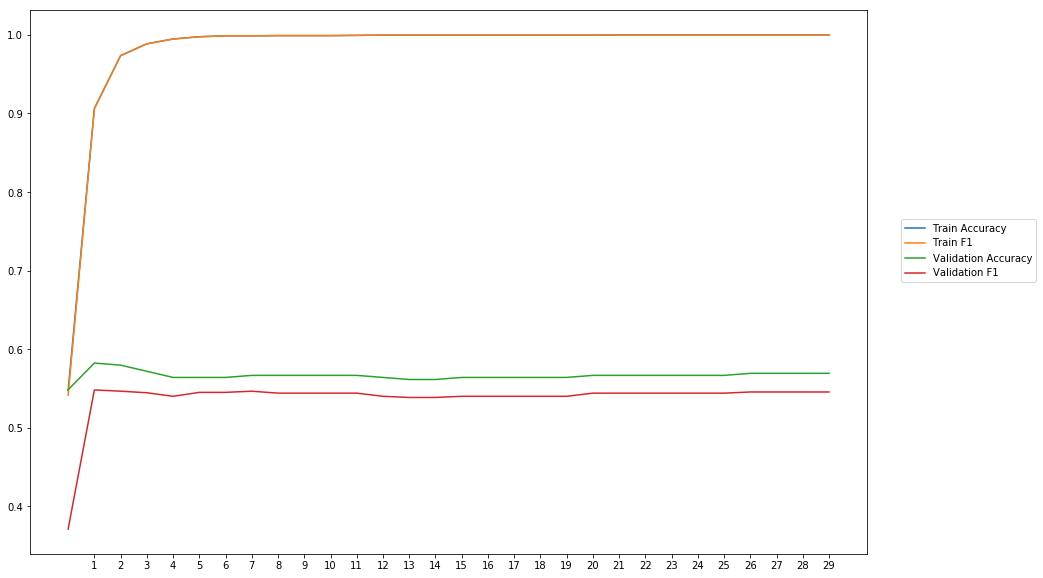

Average Accuracy: 56.63%
Average Precision: 57.43%
Average Recall: 50.80%
Average F1: 53.75%

-----Fold 7--------


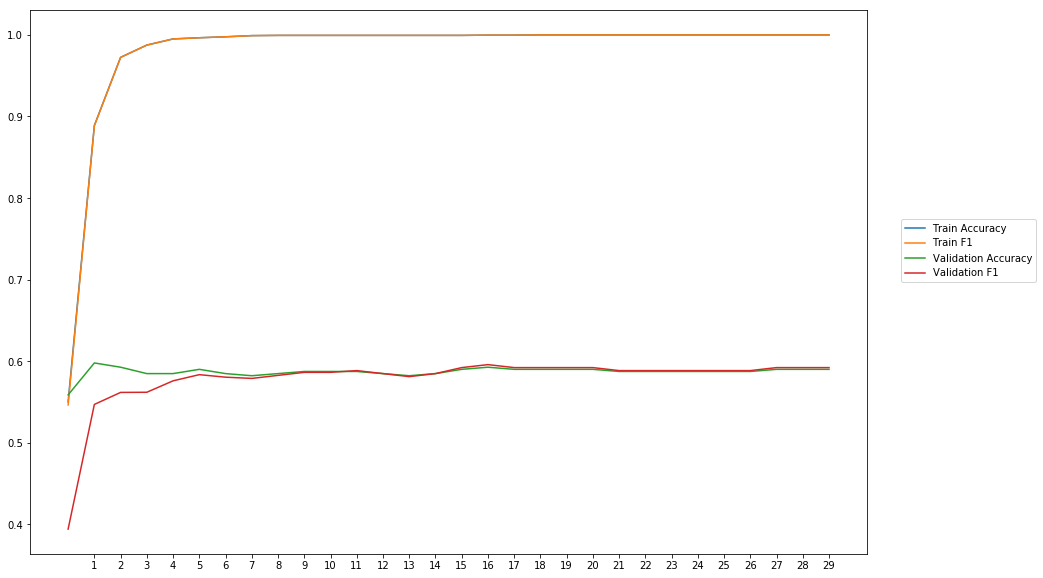

Average Accuracy: 58.71%
Average Precision: 58.96%
Average Recall: 57.17%
Average F1: 57.81%

-----Fold 8--------


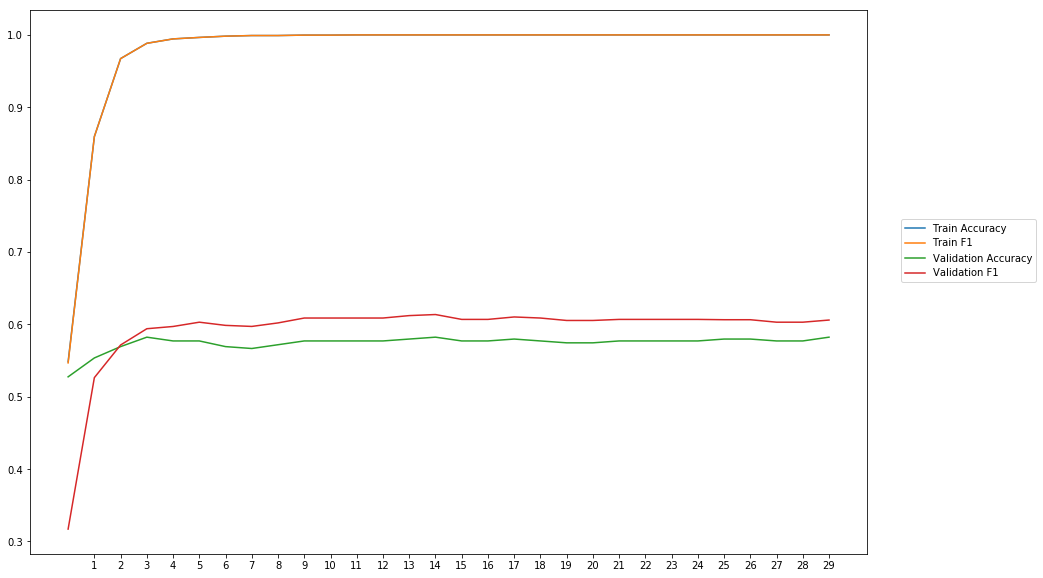

Average Accuracy: 57.42%
Average Precision: 56.58%
Average Recall: 62.90%
Average F1: 59.20%

-----Fold 9--------


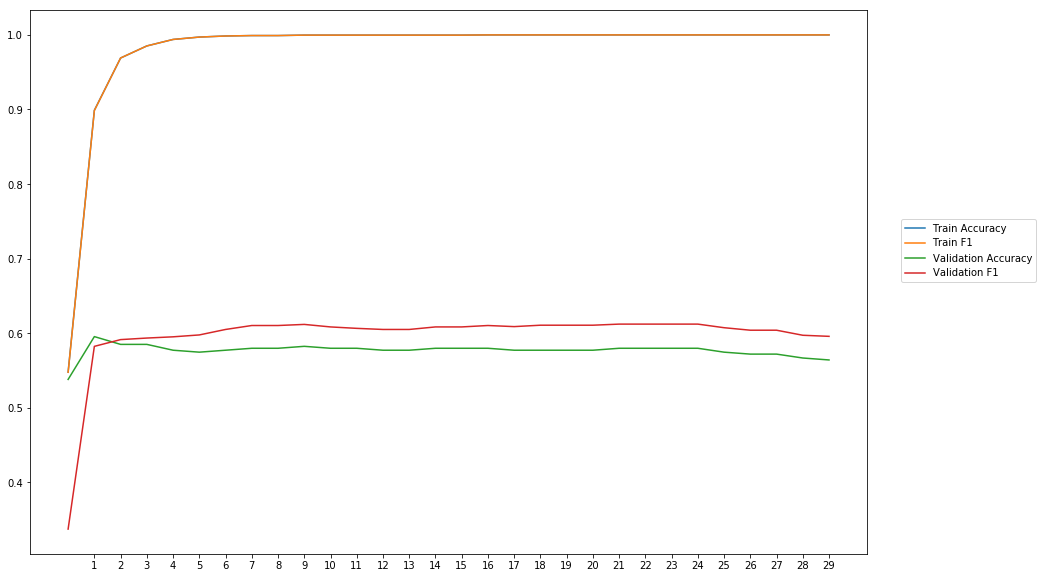

Average Accuracy: 57.67%
Average Precision: 56.84%
Average Recall: 63.46%
Average F1: 59.60%

-----Fold 10--------


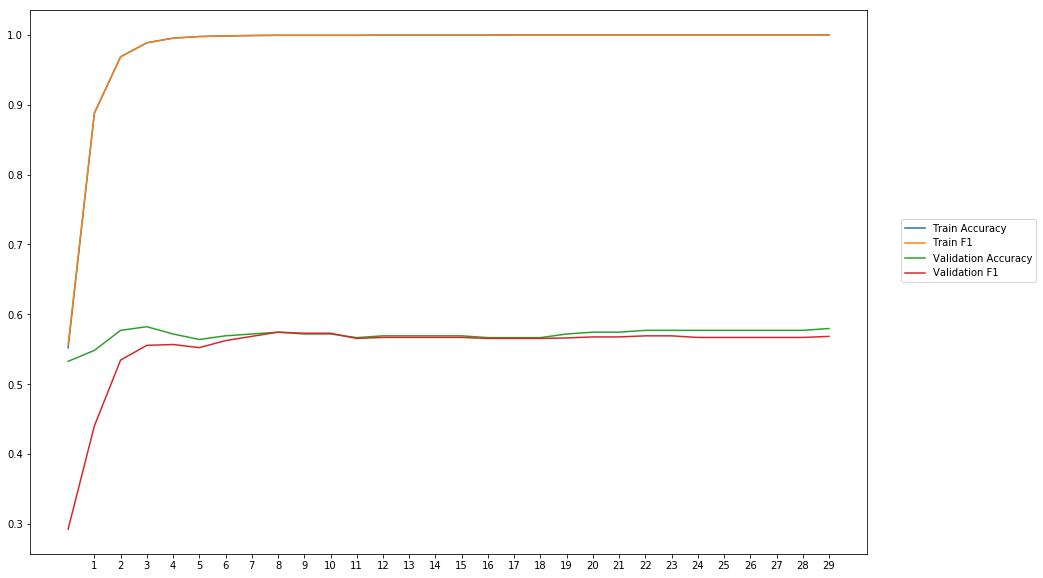

Average Accuracy: 57.06%
Average Precision: 57.49%
Average Recall: 53.80%
Average F1: 55.18%

-------Overallresults-------


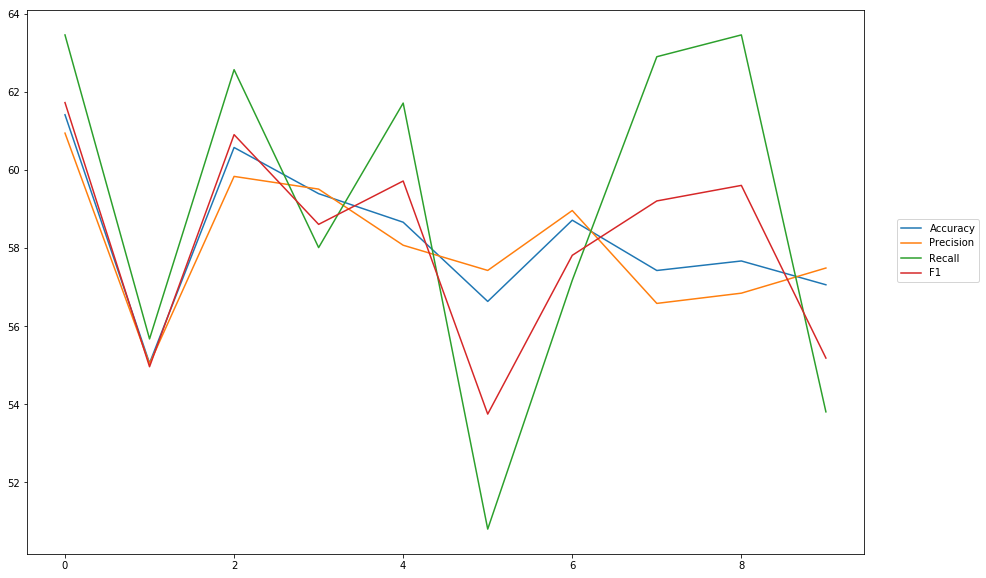

Accuracy: Mean = 58.26% (+/- 1.80%), Max = 61.41%, Min =  55.05%
Precision: Mean = 58.07% (+/- 1.67%), Max = 60.94%, Min =  55.03%
Recall: Mean = 58.95% (+/- 4.30%), Max = 63.46%, Min =  50.80%
F1: Mean = 58.15% (+/- 2.54%), Max = 61.72%, Min =  53.75%


In [24]:
cross_val_three_inputs(model_3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeAfterHidden')

# Normalization before hidden Layer, axis =1

In [27]:
#Word Embeddings
wv_layer_4 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_4 = wv_layer_4(input_embedding_4)
x_embedding_4 = BatchNormalization(axis =1)(embedded_sequences_4)
x_embedding_4 = Dense(600, activation='relu', use_bias = False)(x_embedding_4)
x_embedding_4 = Flatten()(x_embedding_4)

#Sentiment Features
input_sentiment_4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_4 = BatchNormalization(axis =1)(input_sentiment_4)
x_sentiment_4 = Dense(600, activation='relu', use_bias = False)(x_sentiment_4)

#POS Features
input_pos_4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_4 = BatchNormalization(axis =1)(input_pos_4)
x_pos_4 = Dense(600, activation='relu', use_bias = False)(x_pos_4)

#Concatination
concat_4 = concatenate([x_embedding_4, x_sentiment_4, x_pos_4])

preds_4 = Dense(2, activation='softmax')(concat_4)

model_4 = Model(inputs=[input_embedding_4, input_sentiment_4, input_pos_4], outputs=preds_4)


-----Fold 1--------


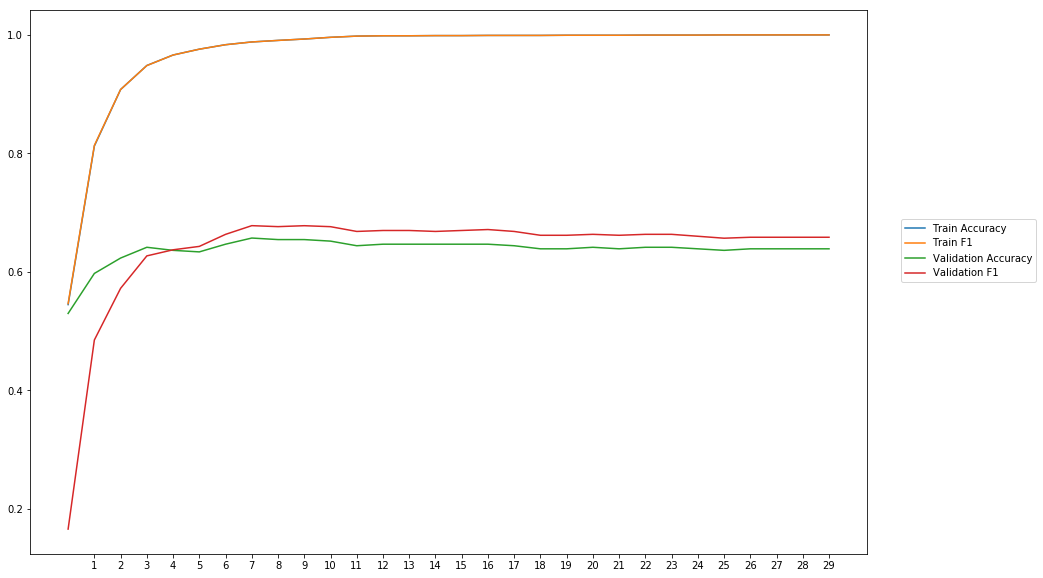

Average Accuracy: 63.74%
Average Precision: 63.28%
Average Recall: 66.55%
Average F1: 63.72%

-----Fold 2--------


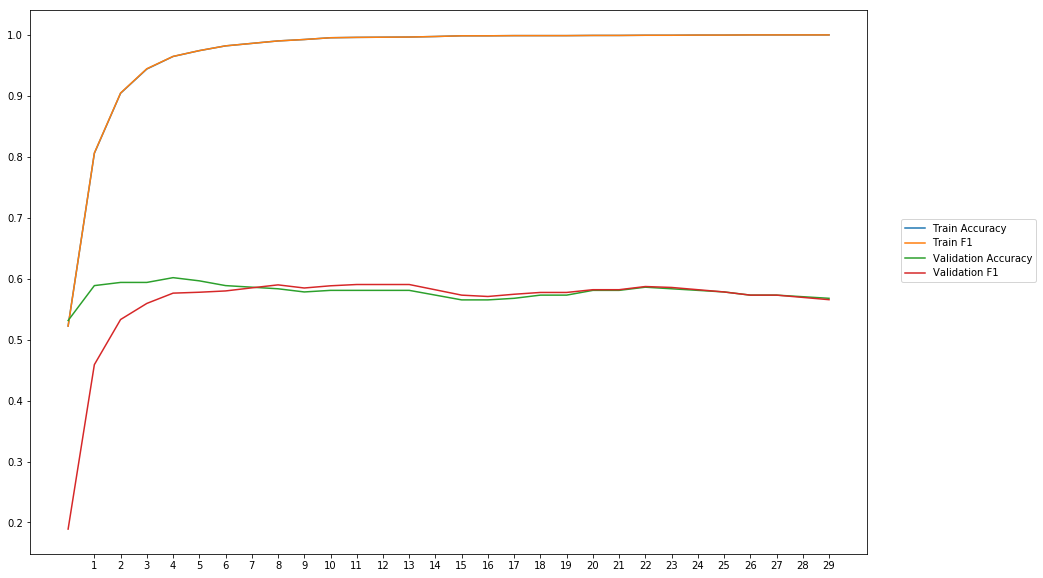

Average Accuracy: 57.85%
Average Precision: 58.45%
Average Recall: 55.53%
Average F1: 56.08%

-----Fold 3--------


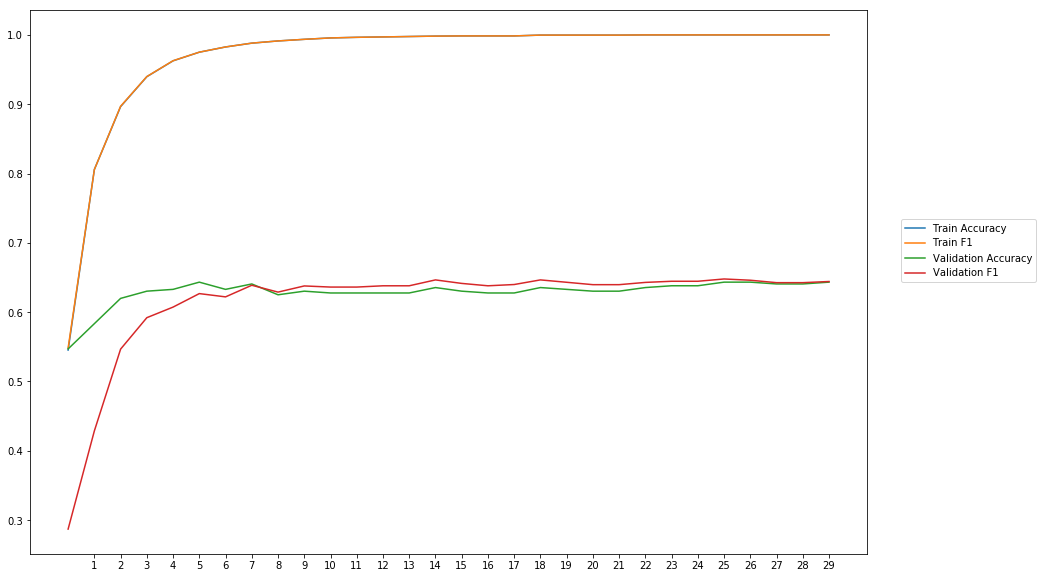

Average Accuracy: 62.89%
Average Precision: 63.31%
Average Recall: 61.31%
Average F1: 61.51%

-----Fold 4--------


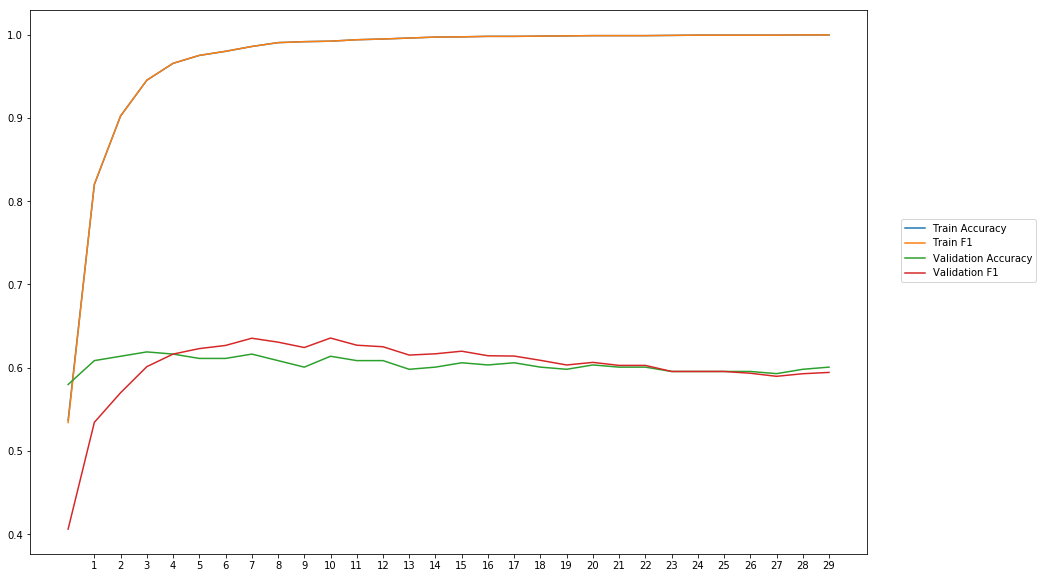

Average Accuracy: 60.34%
Average Precision: 60.47%
Average Recall: 60.45%
Average F1: 60.04%

-----Fold 5--------


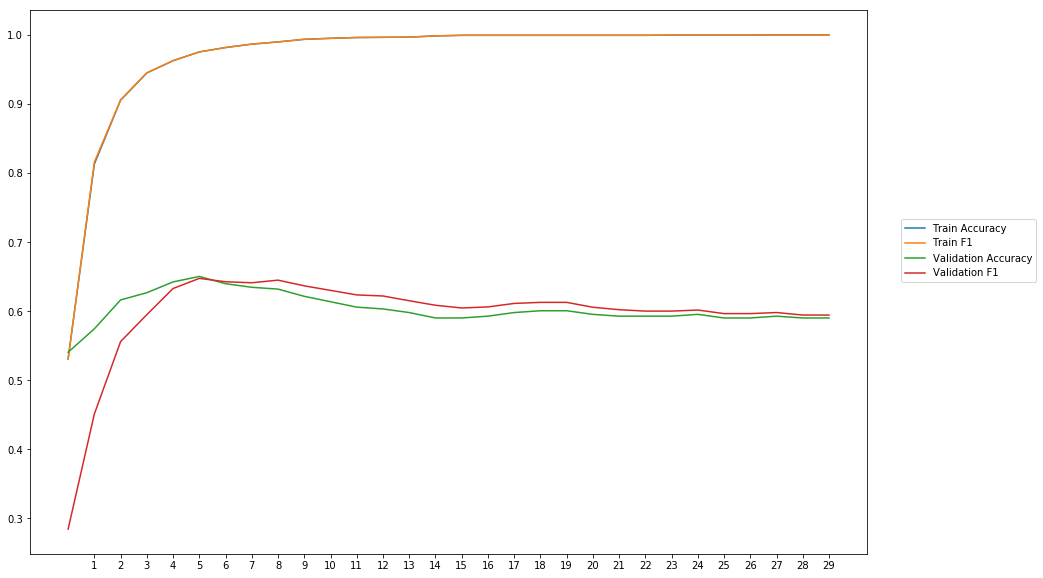

Average Accuracy: 60.30%
Average Precision: 60.50%
Average Recall: 59.93%
Average F1: 59.55%

-----Fold 6--------


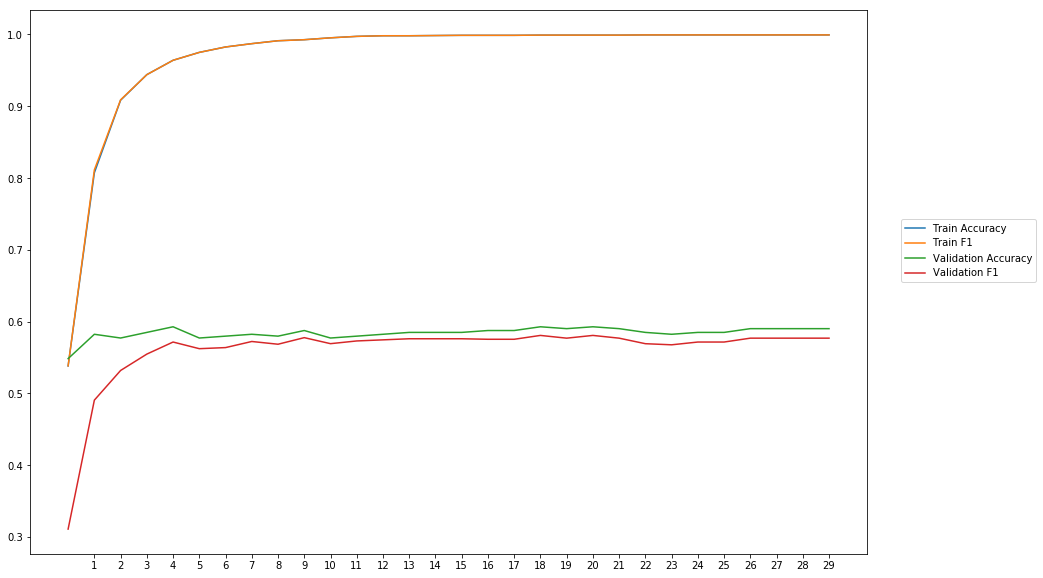

Average Accuracy: 58.41%
Average Precision: 59.30%
Average Recall: 53.77%
Average F1: 56.00%

-----Fold 7--------


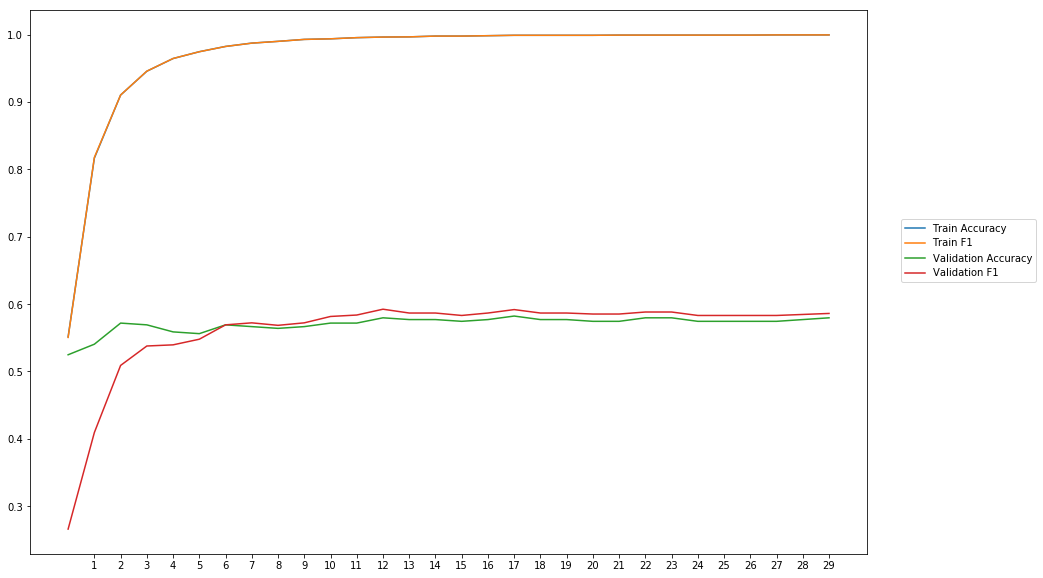

Average Accuracy: 57.05%
Average Precision: 57.10%
Average Recall: 56.07%
Average F1: 56.03%

-----Fold 8--------


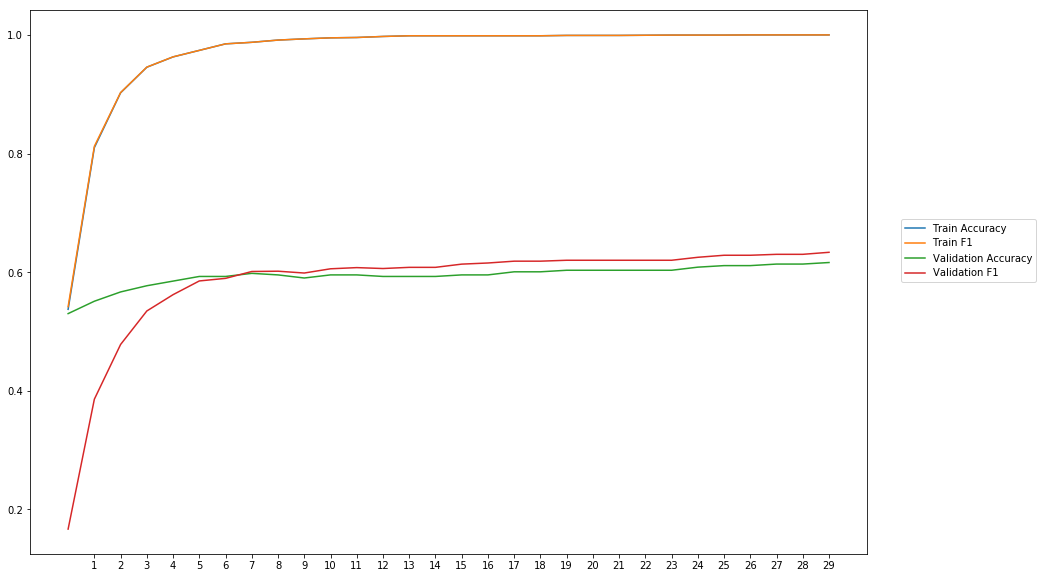

Average Accuracy: 59.43%
Average Precision: 59.76%
Average Recall: 59.11%
Average F1: 58.26%

-----Fold 9--------


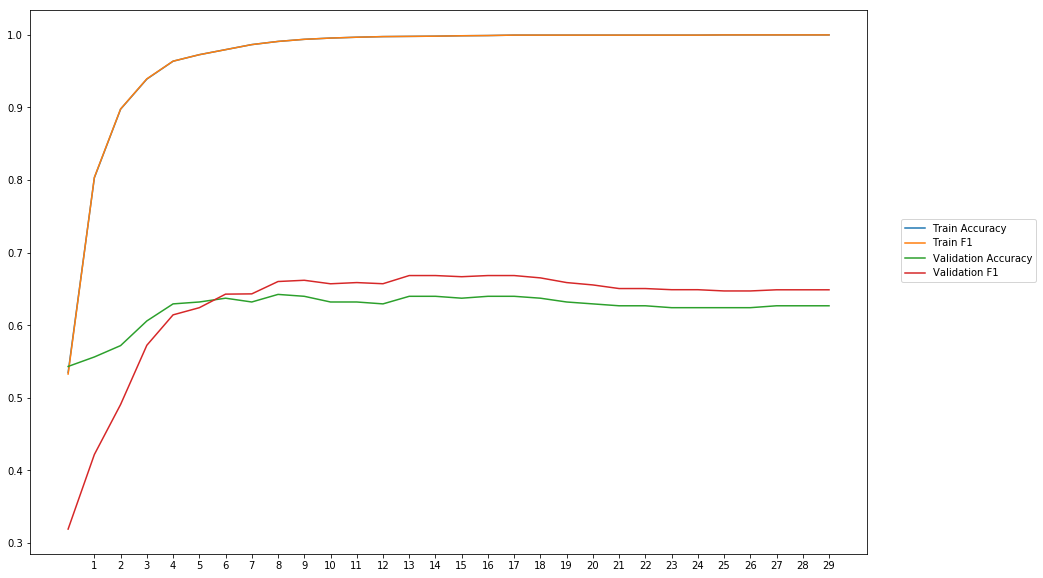

Average Accuracy: 62.35%
Average Precision: 61.58%
Average Recall: 65.20%
Average F1: 62.60%

-----Fold 10--------


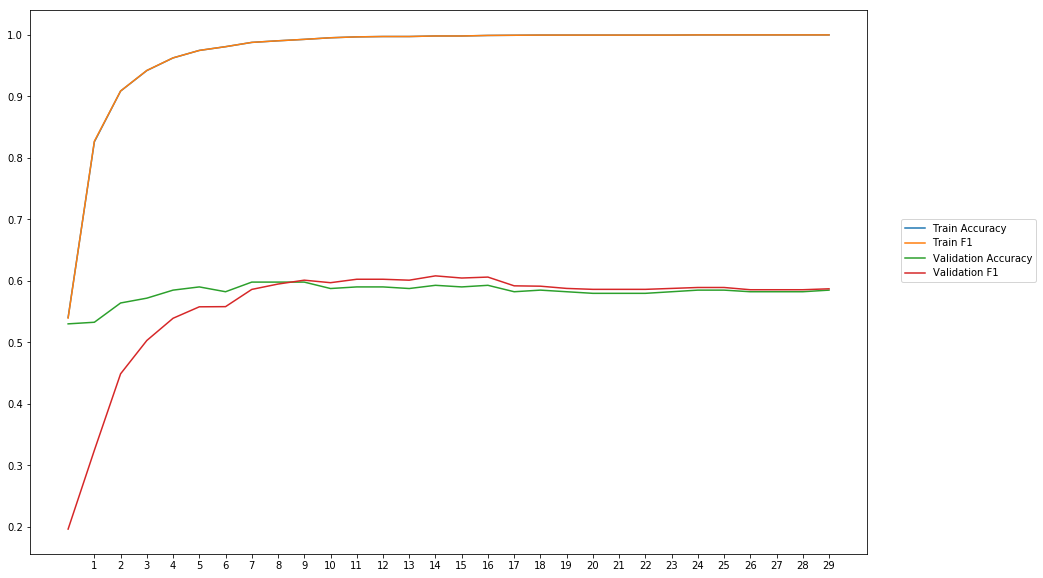

Average Accuracy: 58.17%
Average Precision: 58.85%
Average Recall: 55.20%
Average F1: 55.90%

-------Overallresults-------


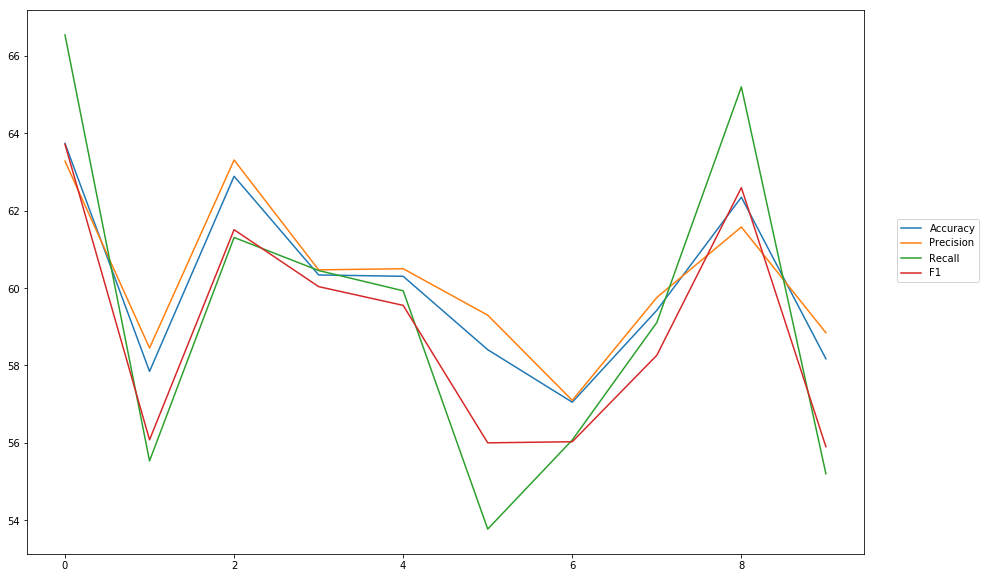

Accuracy: Mean = 60.05% (+/- 2.18%), Max = 63.74%, Min =  57.05%
Precision: Mean = 60.26% (+/- 1.92%), Max = 63.31%, Min =  57.10%
Recall: Mean = 59.31% (+/- 4.06%), Max = 66.55%, Min =  53.77%
F1: Mean = 58.97% (+/- 2.82%), Max = 63.72%, Min =  55.90%


In [28]:
cross_val_three_inputs(model_4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeHiddenAxis1')

# Normalization after hidden, axis =1

In [29]:
#word Embeddings
wv_layer_5 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_5 = wv_layer_5(input_embedding_5)
x_embedding_5 = Dense(600, activation='relu')(embedded_sequences_5)
x_embedding_5 = BatchNormalization(axis =1)(x_embedding_5)
x_embedding_5 = Flatten()(x_embedding_5)

#Sentiment Features
input_sentiment_5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_5 = Dense(600, activation='relu')(input_sentiment_5)
x_sentiment_5 = BatchNormalization(axis =1)(x_sentiment_5)

#POS Features
input_pos_5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_5 = Dense(600, activation='relu')(input_pos_5)
x_pos_5 = BatchNormalization(axis =1)(x_pos_5)

#Concatination
concat_5 = concatenate([x_embedding_5, x_sentiment_5, x_pos_5])

preds_5 = Dense(2, activation='softmax')(concat_5)

model_5 = Model(inputs=[input_embedding_5, input_sentiment_5, input_pos_5], outputs=preds_5)


-----Fold 1--------


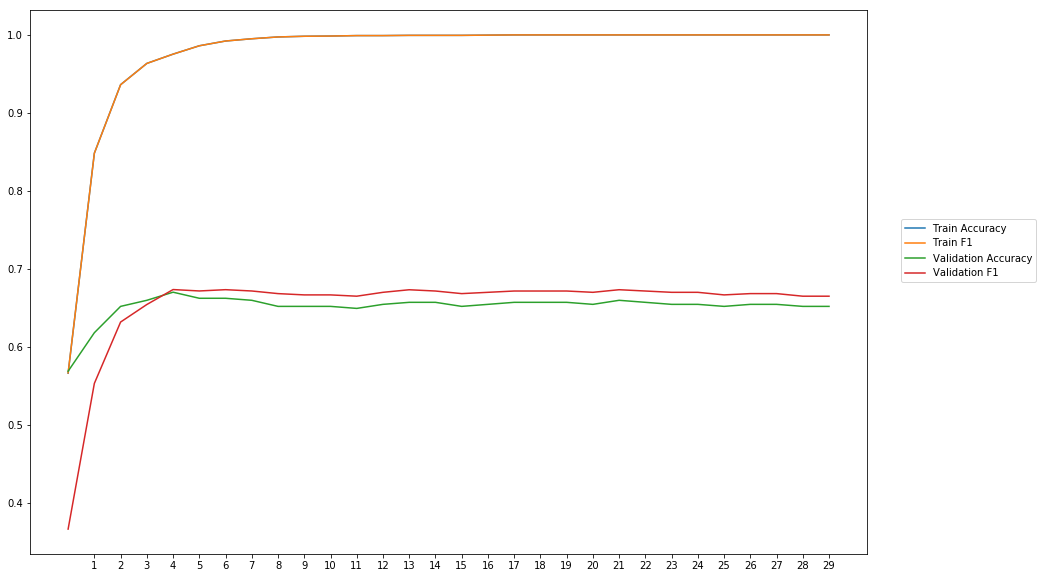

Average Accuracy: 65.17%
Average Precision: 64.60%
Average Recall: 67.20%
Average F1: 65.40%

-----Fold 2--------


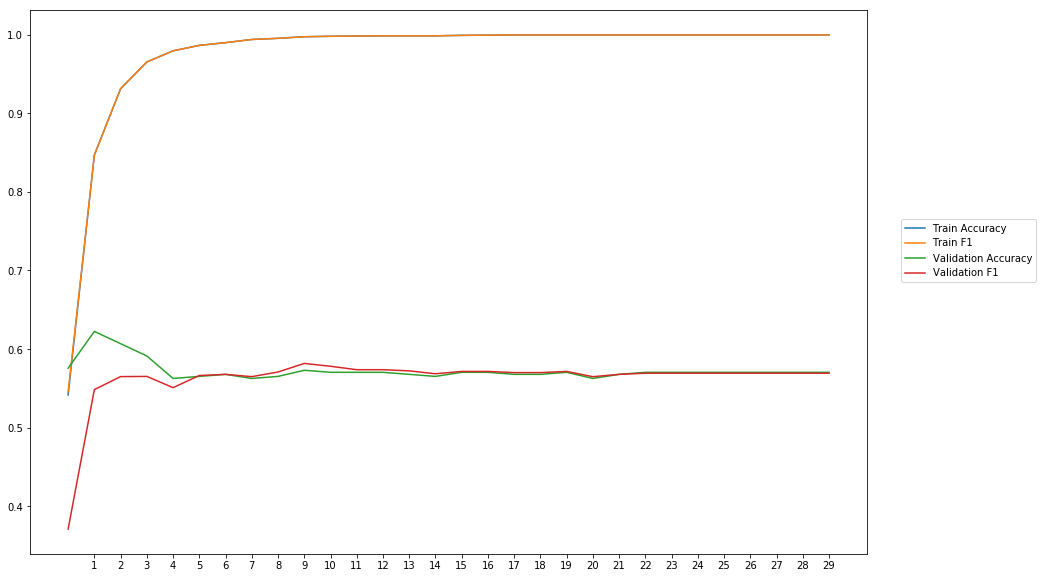

Average Accuracy: 57.25%
Average Precision: 57.68%
Average Recall: 55.62%
Average F1: 56.19%

-----Fold 3--------


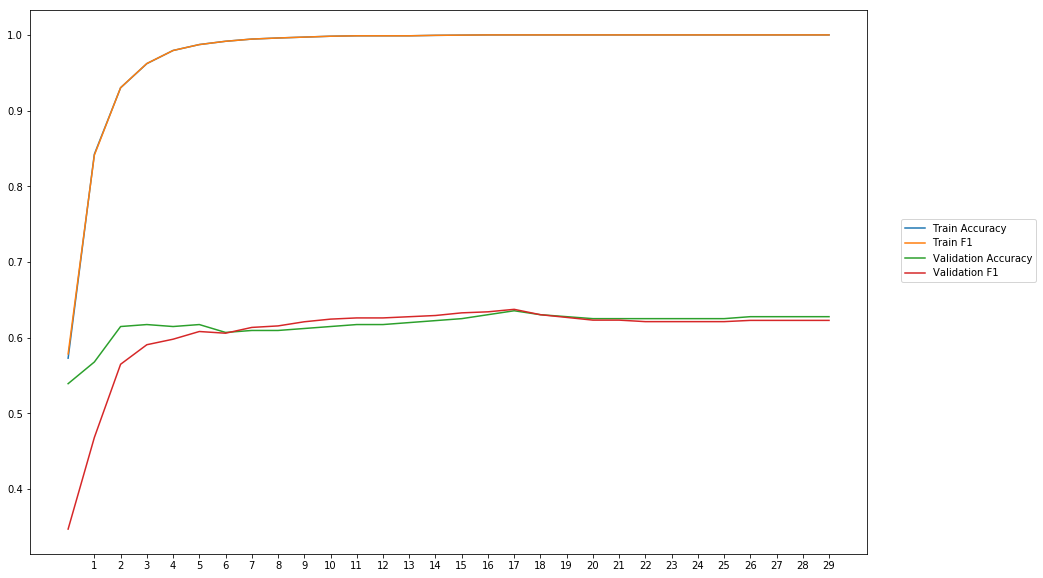

Average Accuracy: 61.69%
Average Precision: 61.84%
Average Recall: 59.88%
Average F1: 60.49%

-----Fold 4--------


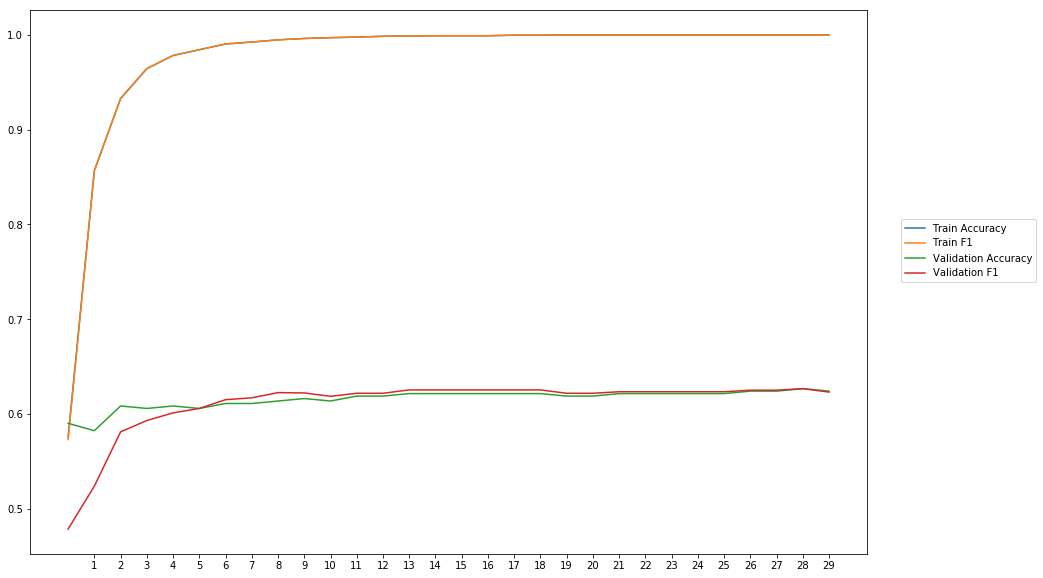

Average Accuracy: 61.58%
Average Precision: 61.67%
Average Recall: 60.91%
Average F1: 61.11%

-----Fold 5--------


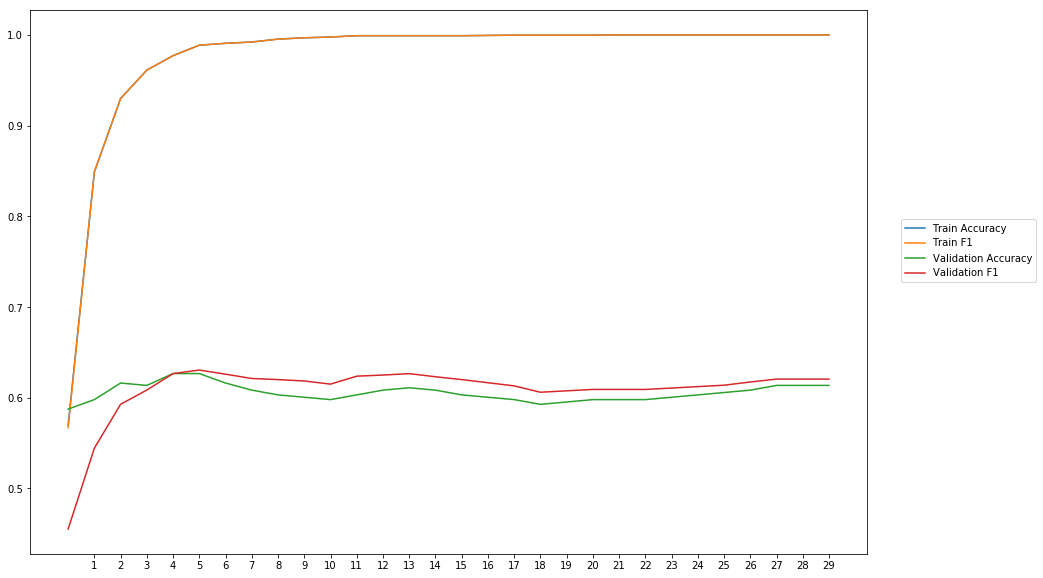

Average Accuracy: 60.56%
Average Precision: 60.31%
Average Recall: 61.99%
Average F1: 60.88%

-----Fold 6--------


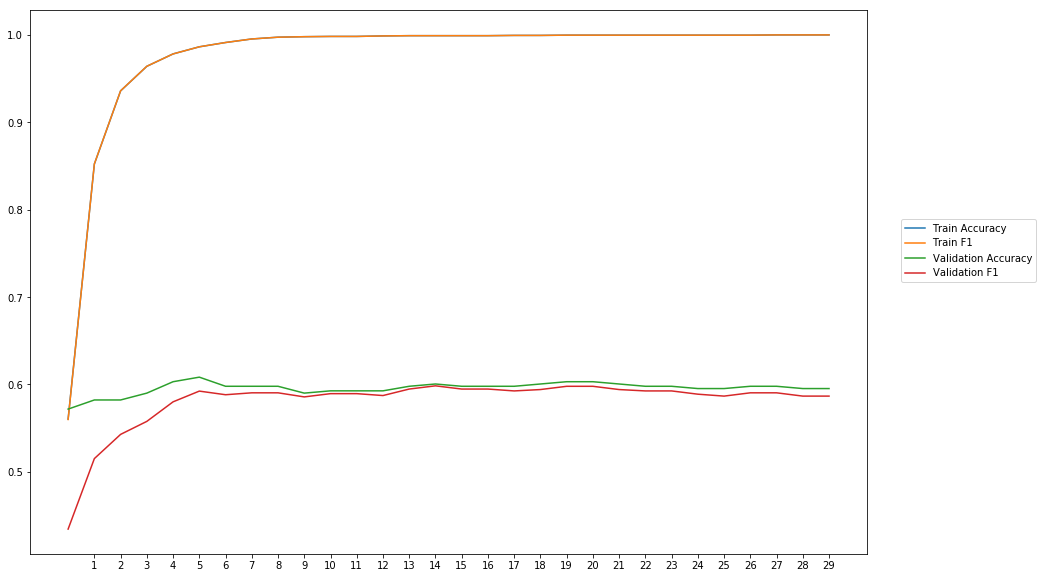

Average Accuracy: 59.57%
Average Precision: 60.14%
Average Recall: 56.47%
Average F1: 58.06%

-----Fold 7--------


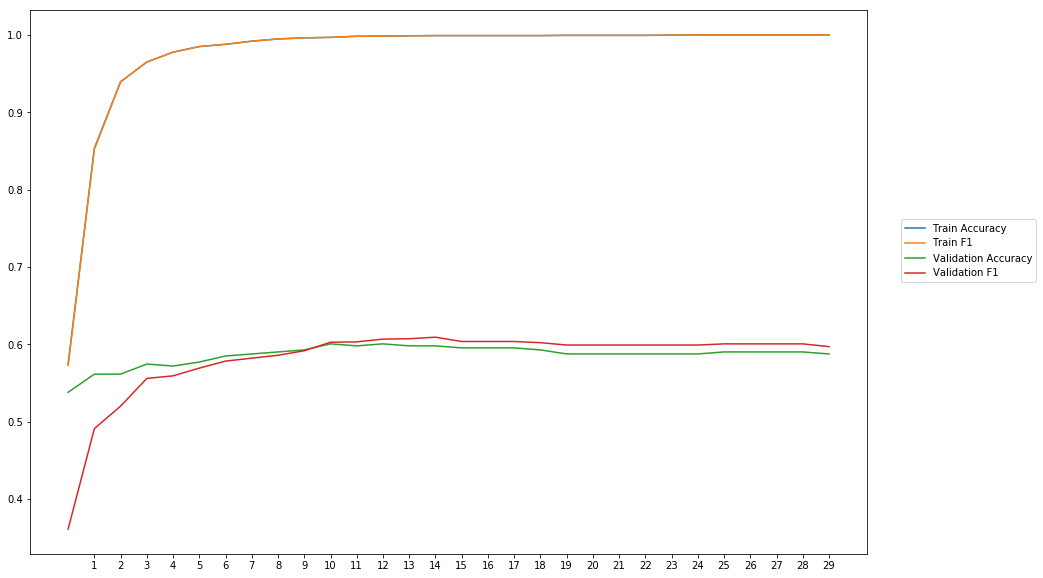

Average Accuracy: 58.62%
Average Precision: 58.53%
Average Recall: 58.24%
Average F1: 58.09%

-----Fold 8--------


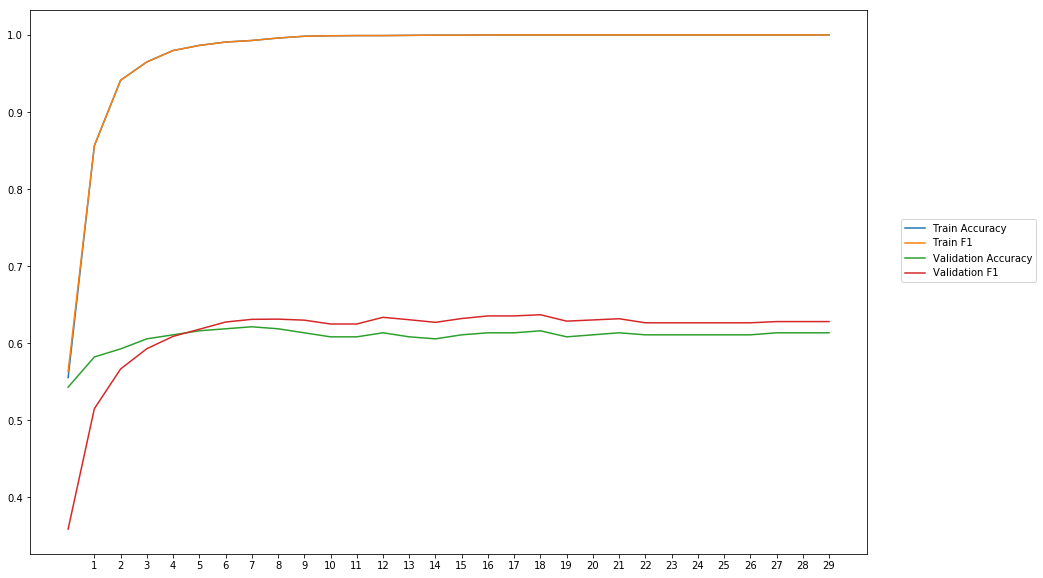

Average Accuracy: 60.84%
Average Precision: 60.29%
Average Recall: 62.97%
Average F1: 61.23%

-----Fold 9--------


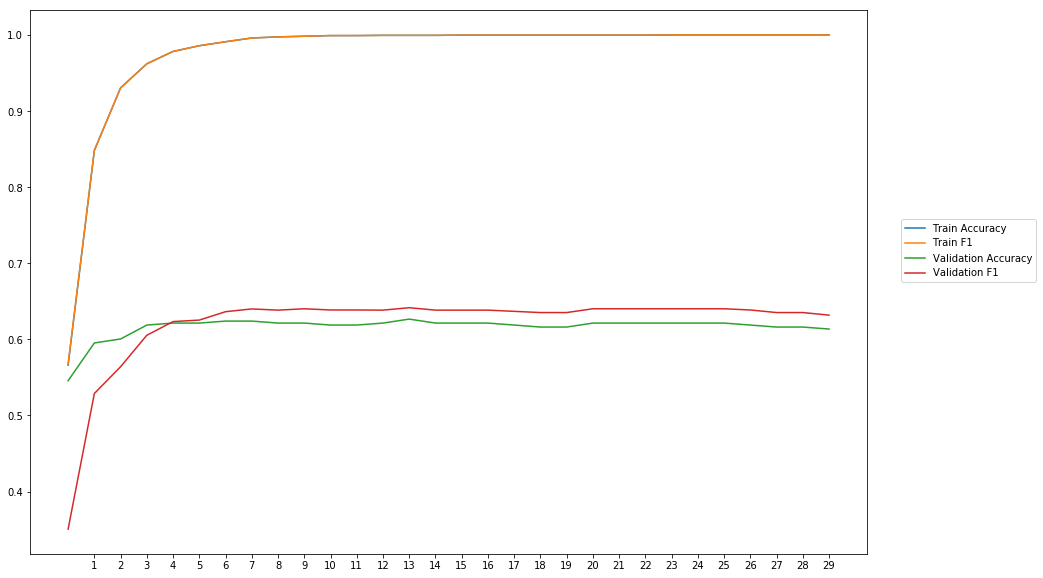

Average Accuracy: 61.63%
Average Precision: 61.04%
Average Recall: 63.96%
Average F1: 62.05%

-----Fold 10--------


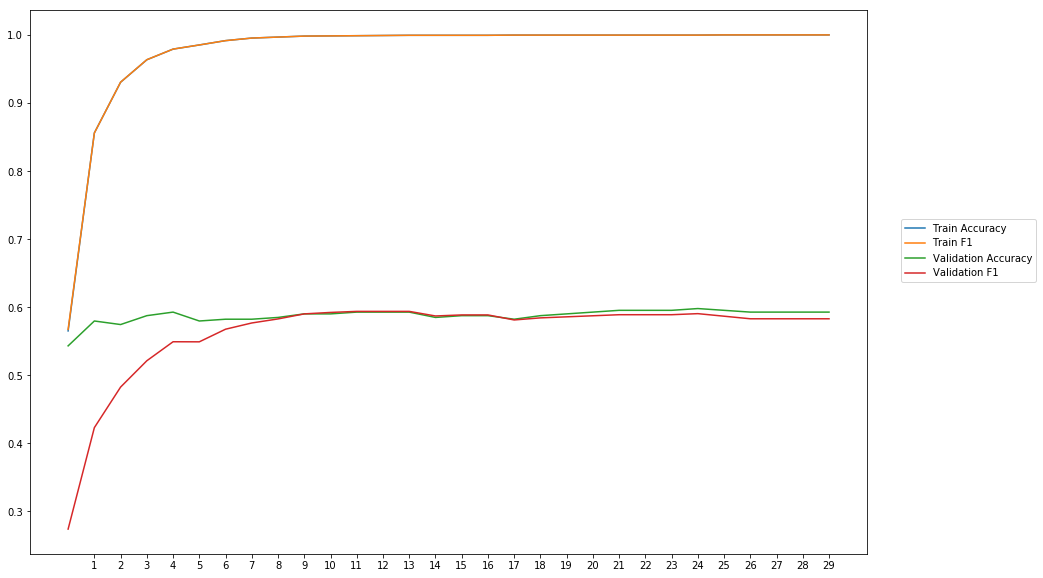

Average Accuracy: 58.76%
Average Precision: 59.81%
Average Recall: 54.35%
Average F1: 56.22%

-------Overallresults-------


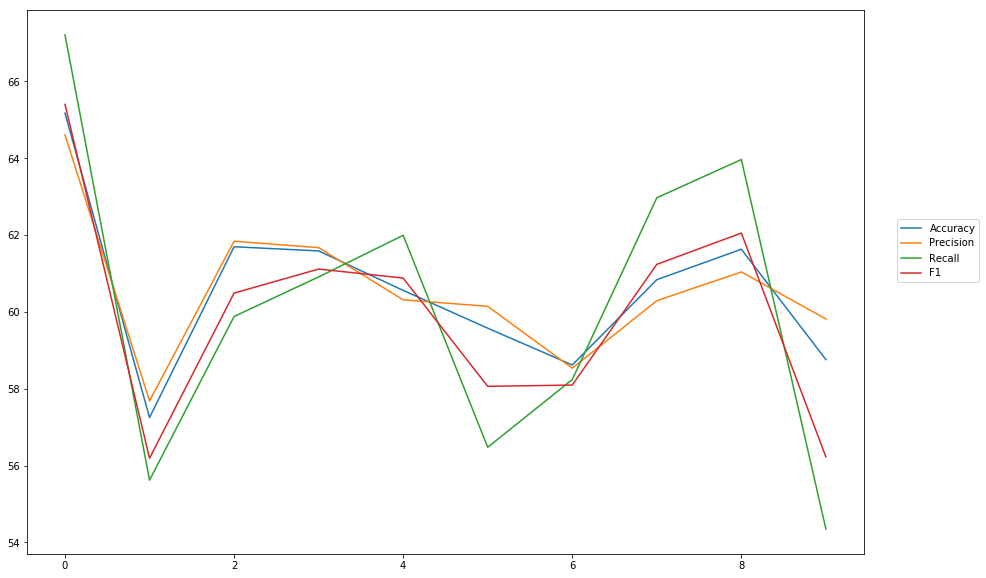

Accuracy: Mean = 60.57% (+/- 2.09%), Max = 65.17%, Min =  57.25%
Precision: Mean = 60.59% (+/- 1.81%), Max = 64.60%, Min =  57.68%
Recall: Mean = 60.16% (+/- 3.84%), Max = 67.20%, Min =  54.35%
F1: Mean = 59.97% (+/- 2.71%), Max = 65.40%, Min =  56.19%


In [30]:
cross_val_three_inputs(model_5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationAfterHiddenAxis1')

# Before and after hidden layer, axis =1

In [31]:
#Word Embeddings
wv_layer_6 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_6 = wv_layer_6(input_embedding_6)
x_embedding_6 = BatchNormalization(axis =1)(embedded_sequences_6)
x_embedding_6 = Dense(600, activation='relu')(x_embedding_6)
x_embedding_6 = BatchNormalization(axis =1)(x_embedding_6)
x_embedding_6 = Flatten()(x_embedding_6)

#Sentiment Features
input_sentiment_6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_6 = BatchNormalization(axis =1)(input_sentiment_6)
x_sentiment_6 = Dense(600, activation='relu')(x_sentiment_6)
x_sentiment_6 = BatchNormalization(axis =1)(x_sentiment_6)

#POS Features
input_pos_6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_6 = BatchNormalization(axis =1) (input_pos_6)
x_pos_6 = Dense(600, activation='relu')(x_pos_6)
x_pos_6 = BatchNormalization(axis =1)(x_pos_6)

#Concatination
concat_6 = concatenate([x_embedding_6, x_sentiment_6, x_pos_6])

preds_6 = Dense(2, activation='softmax')(concat_6)

model_6 = Model(inputs=[input_embedding_6, input_sentiment_6, input_pos_6], outputs=preds_6)


-----Fold 1--------


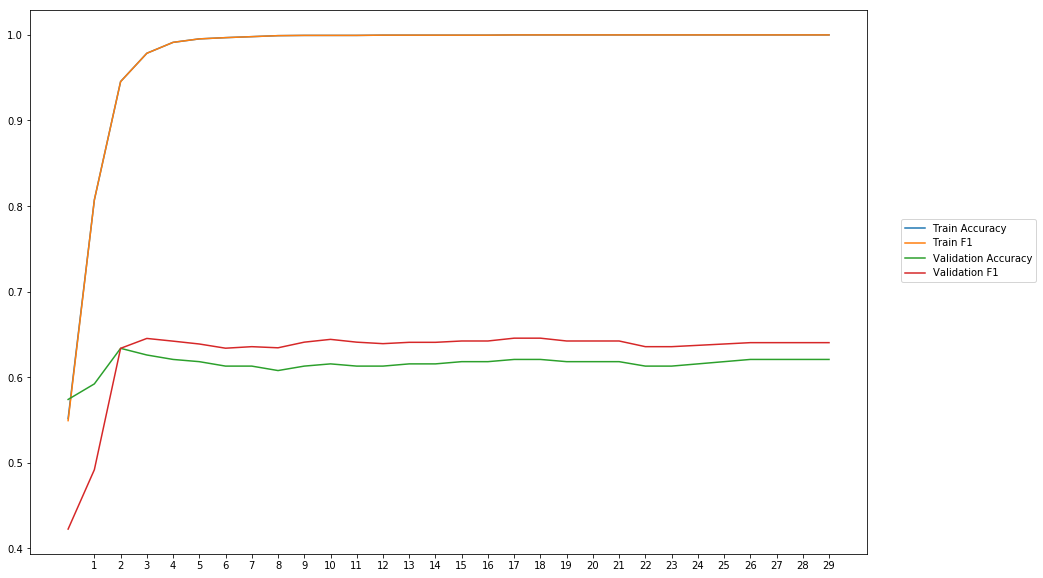

Average Accuracy: 61.53%
Average Precision: 60.65%
Average Recall: 66.01%
Average F1: 62.79%

-----Fold 2--------


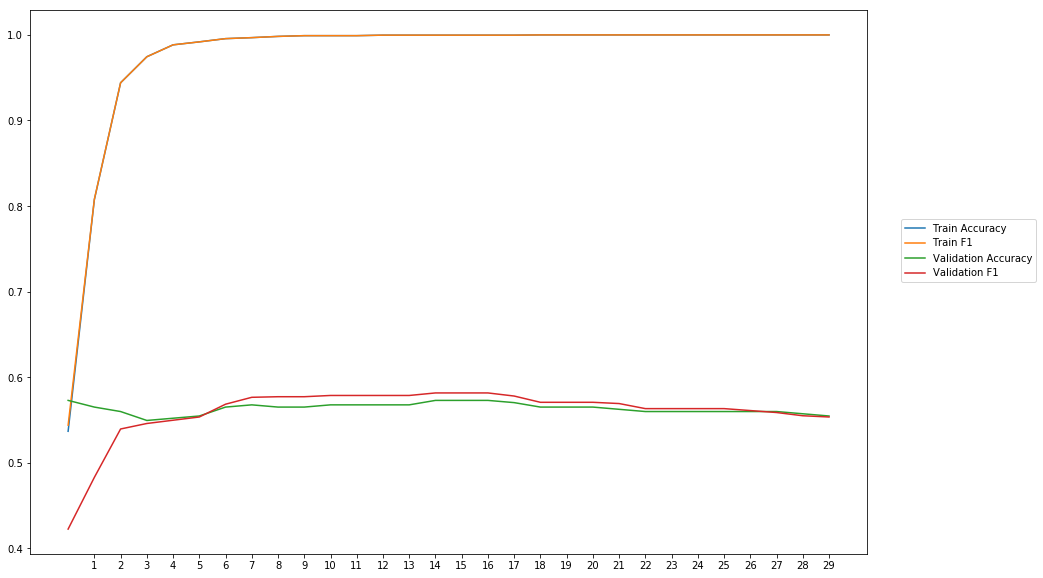

Average Accuracy: 56.35%
Average Precision: 56.29%
Average Recall: 56.21%
Average F1: 55.98%

-----Fold 3--------


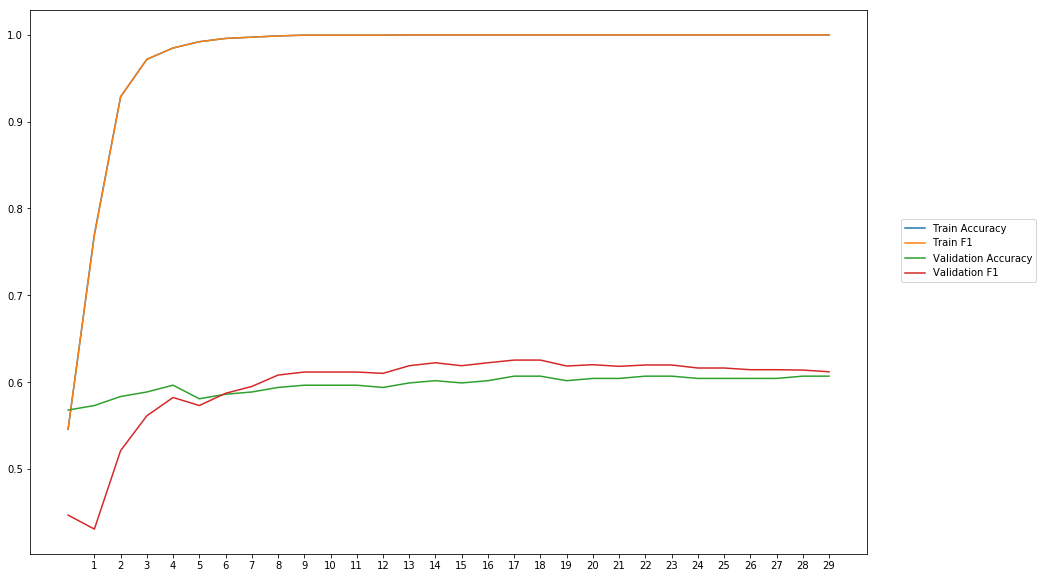

Average Accuracy: 59.70%
Average Precision: 59.43%
Average Recall: 60.51%
Average F1: 59.55%

-----Fold 4--------


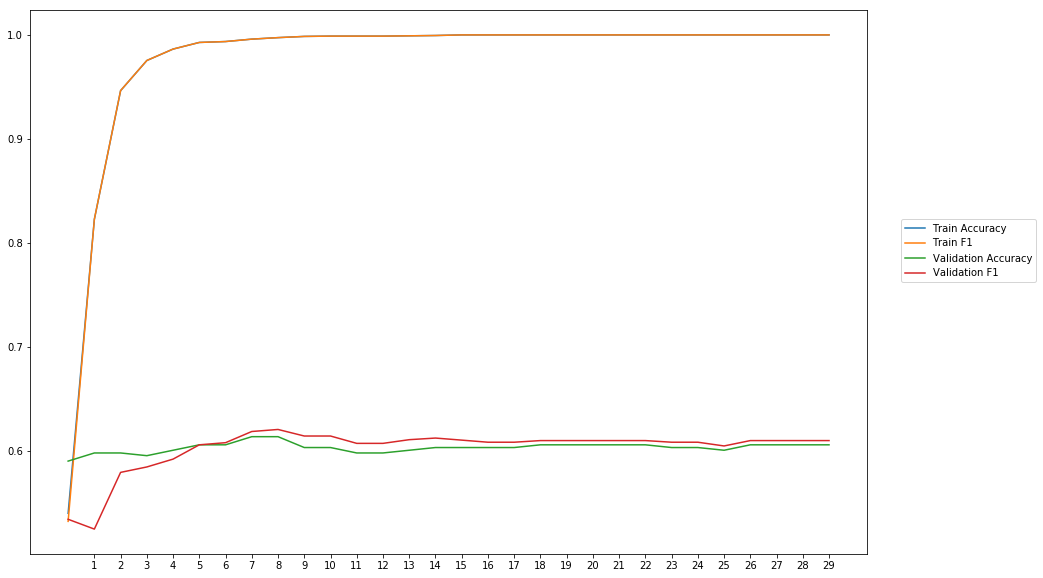

Average Accuracy: 60.31%
Average Precision: 60.21%
Average Recall: 60.47%
Average F1: 60.23%

-----Fold 5--------


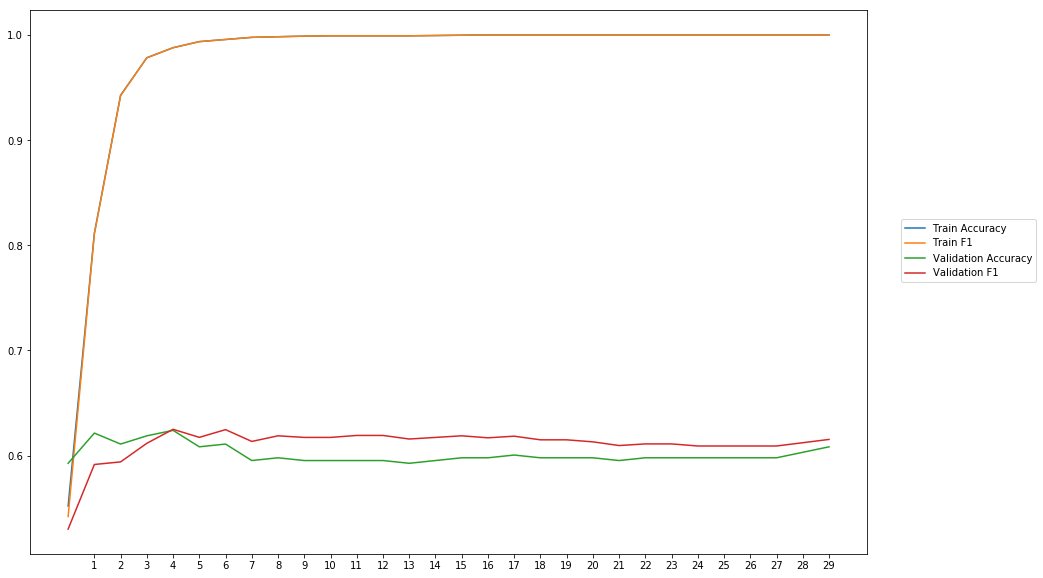

Average Accuracy: 60.11%
Average Precision: 59.56%
Average Recall: 62.93%
Average F1: 61.09%

-----Fold 6--------


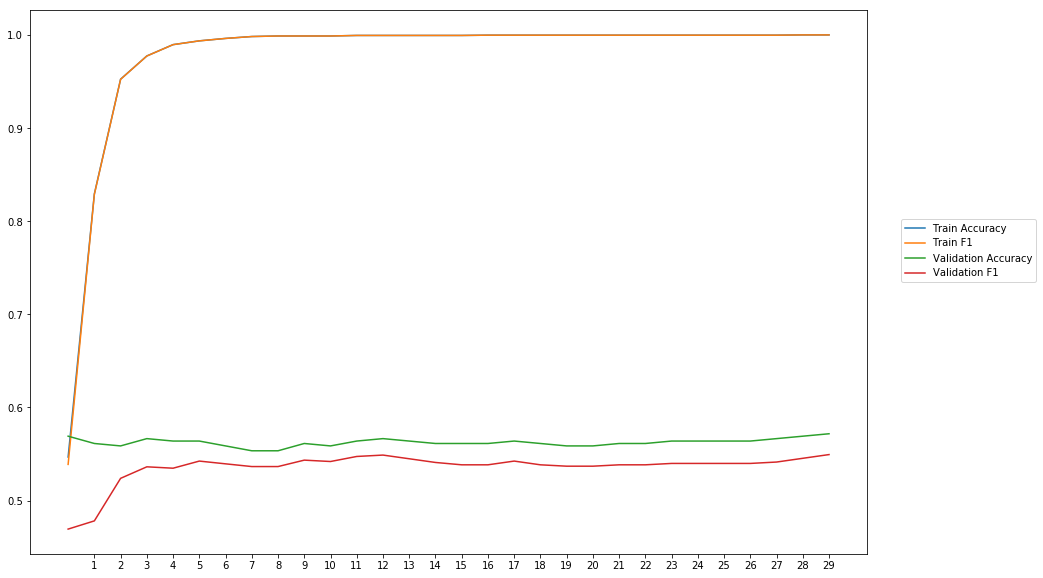

Average Accuracy: 56.26%
Average Precision: 56.95%
Average Recall: 50.72%
Average F1: 53.57%

-----Fold 7--------


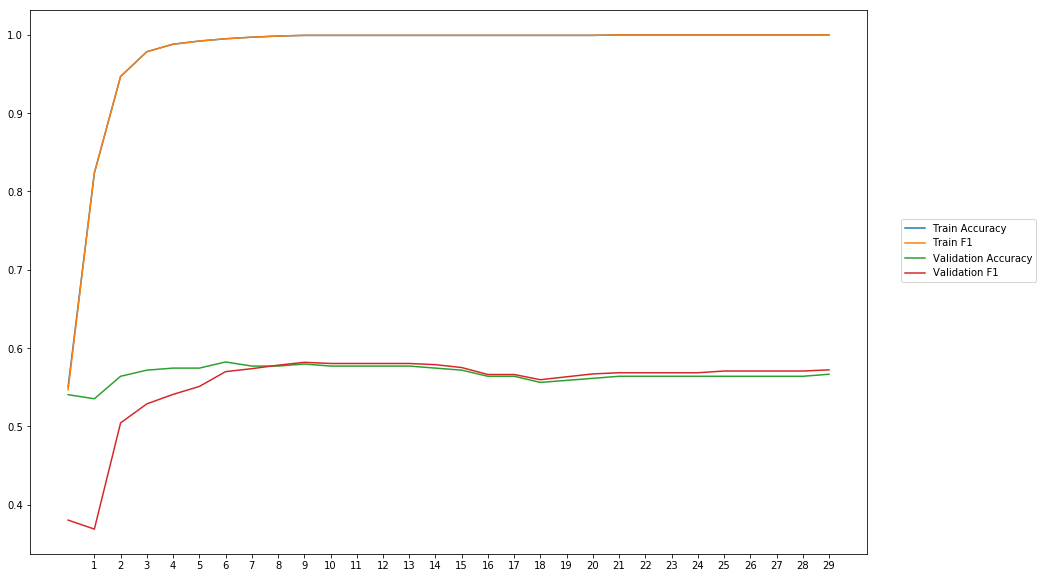

Average Accuracy: 56.71%
Average Precision: 56.94%
Average Recall: 54.59%
Average F1: 55.35%

-----Fold 8--------


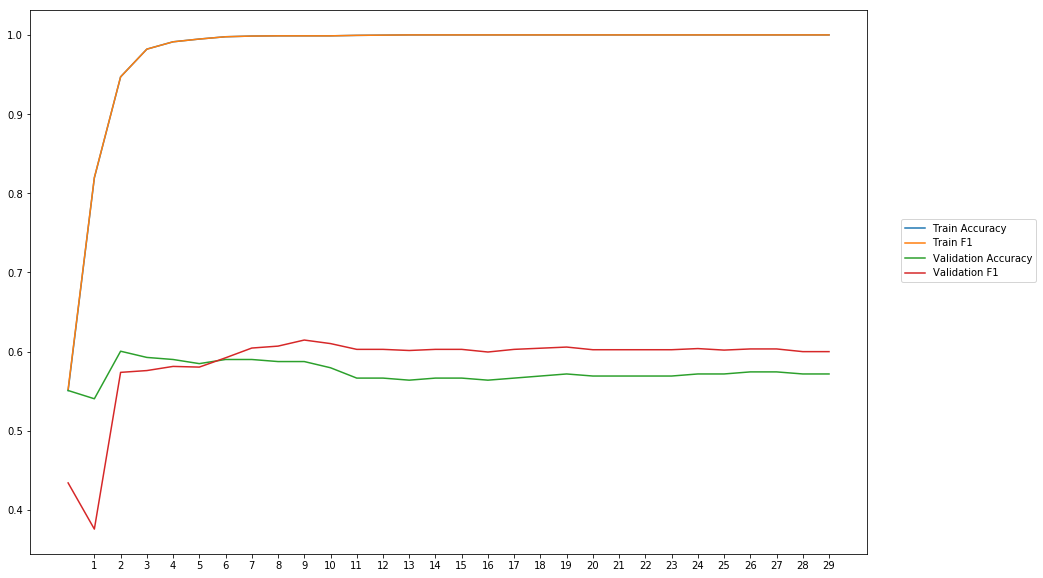

Average Accuracy: 57.36%
Average Precision: 56.83%
Average Recall: 61.62%
Average F1: 58.66%

-----Fold 9--------


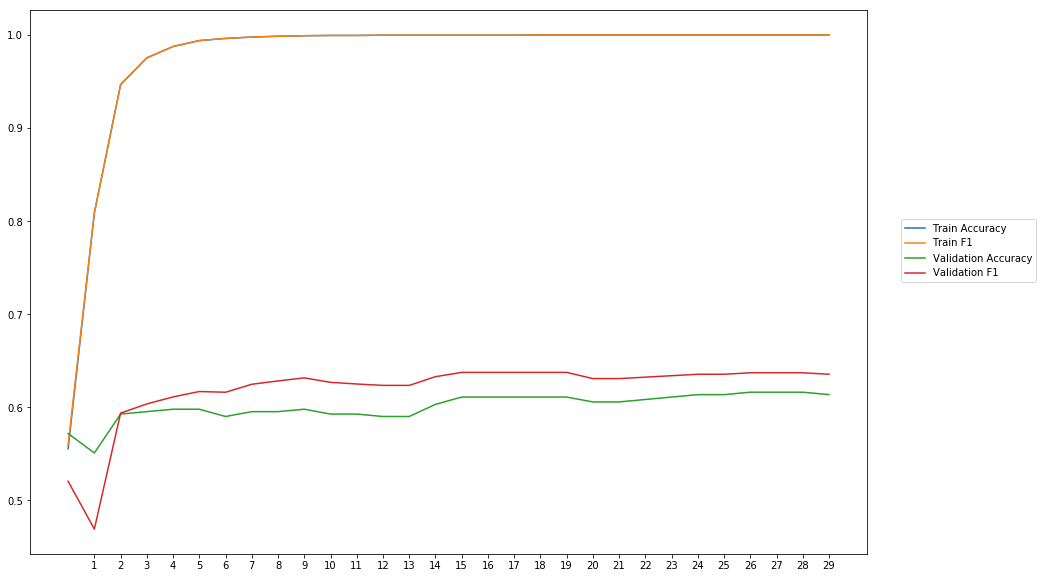

Average Accuracy: 60.10%
Average Precision: 58.98%
Average Recall: 65.57%
Average F1: 61.93%

-----Fold 10--------


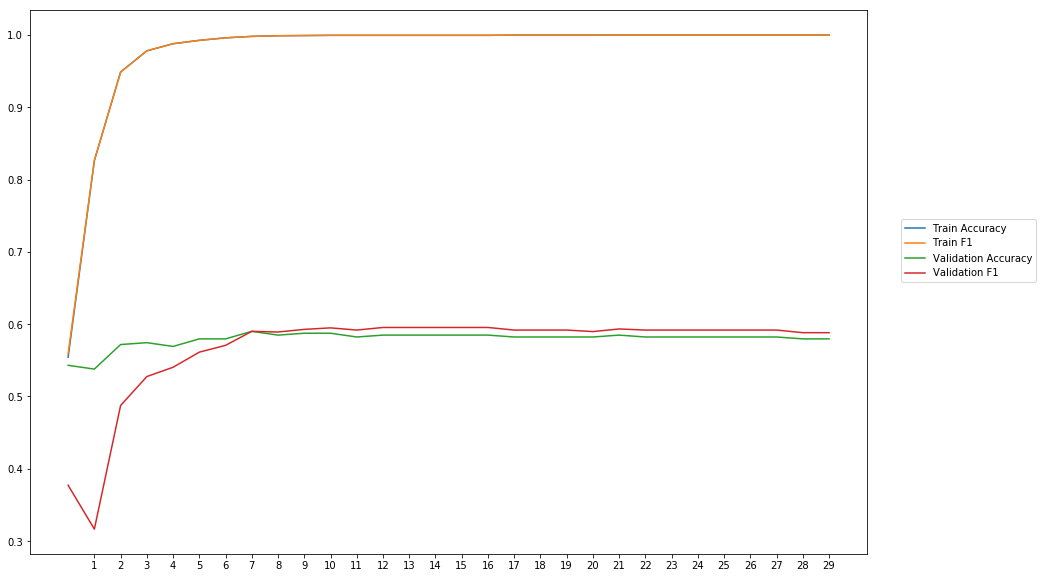

Average Accuracy: 57.93%
Average Precision: 58.14%
Average Recall: 56.44%
Average F1: 56.68%

-------Overallresults-------


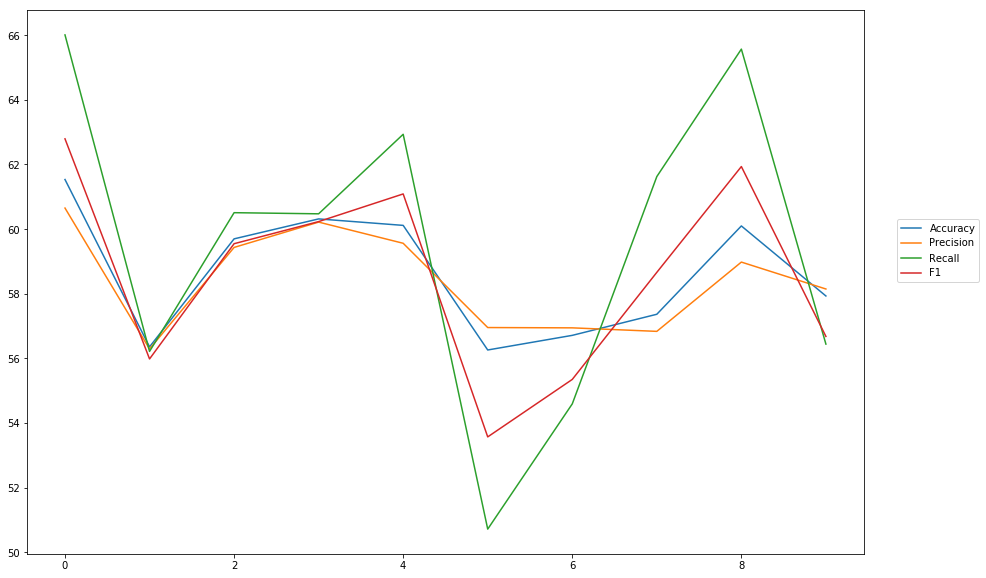

Accuracy: Mean = 58.64% (+/- 1.83%), Max = 61.53%, Min =  56.26%
Precision: Mean = 58.40% (+/- 1.49%), Max = 60.65%, Min =  56.29%
Recall: Mean = 59.51% (+/- 4.68%), Max = 66.01%, Min =  50.72%
F1: Mean = 58.58% (+/- 2.91%), Max = 62.79%, Min =  53.57%


In [32]:
cross_val_three_inputs(model_6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeAfterHiddenAxis1')

# Normalization before output

In [16]:
#word Embeddings
wv_layer_7 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_7 = wv_layer_7(input_embedding_7)
x_embedding_7 = Dense(600, activation='relu')(embedded_sequences_7)
x_embedding_7 = Flatten()(x_embedding_7)

#Sentiment Features
input_sentiment_7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_7 = Dense(600, activation='relu')(input_sentiment_7)

#POS Features
input_pos_7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_7 = Dense(600, activation='relu')(input_pos_7)

#Concatination
concat_7 = concatenate([x_embedding_7, x_sentiment_7, x_pos_7])

normal_7 = BatchNormalization()(concat_7)

preds_7 = Dense(2, activation='softmax')(normal_7)

model_7 = Model(inputs=[input_embedding_7, input_sentiment_7, input_pos_7], outputs=preds_7)


-----Fold 1--------


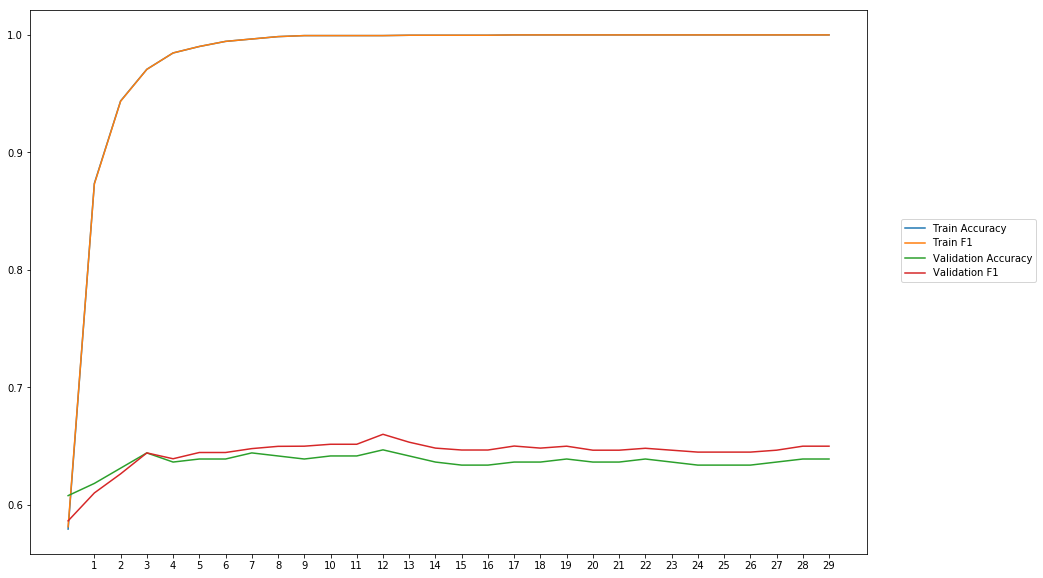

Average Accuracy: 63.64%
Average Precision: 62.91%
Average Recall: 65.99%
Average F1: 64.39%

-----Fold 2--------


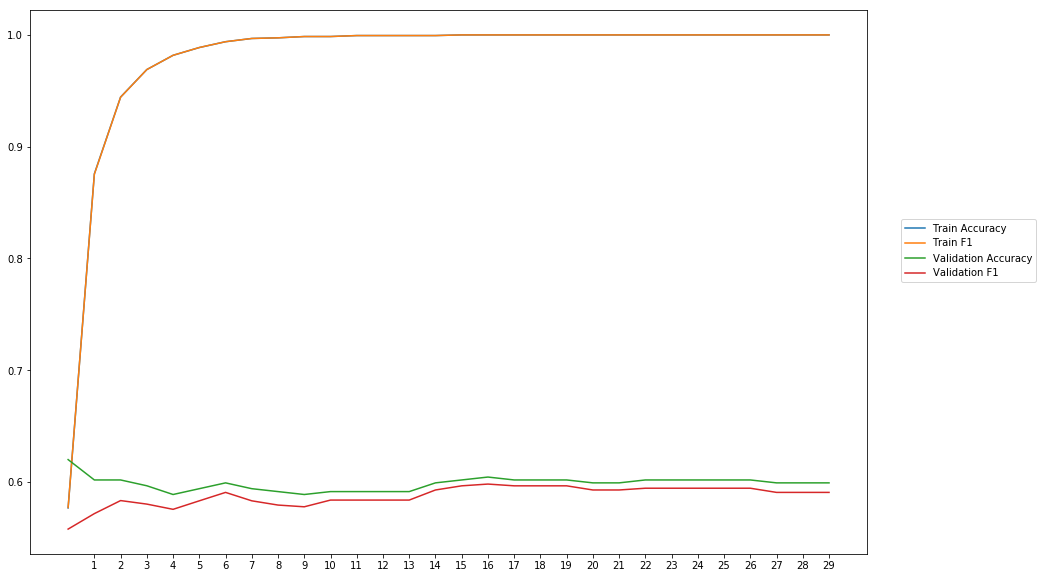

Average Accuracy: 59.84%
Average Precision: 60.11%
Average Recall: 57.49%
Average F1: 58.72%

-----Fold 3--------


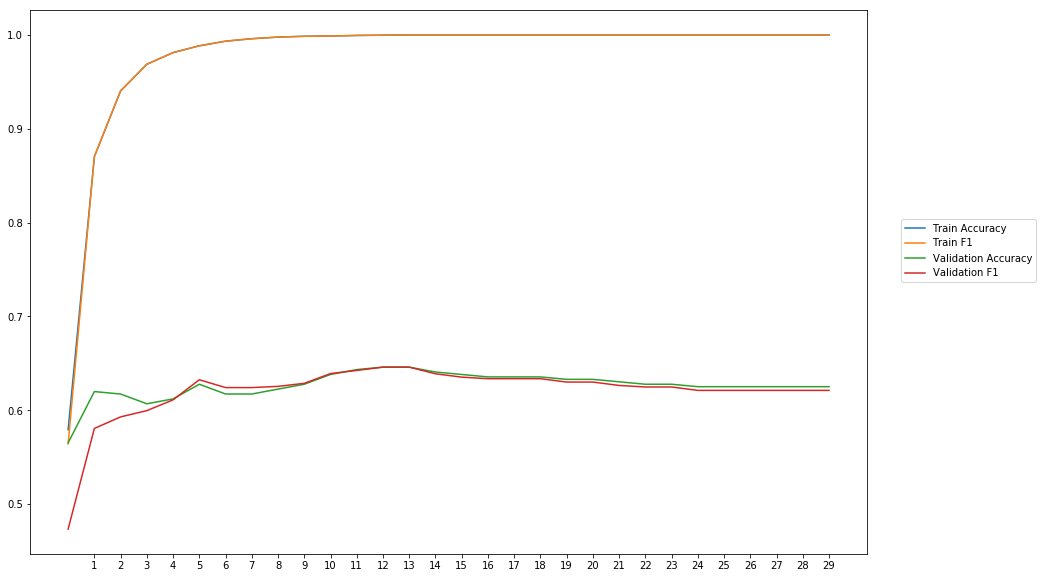

Average Accuracy: 62.64%
Average Precision: 62.65%
Average Recall: 61.55%
Average F1: 62.00%

-----Fold 4--------


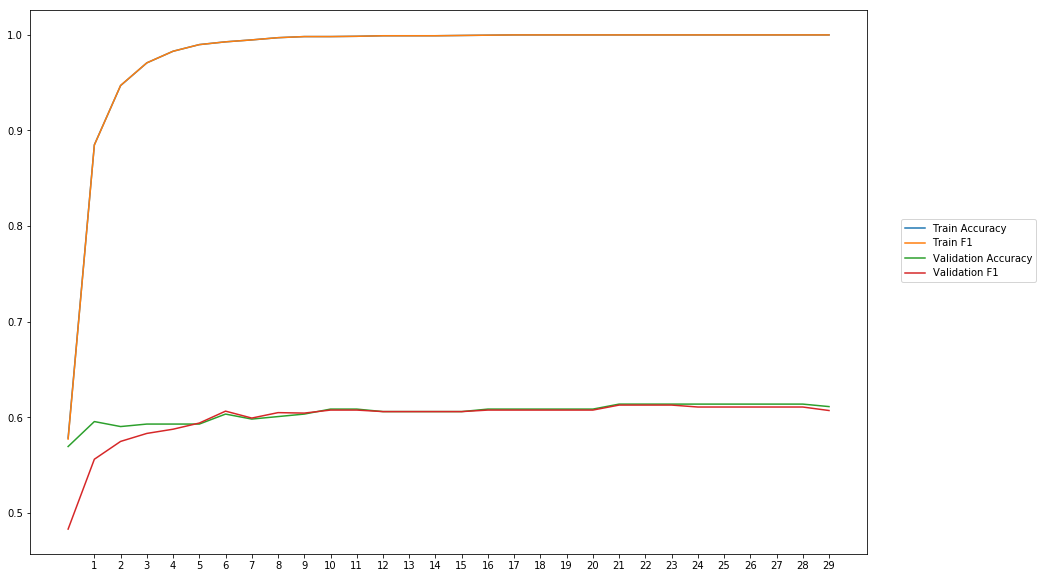

Average Accuracy: 60.46%
Average Precision: 60.57%
Average Recall: 59.35%
Average F1: 59.88%

-----Fold 5--------


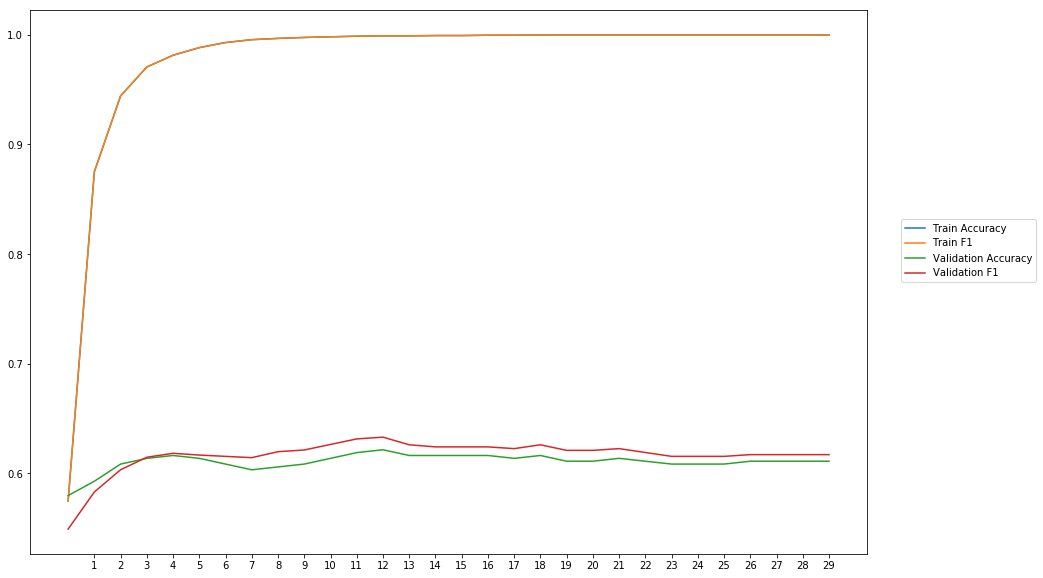

Average Accuracy: 61.04%
Average Precision: 60.54%
Average Recall: 62.81%
Average F1: 61.63%

-----Fold 6--------


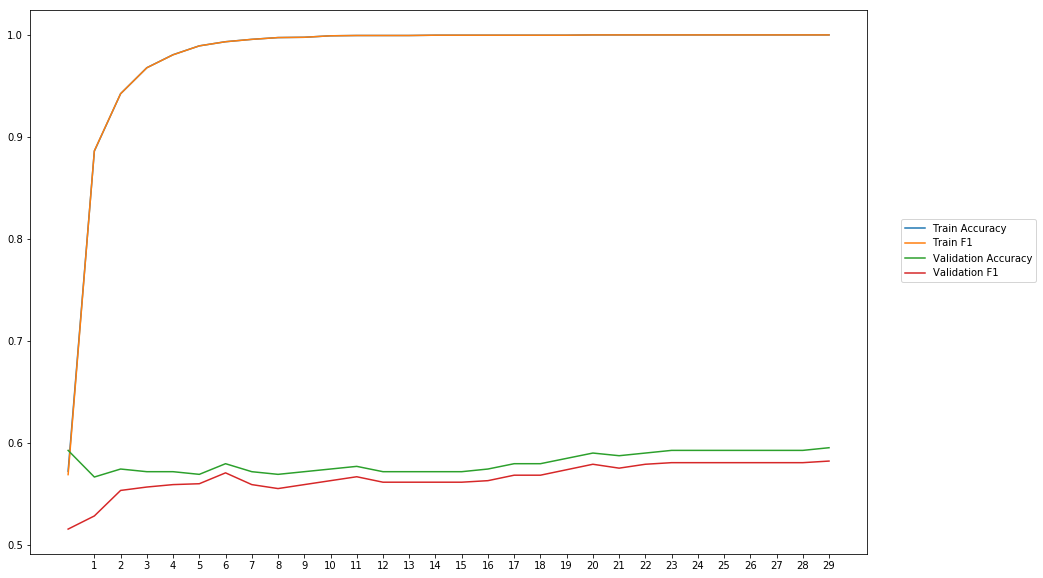

Average Accuracy: 58.05%
Average Precision: 58.51%
Average Recall: 54.82%
Average F1: 56.55%

-----Fold 7--------


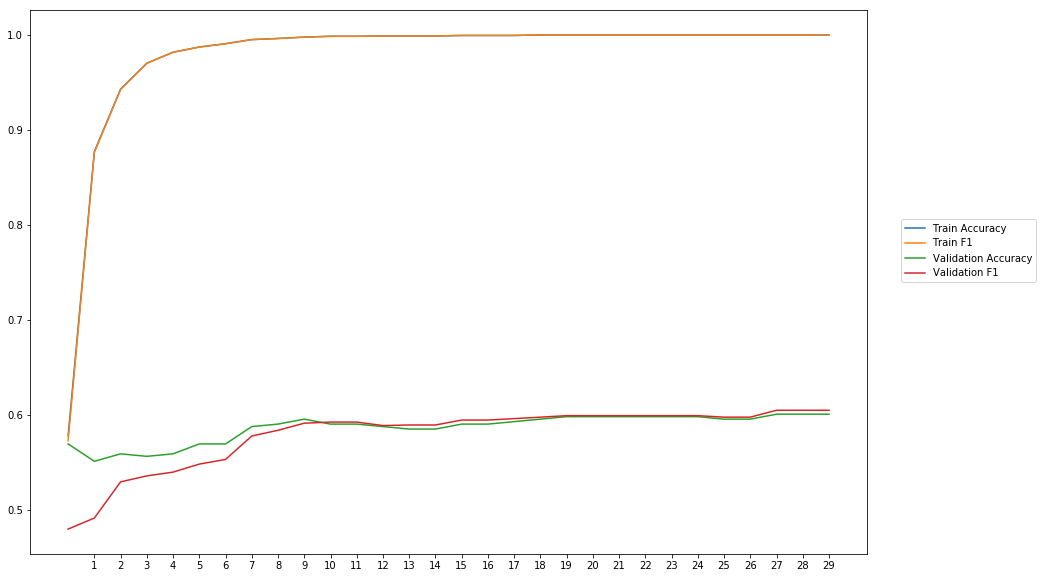

Average Accuracy: 58.63%
Average Precision: 58.71%
Average Recall: 57.29%
Average F1: 57.88%

-----Fold 8--------


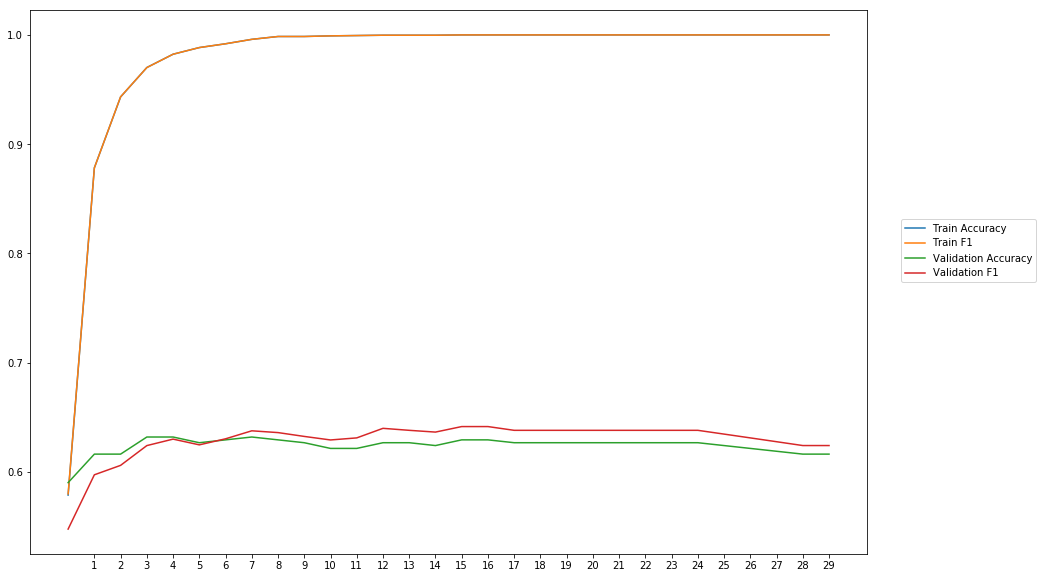

Average Accuracy: 62.39%
Average Precision: 61.89%
Average Recall: 64.03%
Average F1: 62.89%

-----Fold 9--------


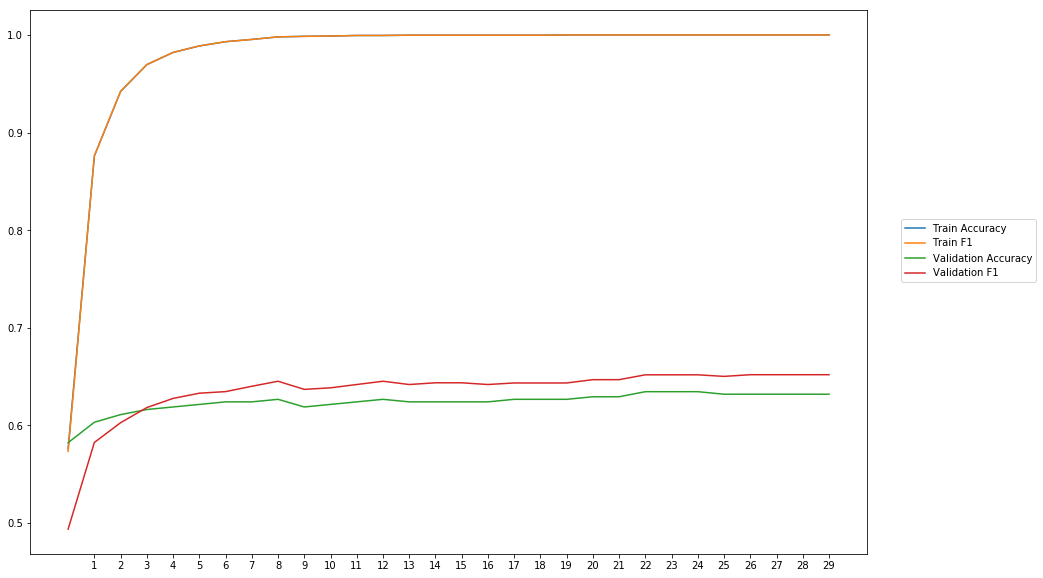

Average Accuracy: 62.38%
Average Precision: 61.46%
Average Recall: 65.95%
Average F1: 63.49%

-----Fold 10--------


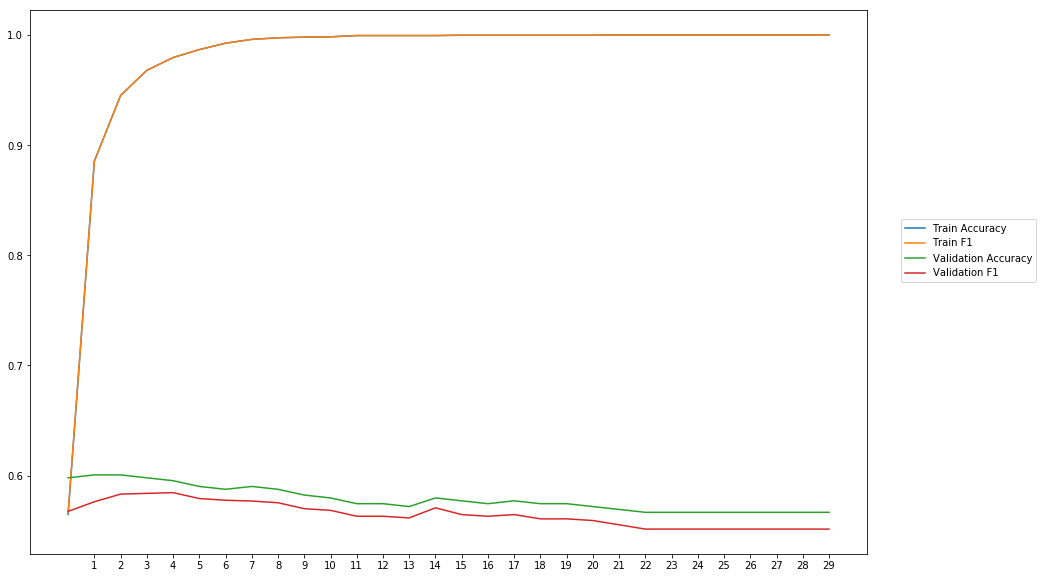

Average Accuracy: 57.87%
Average Precision: 58.26%
Average Recall: 54.78%
Average F1: 56.46%

-------Overallresults-------


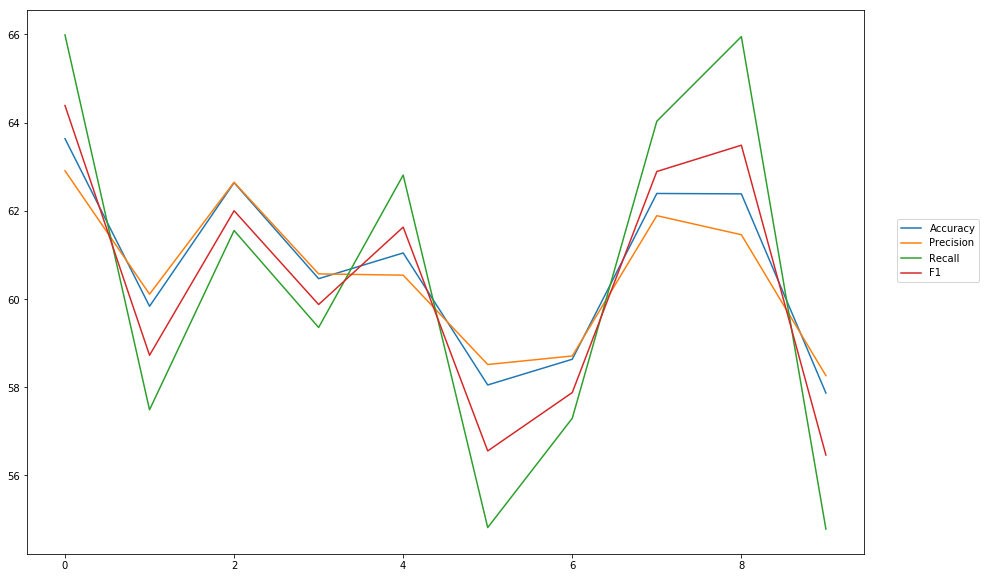

Accuracy: Mean = 60.69% (+/- 1.96%), Max = 63.64%, Min =  57.87%
Precision: Mean = 60.56% (+/- 1.60%), Max = 62.91%, Min =  58.26%
Recall: Mean = 60.41% (+/- 4.05%), Max = 65.99%, Min =  54.78%
F1: Mean = 60.39% (+/- 2.75%), Max = 64.39%, Min =  56.46%


In [44]:
cross_val_three_inputs(model_7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeOutput')

# Normalization before output, axis = 1

In [45]:
#word Embeddings
wv_layer_8 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_8 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_8 = wv_layer_8(input_embedding_8)
x_embedding_8 = Dense(600, activation='relu')(embedded_sequences_8)
x_embedding_8 = Flatten()(x_embedding_8)

#Sentiment Features
input_sentiment_8 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_8 = Dense(600, activation='relu')(input_sentiment_8)

#POS Features
input_pos_8 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_8 = Dense(600, activation='relu')(input_pos_8)

#Concatination
concat_8 = concatenate([x_embedding_8, x_sentiment_8, x_pos_8])

normal_8 = BatchNormalization(axis=1)(concat_8)

preds_8 = Dense(2, activation='softmax')(normal_8)

model_8 = Model(inputs=[input_embedding_8, input_sentiment_8, input_pos_8], outputs=preds_8)


-----Fold 1--------


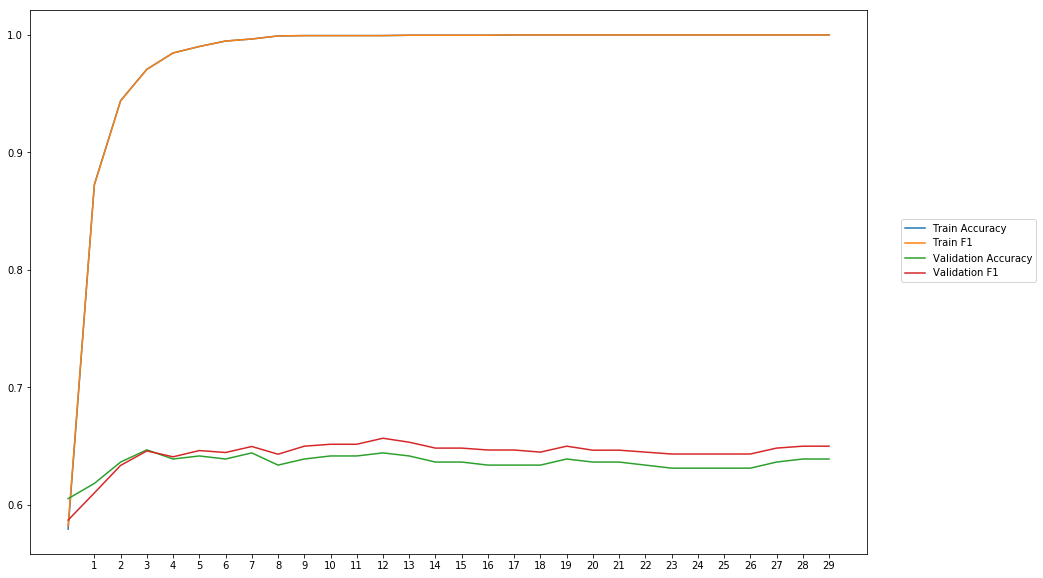

Average Accuracy: 63.57%
Average Precision: 62.82%
Average Recall: 66.01%
Average F1: 64.35%

-----Fold 2--------


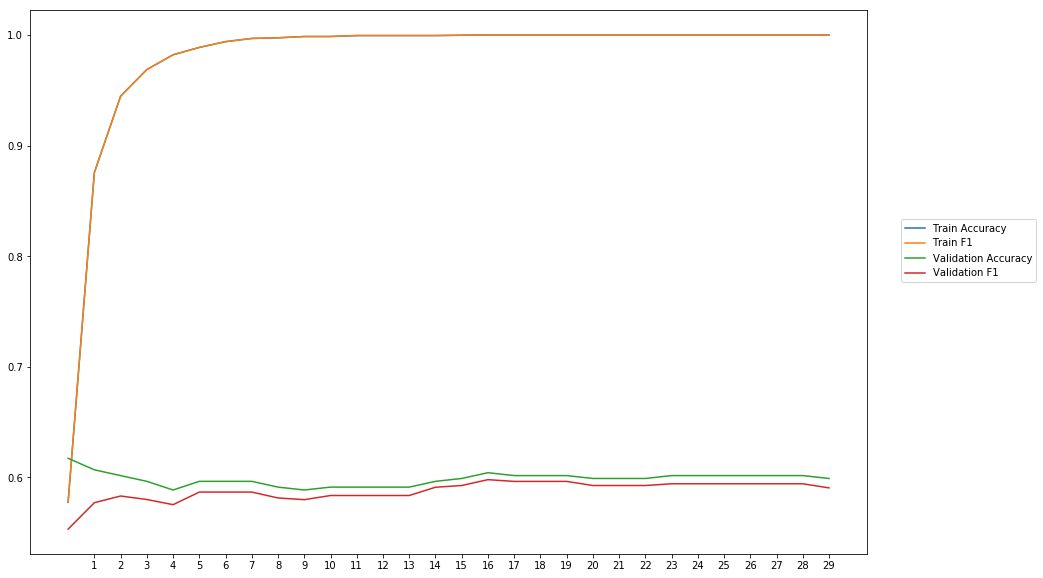

Average Accuracy: 59.84%
Average Precision: 60.11%
Average Recall: 57.56%
Average F1: 58.76%

-----Fold 3--------


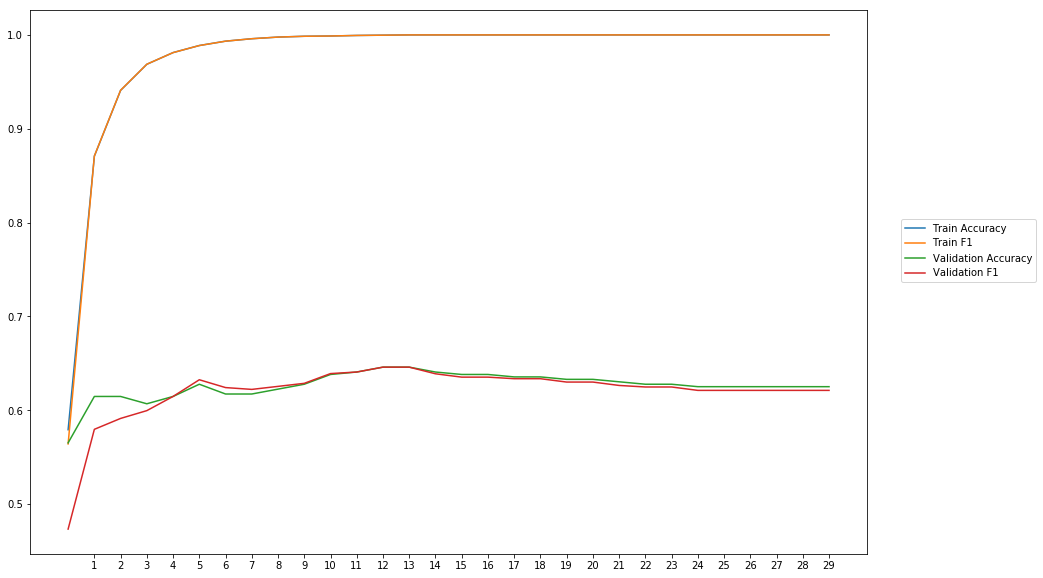

Average Accuracy: 62.62%
Average Precision: 62.61%
Average Recall: 61.57%
Average F1: 62.00%

-----Fold 4--------


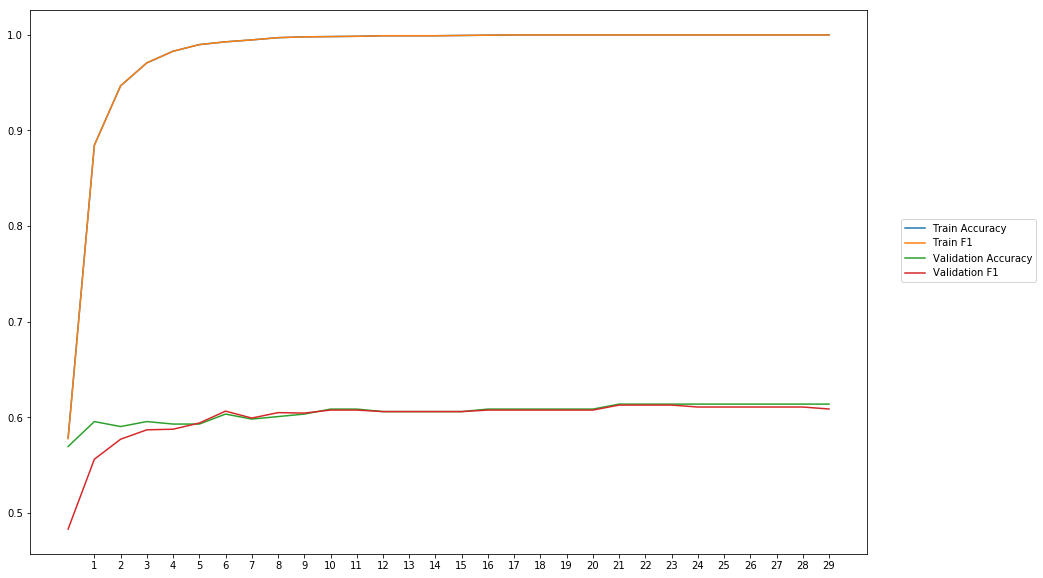

Average Accuracy: 60.48%
Average Precision: 60.58%
Average Recall: 59.39%
Average F1: 59.90%

-----Fold 5--------


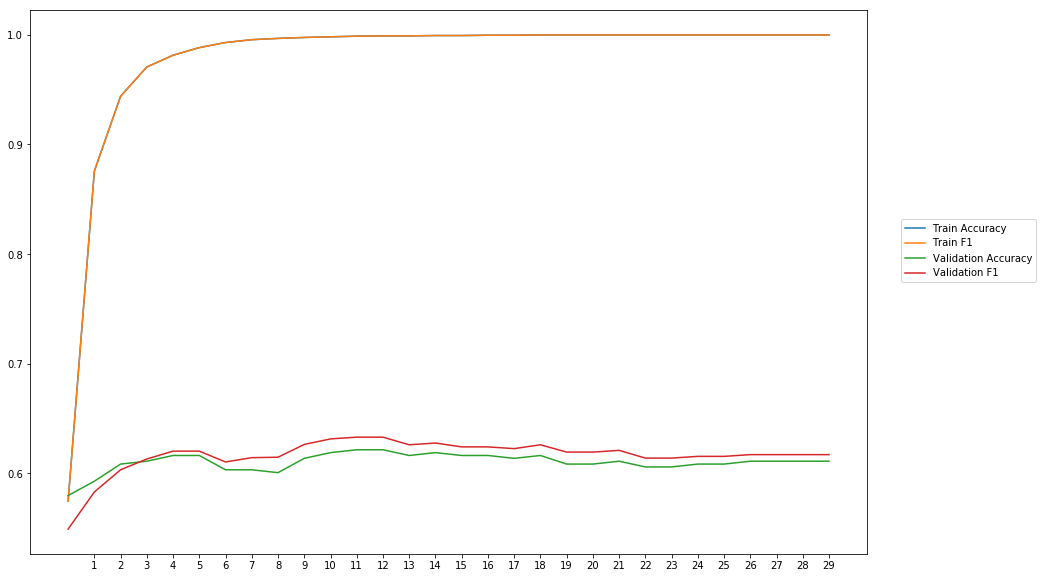

Average Accuracy: 61.01%
Average Precision: 60.49%
Average Recall: 62.84%
Average F1: 61.62%

-----Fold 6--------


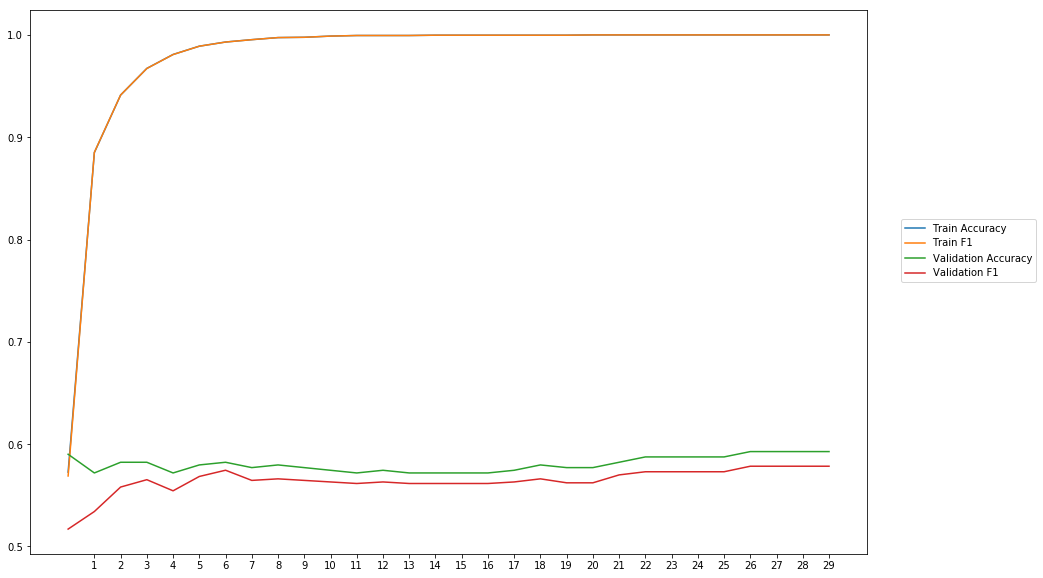

Average Accuracy: 58.04%
Average Precision: 58.55%
Average Recall: 54.54%
Average F1: 56.43%

-----Fold 7--------


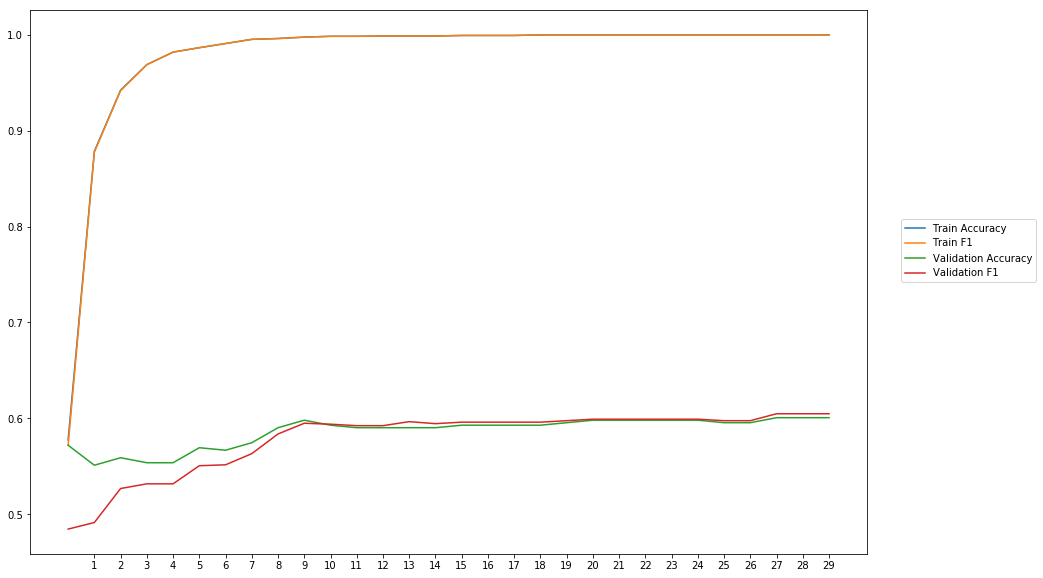

Average Accuracy: 58.62%
Average Precision: 58.69%
Average Recall: 57.29%
Average F1: 57.87%

-----Fold 8--------


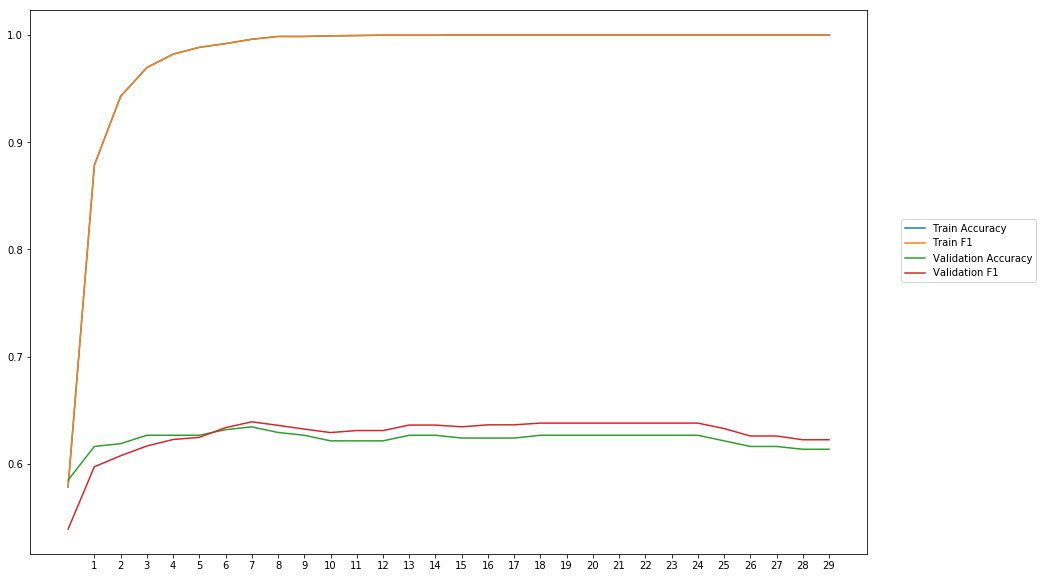

Average Accuracy: 62.26%
Average Precision: 61.79%
Average Recall: 63.79%
Average F1: 62.72%

-----Fold 9--------


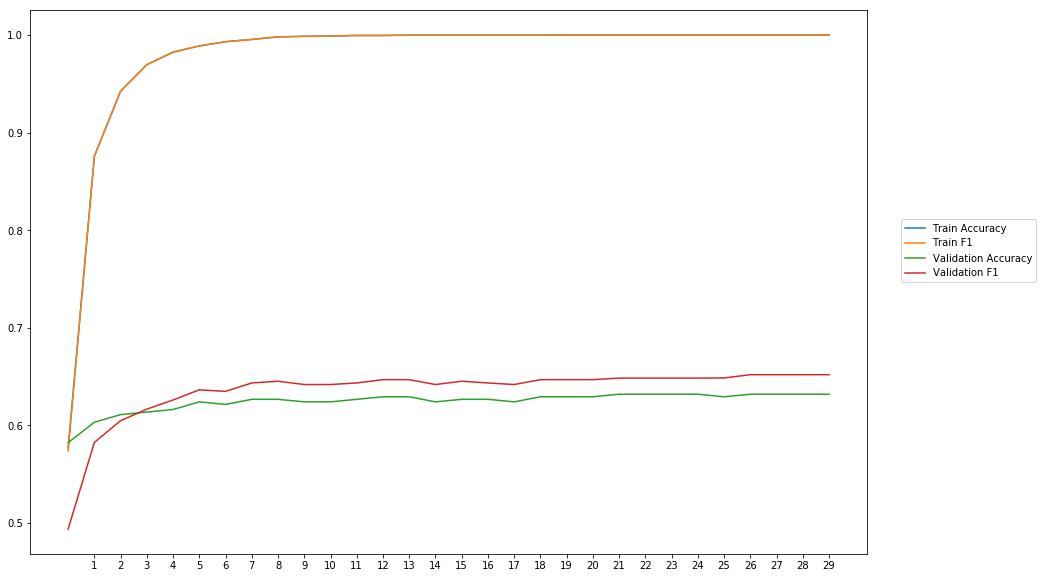

Average Accuracy: 62.44%
Average Precision: 61.50%
Average Recall: 66.04%
Average F1: 63.55%

-----Fold 10--------


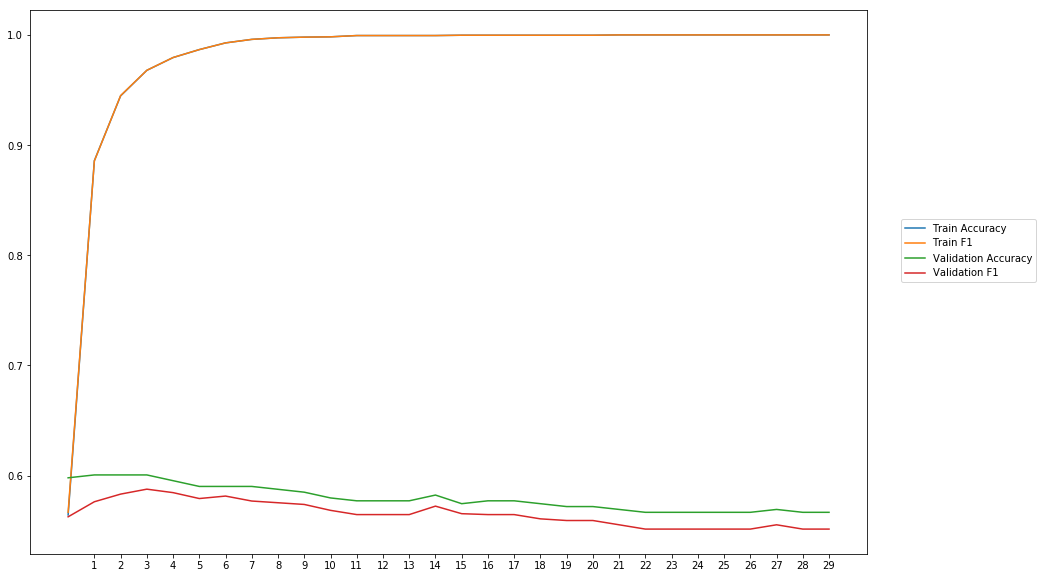

Average Accuracy: 57.94%
Average Precision: 58.34%
Average Recall: 54.83%
Average F1: 56.52%

-------Overallresults-------


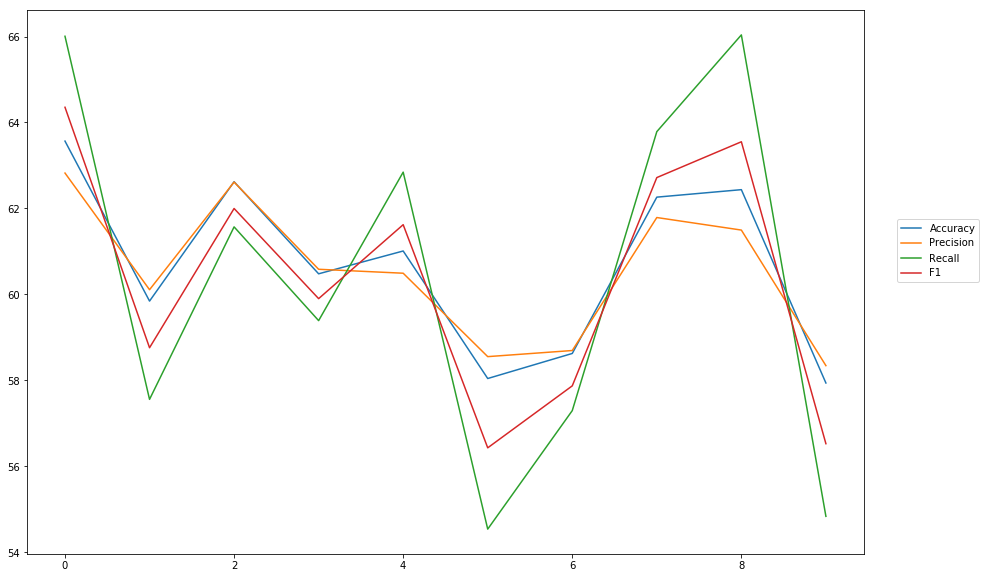

Accuracy: Mean = 60.68% (+/- 1.93%), Max = 63.57%, Min =  57.94%
Precision: Mean = 60.55% (+/- 1.56%), Max = 62.82%, Min =  58.34%
Recall: Mean = 60.39% (+/- 4.08%), Max = 66.04%, Min =  54.54%
F1: Mean = 60.37% (+/- 2.74%), Max = 64.35%, Min =  56.43%


In [46]:
cross_val_three_inputs(model_7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeOutputAxis1')

# Normalization before hidden layer and output layer, axis =1

In [47]:
#Word Embeddings
wv_layer_9 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_9 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_9 = wv_layer_9(input_embedding_9)
x_embedding_9 = BatchNormalization(axis =1)(embedded_sequences_9)
x_embedding_9 = Dense(600, activation='relu', use_bias = False)(x_embedding_9)
x_embedding_9 = Flatten()(x_embedding_9)

#Sentiment Features
input_sentiment_9 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_9 = BatchNormalization(axis =1)(input_sentiment_9)
x_sentiment_9 = Dense(600, activation='relu', use_bias = False)(x_sentiment_9)

#POS Features
input_pos_9 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_9 = BatchNormalization(axis =1)(input_pos_9)
x_pos_9 = Dense(600, activation='relu', use_bias = False)(x_pos_9)

#Concatination
concat_9 = concatenate([x_embedding_9, x_sentiment_9, x_pos_9])
preds_9 = BatchNormalization(axis =1)(concat_9)
preds_9 = Dense(2, activation='softmax')(preds_9)

model_9 = Model(inputs=[input_embedding_9, input_sentiment_9, input_pos_9], outputs=preds_9)


-----Fold 1--------


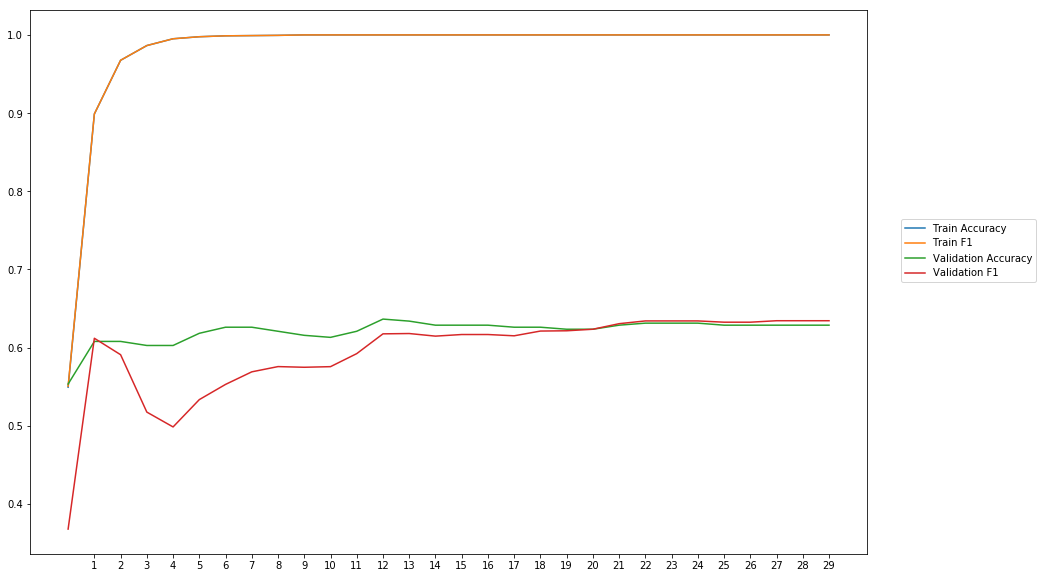

Average Accuracy: 62.11%
Average Precision: 63.69%
Average Recall: 56.63%
Average F1: 59.41%

-----Fold 2--------


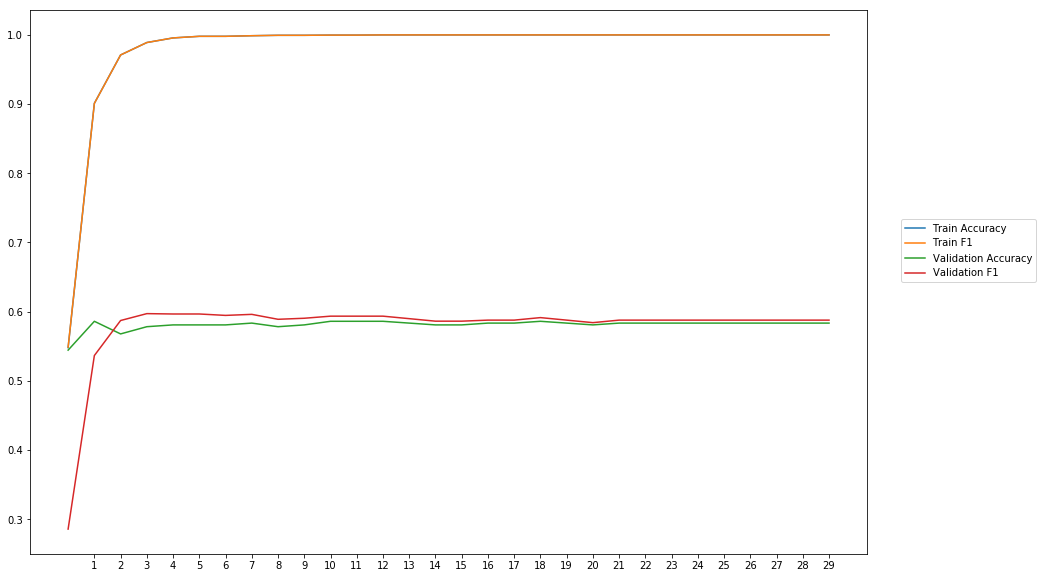

Average Accuracy: 58.10%
Average Precision: 57.97%
Average Recall: 58.60%
Average F1: 57.79%

-----Fold 3--------


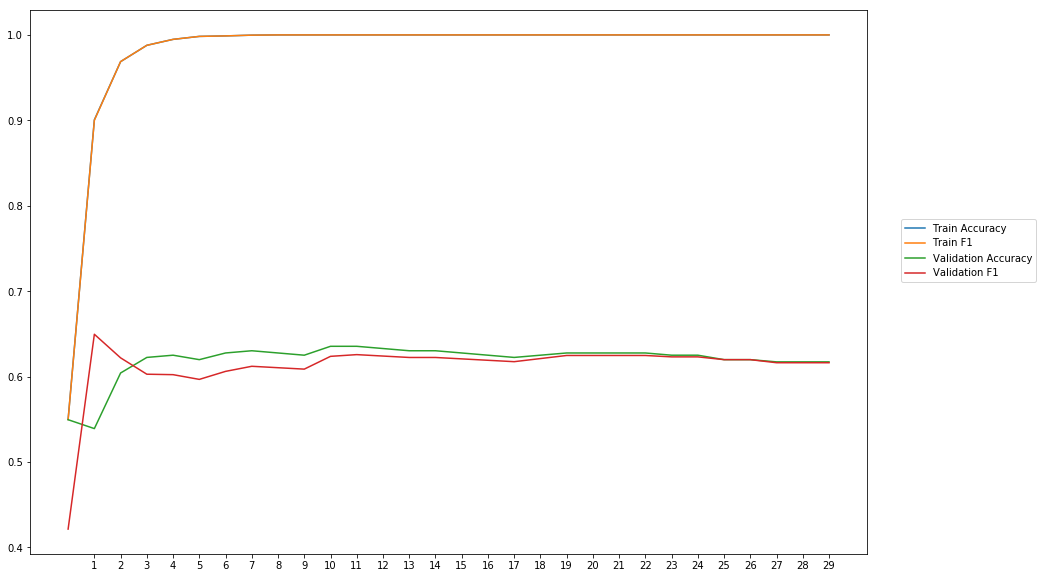

Average Accuracy: 61.95%
Average Precision: 62.19%
Average Recall: 60.80%
Average F1: 61.20%

-----Fold 4--------


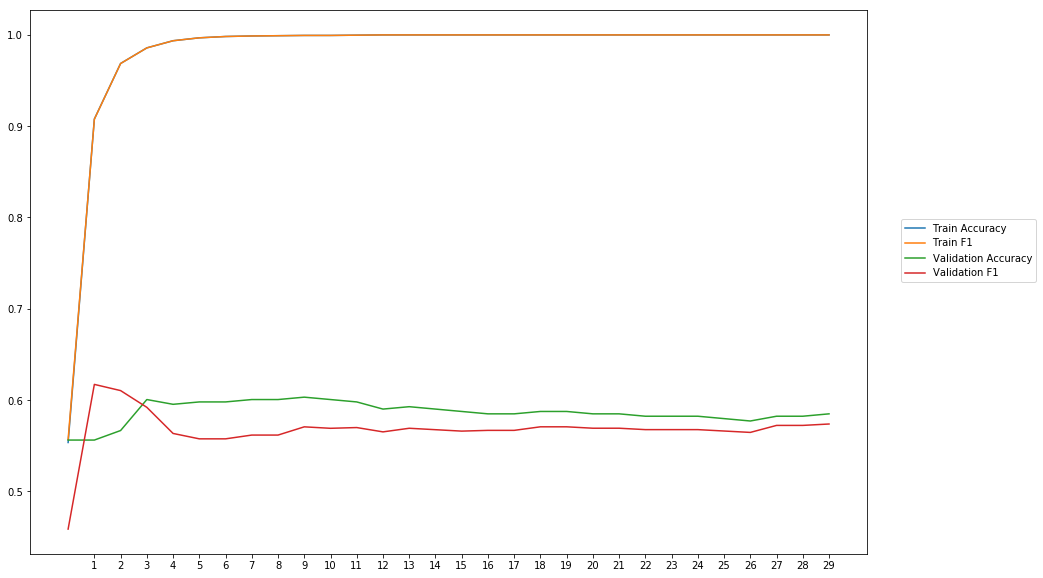

Average Accuracy: 58.67%
Average Precision: 59.47%
Average Recall: 54.61%
Average F1: 56.74%

-----Fold 5--------


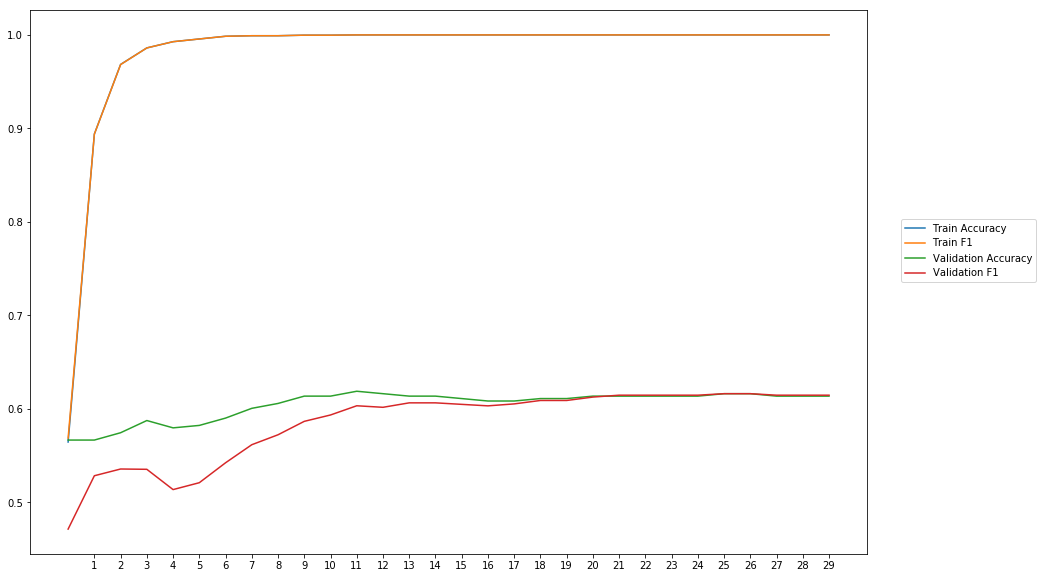

Average Accuracy: 60.44%
Average Precision: 61.19%
Average Recall: 56.42%
Average F1: 58.52%

-----Fold 6--------


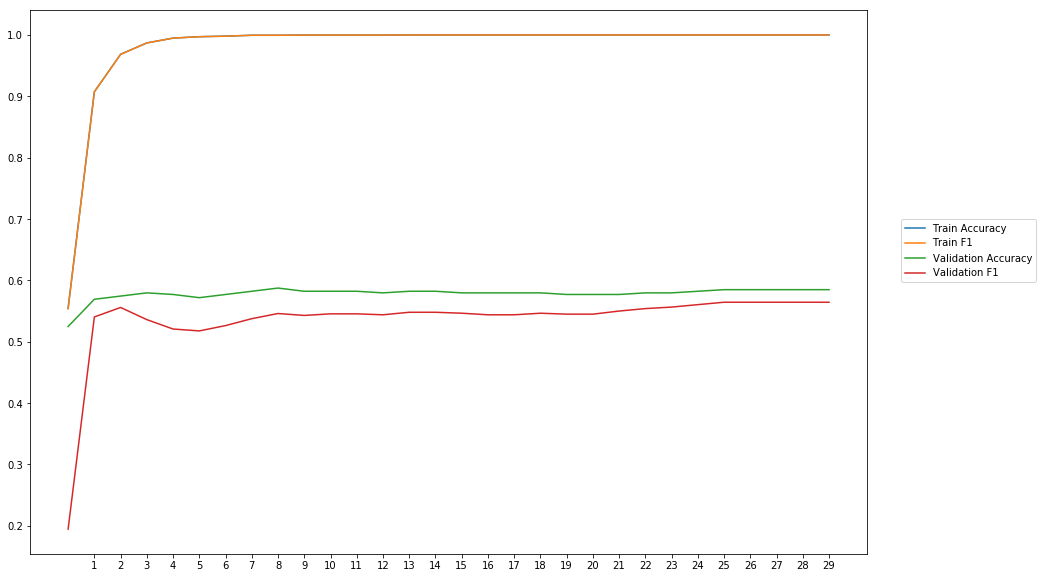

Average Accuracy: 57.83%
Average Precision: 59.33%
Average Recall: 49.60%
Average F1: 53.54%

-----Fold 7--------


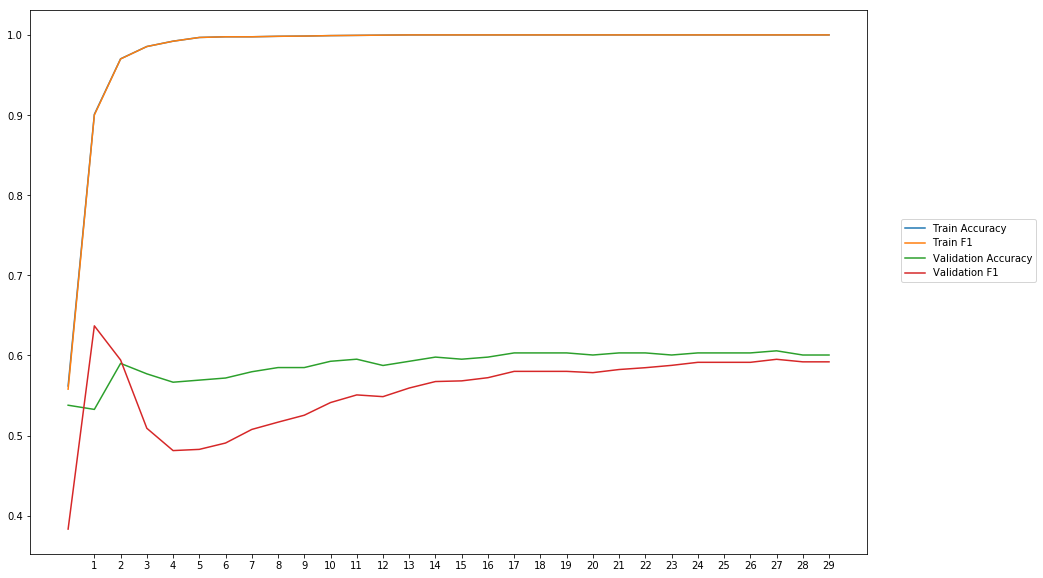

Average Accuracy: 58.96%
Average Precision: 60.40%
Average Recall: 52.23%
Average F1: 55.54%

-----Fold 8--------


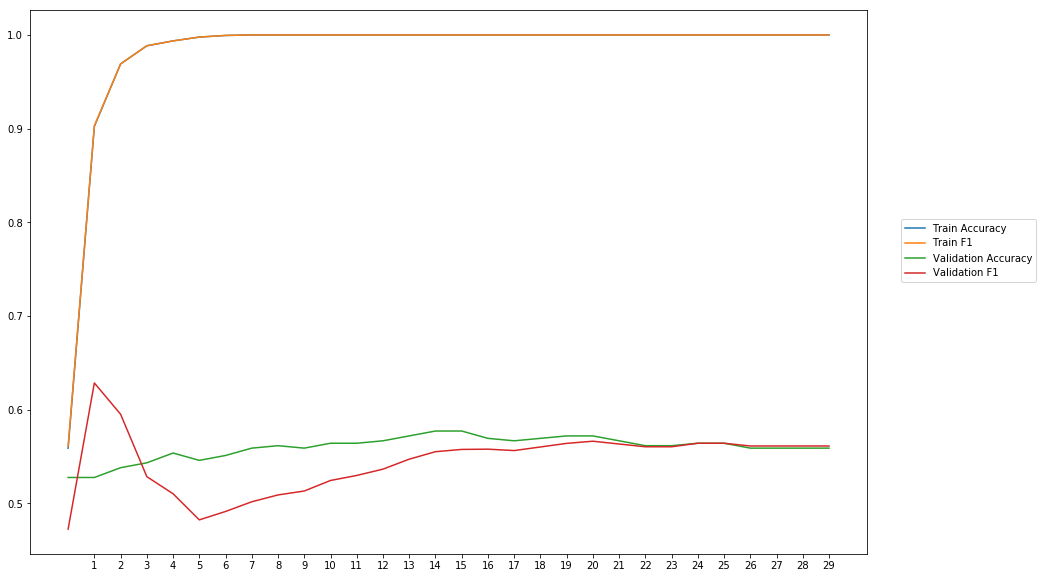

Average Accuracy: 55.95%
Average Precision: 56.31%
Average Recall: 53.32%
Average F1: 54.46%

-----Fold 9--------


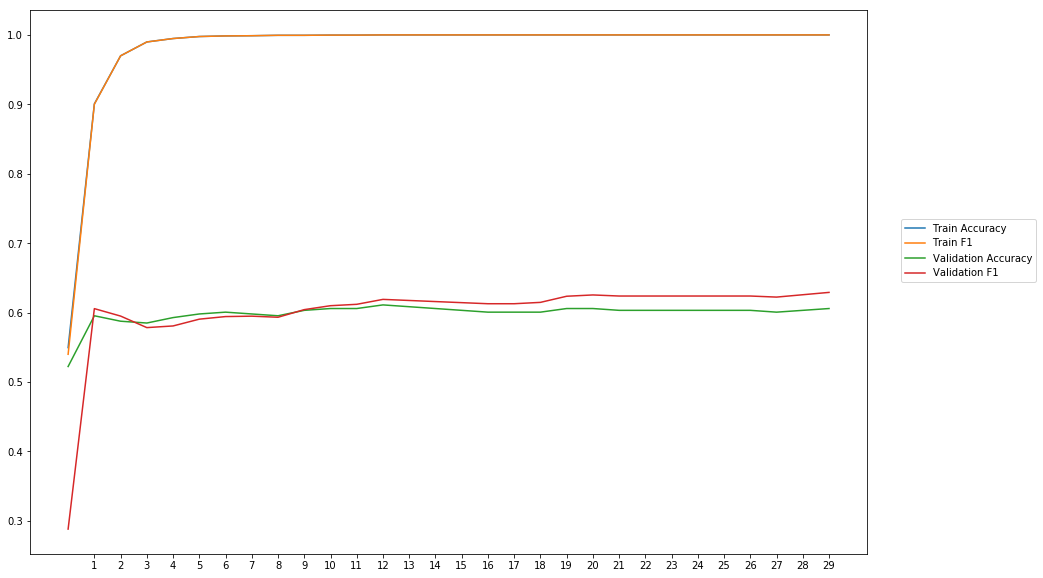

Average Accuracy: 59.86%
Average Precision: 59.35%
Average Recall: 61.55%
Average F1: 60.07%

-----Fold 10--------


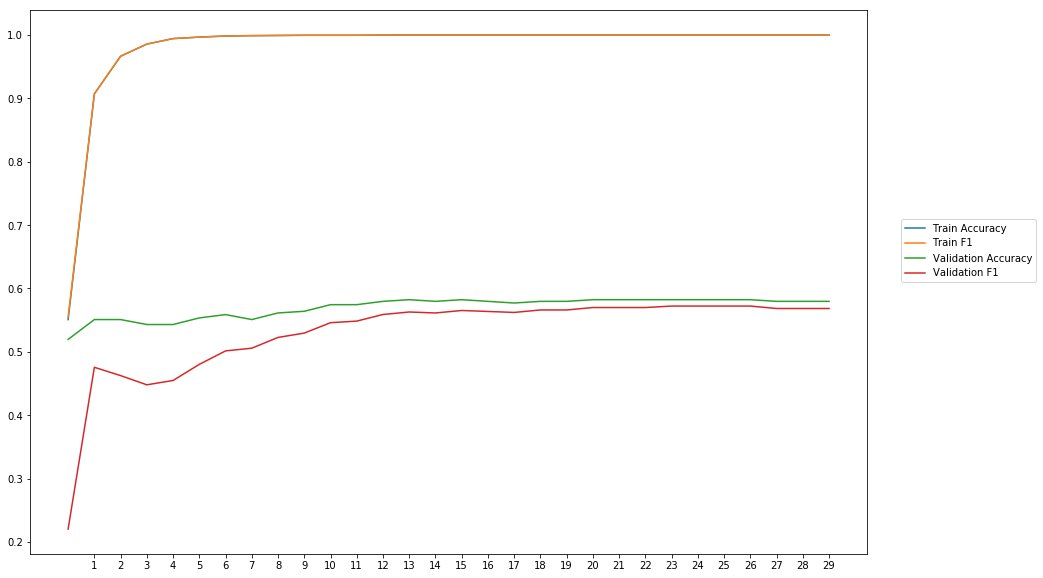

Average Accuracy: 57.00%
Average Precision: 57.95%
Average Recall: 49.76%
Average F1: 53.02%

-------Overallresults-------


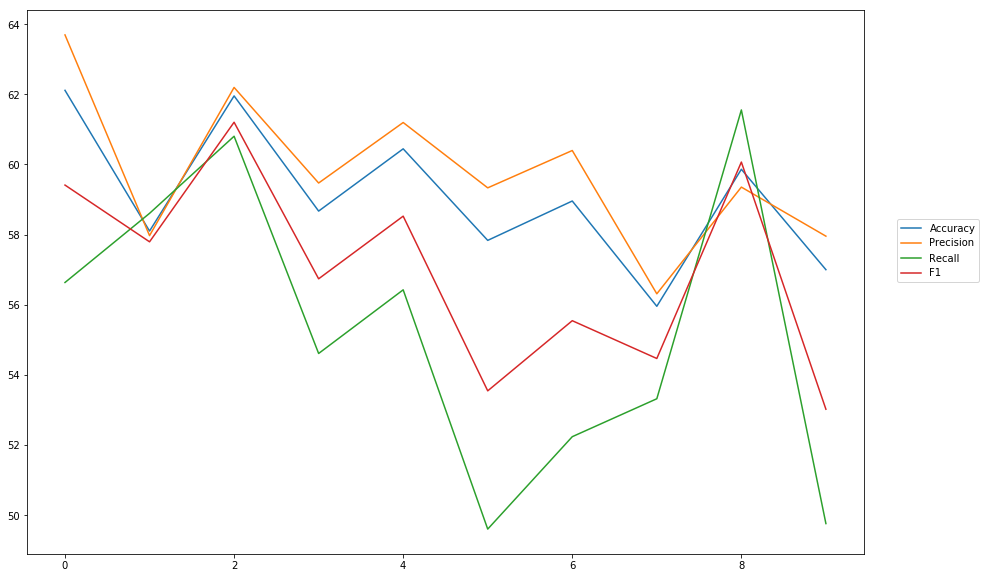

Accuracy: Mean = 59.09% (+/- 1.92%), Max = 62.11%, Min =  55.95%
Precision: Mean = 59.79% (+/- 2.07%), Max = 63.69%, Min =  56.31%
Recall: Mean = 55.35% (+/- 4.00%), Max = 61.55%, Min =  49.60%
F1: Mean = 57.03% (+/- 2.69%), Max = 61.20%, Min =  53.02%


In [48]:
cross_val_three_inputs(model_9, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeHiddenOutAxis1')

# Normalization after hidden layer and output layer, axis =1

In [49]:
#word Embeddings
wv_layer_10 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_10 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_10 = wv_layer_10(input_embedding_10)
x_embedding_10 = Dense(600, activation='relu')(embedded_sequences_10)
x_embedding_10 = BatchNormalization(axis =1)(x_embedding_10)
x_embedding_10 = Flatten()(x_embedding_10)

#Sentiment Features
input_sentiment_10 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_10 = Dense(600, activation='relu')(input_sentiment_10)
x_sentiment_10 = BatchNormalization(axis =1)(x_sentiment_10)

#POS Features
input_pos_10 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_10 = Dense(600, activation='relu')(input_pos_10)
x_pos_10 = BatchNormalization(axis =1)(x_pos_10)

#Concatination
concat_10 = concatenate([x_embedding_10, x_sentiment_10, x_pos_10])
preds_10 = BatchNormalization(axis=1)(concat_10)
preds_10 = Dense(2, activation='softmax')(preds_10)

model_10 = Model(inputs=[input_embedding_10, input_sentiment_10, input_pos_10], outputs=preds_10)


-----Fold 1--------


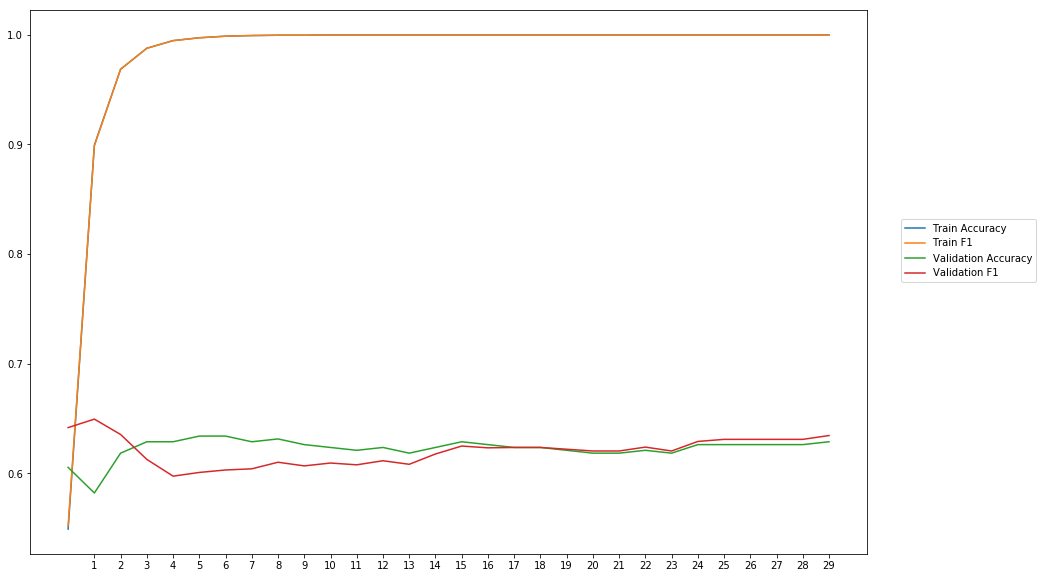

Average Accuracy: 62.27%
Average Precision: 62.44%
Average Recall: 61.87%
Average F1: 62.00%

-----Fold 2--------


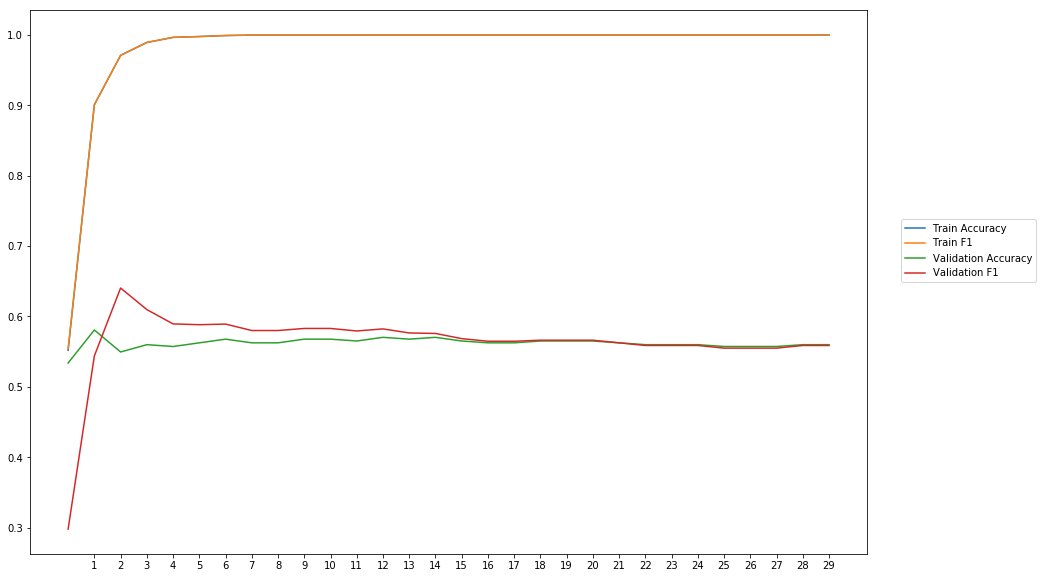

Average Accuracy: 56.22%
Average Precision: 55.93%
Average Recall: 57.87%
Average F1: 56.39%

-----Fold 3--------


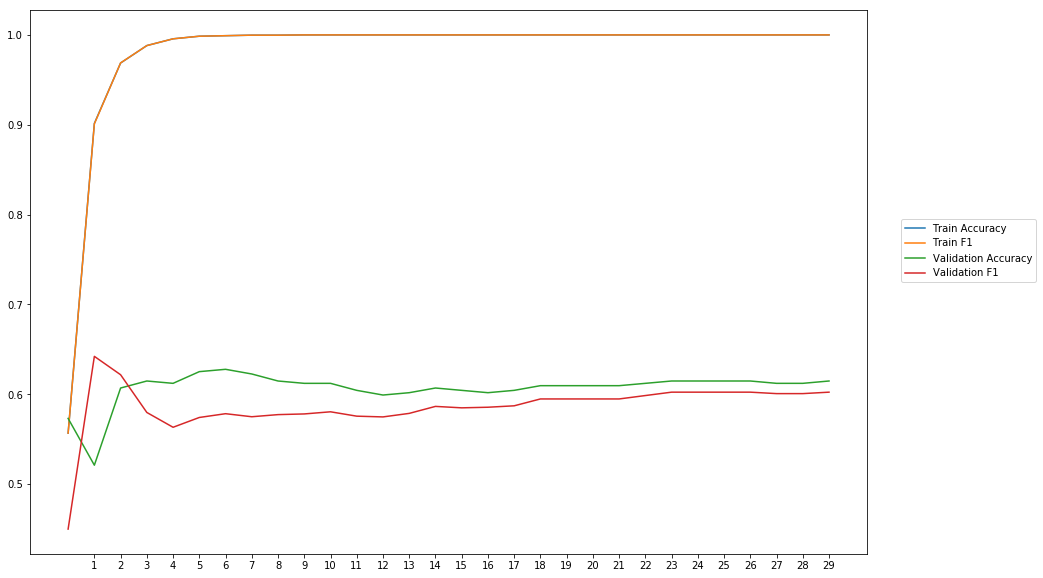

Average Accuracy: 60.69%
Average Precision: 61.84%
Average Recall: 56.37%
Average F1: 58.60%

-----Fold 4--------


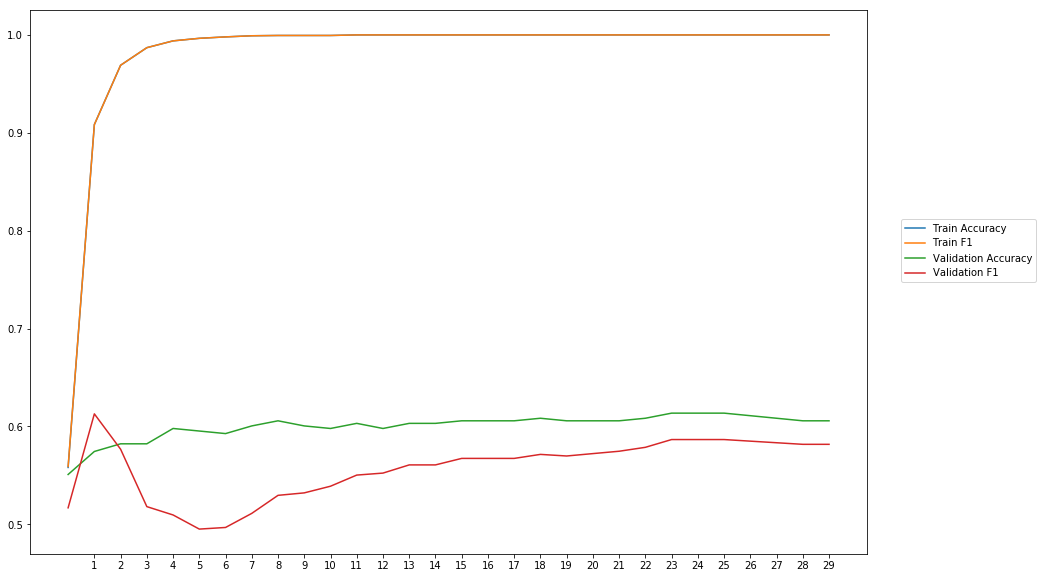

Average Accuracy: 60.03%
Average Precision: 62.40%
Average Recall: 50.80%
Average F1: 55.74%

-----Fold 5--------


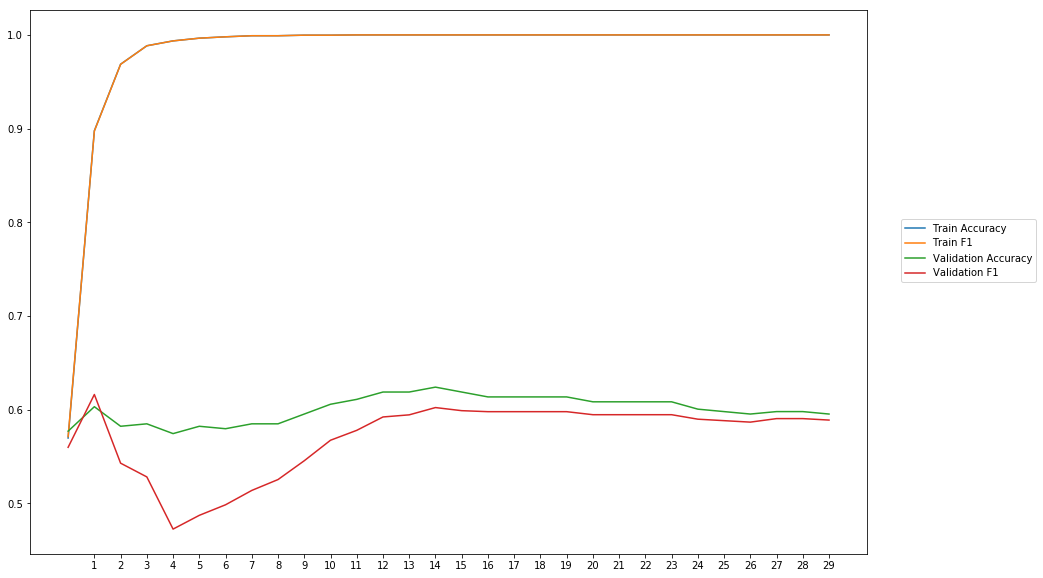

Average Accuracy: 60.06%
Average Precision: 61.44%
Average Recall: 53.72%
Average F1: 57.09%

-----Fold 6--------


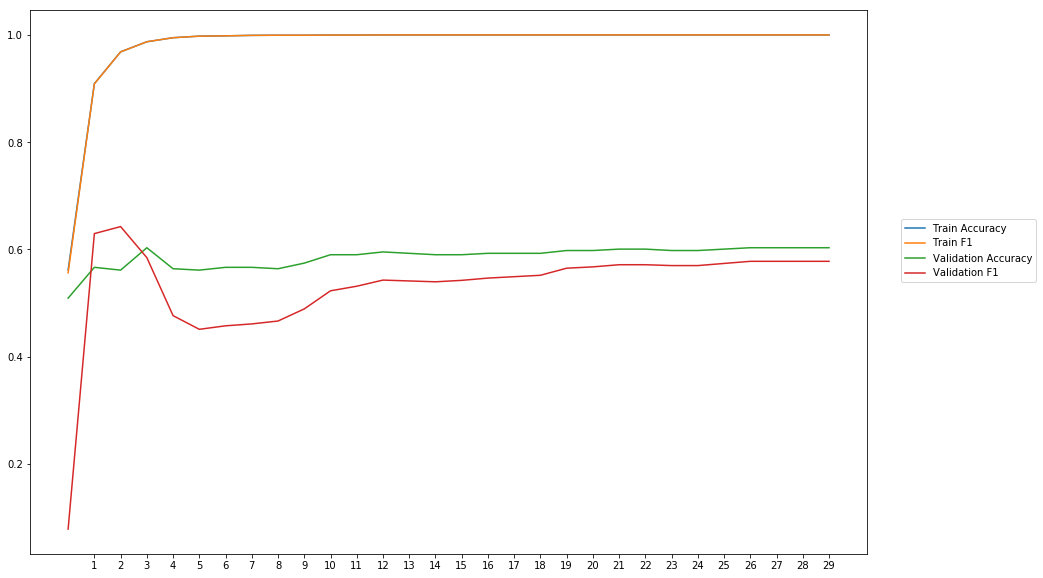

Average Accuracy: 58.56%
Average Precision: 60.76%
Average Recall: 48.88%
Average F1: 53.01%

-----Fold 7--------


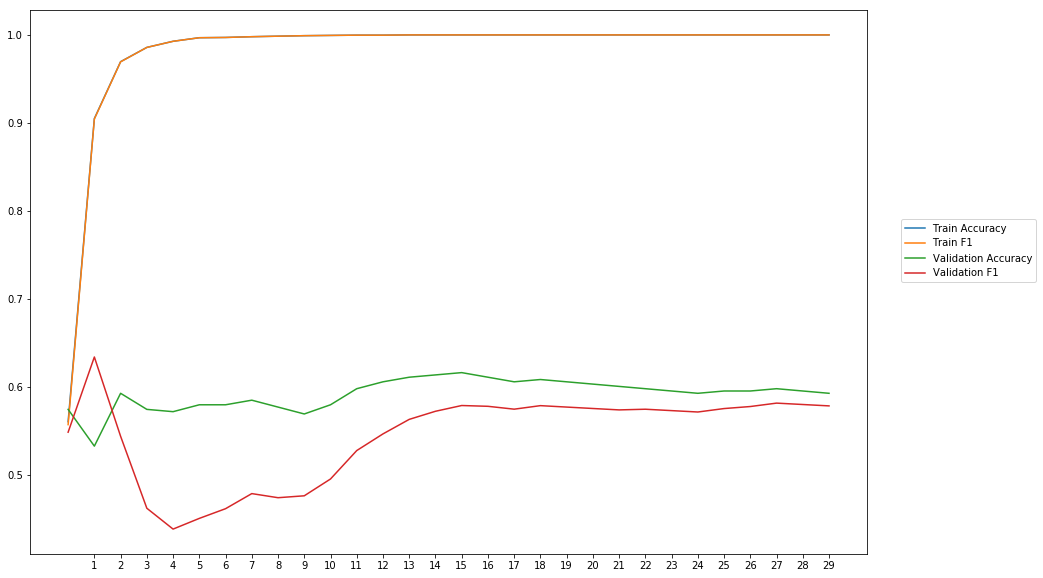

Average Accuracy: 59.19%
Average Precision: 61.65%
Average Recall: 49.72%
Average F1: 54.40%

-----Fold 8--------


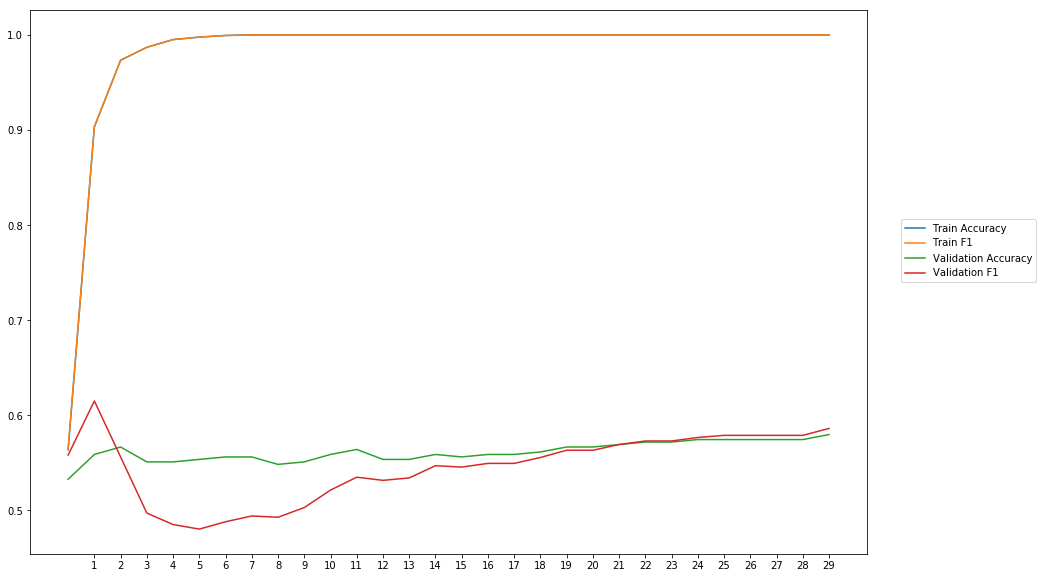

Average Accuracy: 56.15%
Average Precision: 56.46%
Average Recall: 53.16%
Average F1: 54.52%

-----Fold 9--------


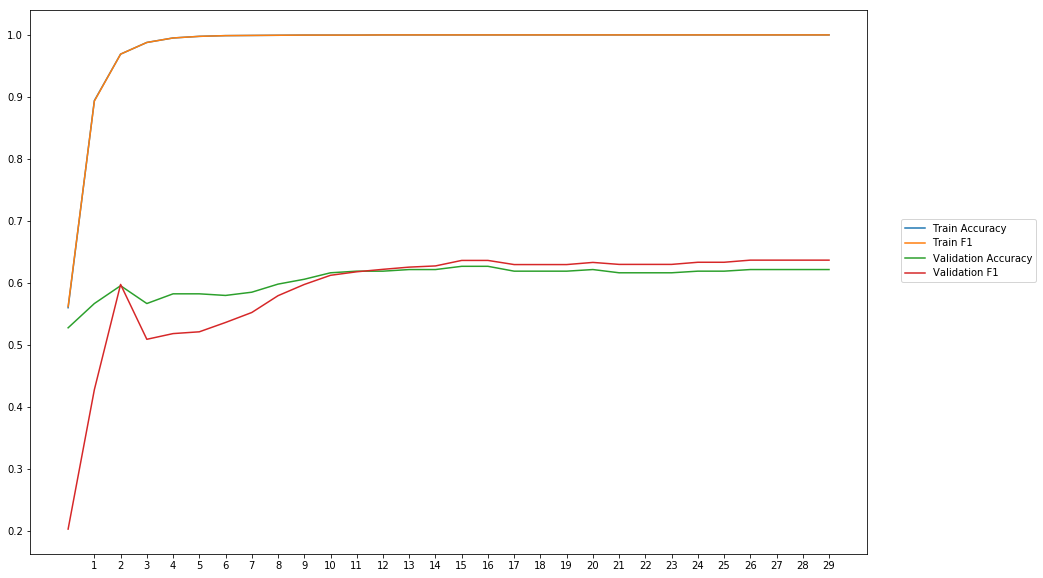

Average Accuracy: 60.63%
Average Precision: 61.05%
Average Recall: 58.41%
Average F1: 58.80%

-----Fold 10--------


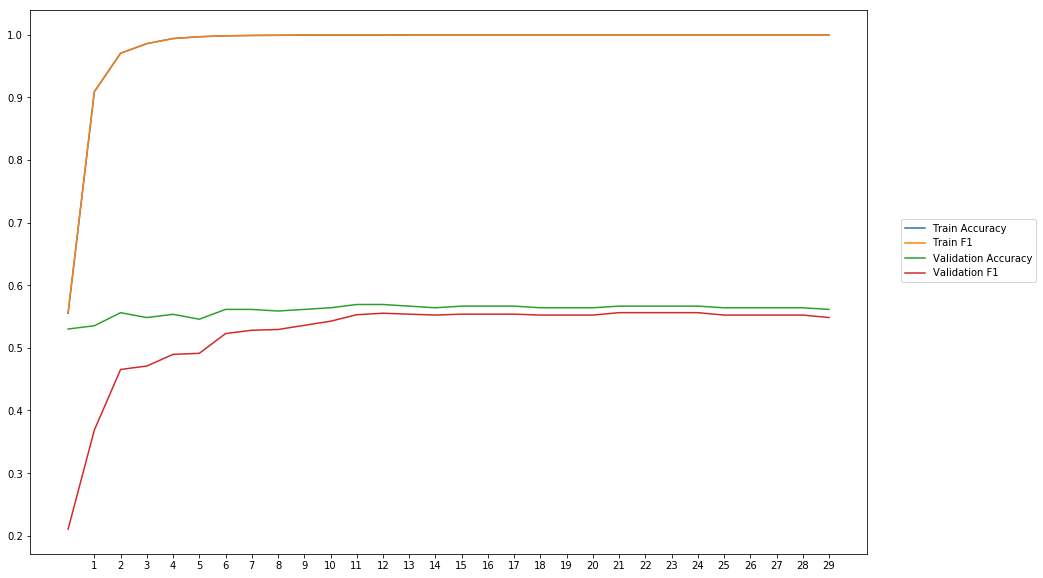

Average Accuracy: 56.07%
Average Precision: 57.08%
Average Recall: 49.37%
Average F1: 52.23%

-------Overallresults-------


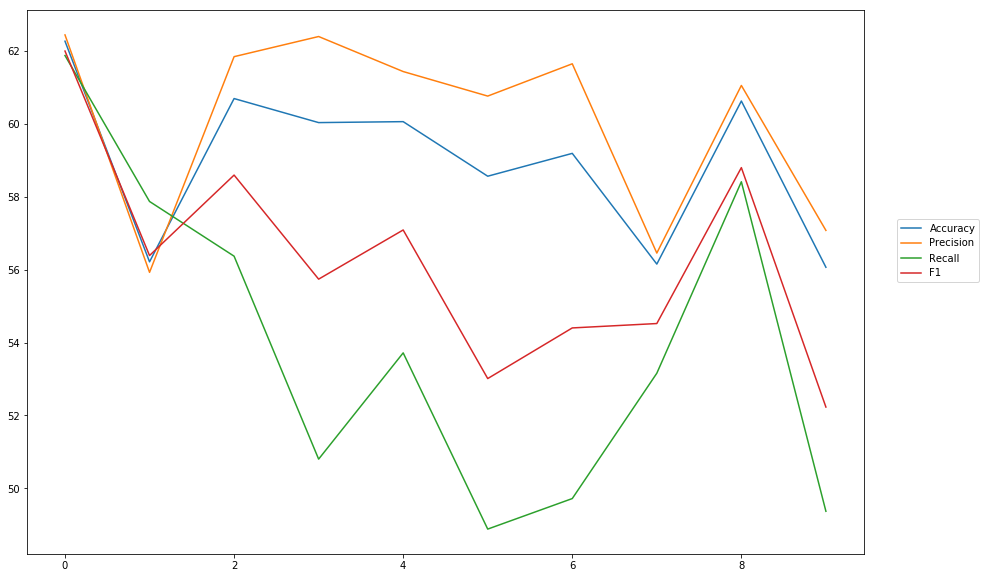

Accuracy: Mean = 58.99% (+/- 2.08%), Max = 62.27%, Min =  56.07%
Precision: Mean = 60.10% (+/- 2.43%), Max = 62.44%, Min =  55.93%
Recall: Mean = 54.02% (+/- 4.23%), Max = 61.87%, Min =  48.88%
F1: Mean = 56.28% (+/- 2.81%), Max = 62.00%, Min =  52.23%


In [50]:
cross_val_three_inputs(model_10, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationAfterHiddenOutAxis1')

# Before and after hidden layer and output layer, axis =1

In [19]:
#Word Embeddings
wv_layer_11 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_11 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_11 = wv_layer_11(input_embedding_11)
x_embedding_11 = BatchNormalization(axis =1)(embedded_sequences_11)
x_embedding_11 = Dense(600, activation='relu')(x_embedding_11)
x_embedding_11 = BatchNormalization(axis =1)(x_embedding_11)
x_embedding_11 = Flatten()(x_embedding_11)

#Sentiment Features
input_sentiment_11 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_11 = BatchNormalization(axis =1)(input_sentiment_11)
x_sentiment_11 = Dense(600, activation='relu')(x_sentiment_11)
x_sentiment_11 = BatchNormalization(axis =1)(x_sentiment_11)

#POS Features
input_pos_11 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_11 = BatchNormalization(axis =1) (input_pos_11)
x_pos_11 = Dense(600, activation='relu')(x_pos_11)
x_pos_11 = BatchNormalization(axis =1)(x_pos_11)

#Concatination
concat_11 = concatenate([x_embedding_11, x_sentiment_11, x_pos_11])
preds_11 = BatchNormalization(axis=1)(concat_11)
preds_11 = Dense(2, activation='softmax')(preds_11)

model_11 = Model(inputs=[input_embedding_11, input_sentiment_11, input_pos_11], outputs=preds_11)


-----Fold 1--------


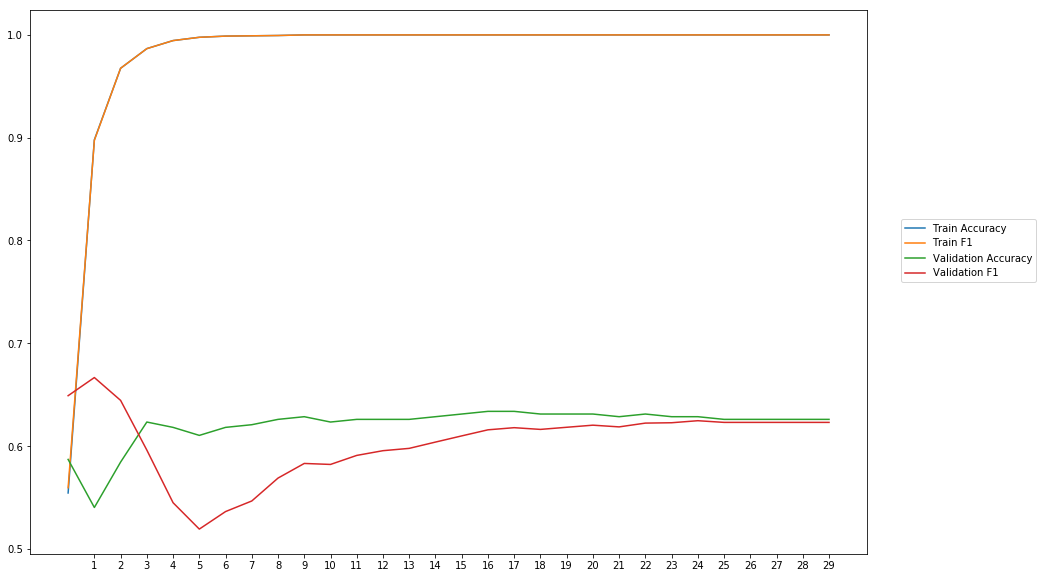

Average Accuracy: 62.09%
Average Precision: 63.58%
Average Recall: 58.82%
Average F1: 60.42%

-----Fold 2--------


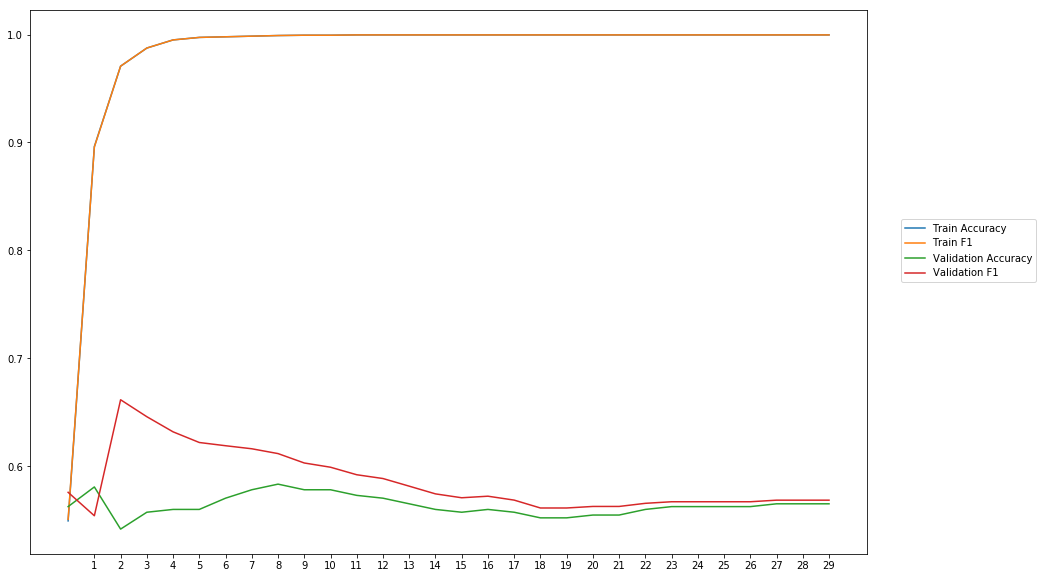

Average Accuracy: 56.37%
Average Precision: 55.57%
Average Recall: 62.55%
Average F1: 58.58%

-----Fold 3--------


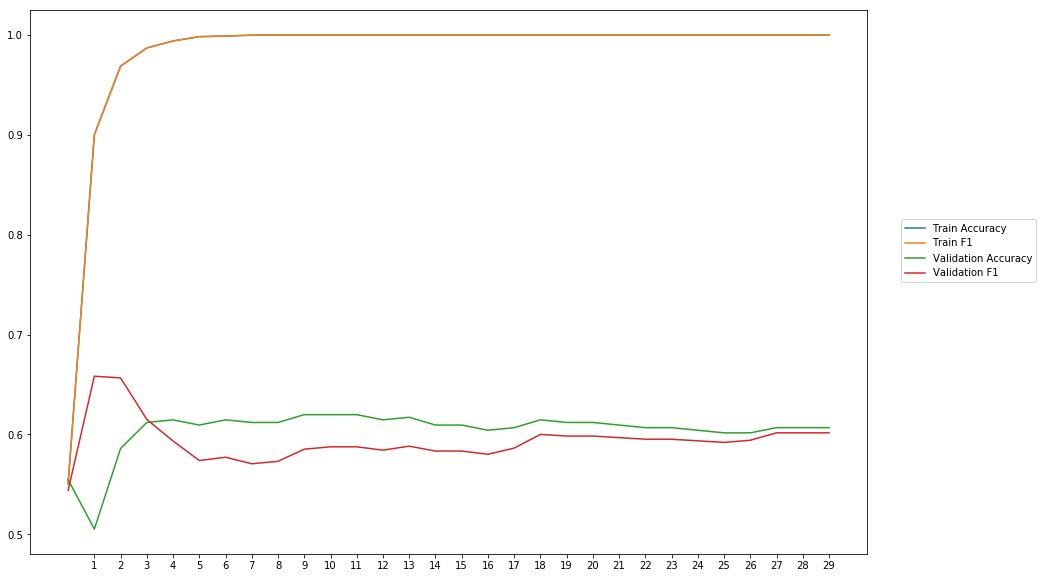

Average Accuracy: 60.43%
Average Precision: 61.15%
Average Recall: 58.45%
Average F1: 59.32%

-----Fold 4--------


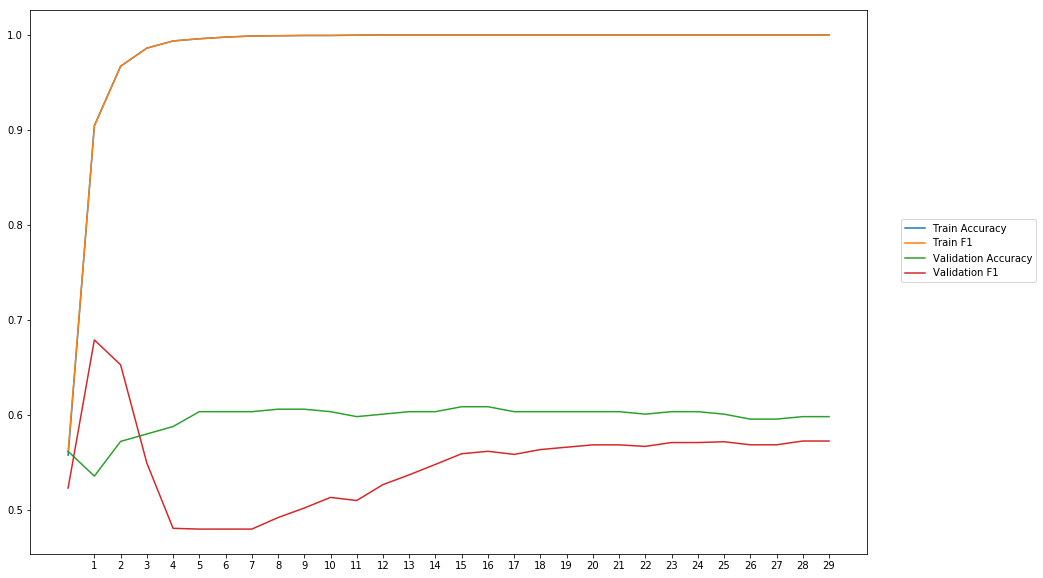

Average Accuracy: 59.63%
Average Precision: 62.82%
Average Recall: 50.38%
Average F1: 54.84%

-----Fold 5--------


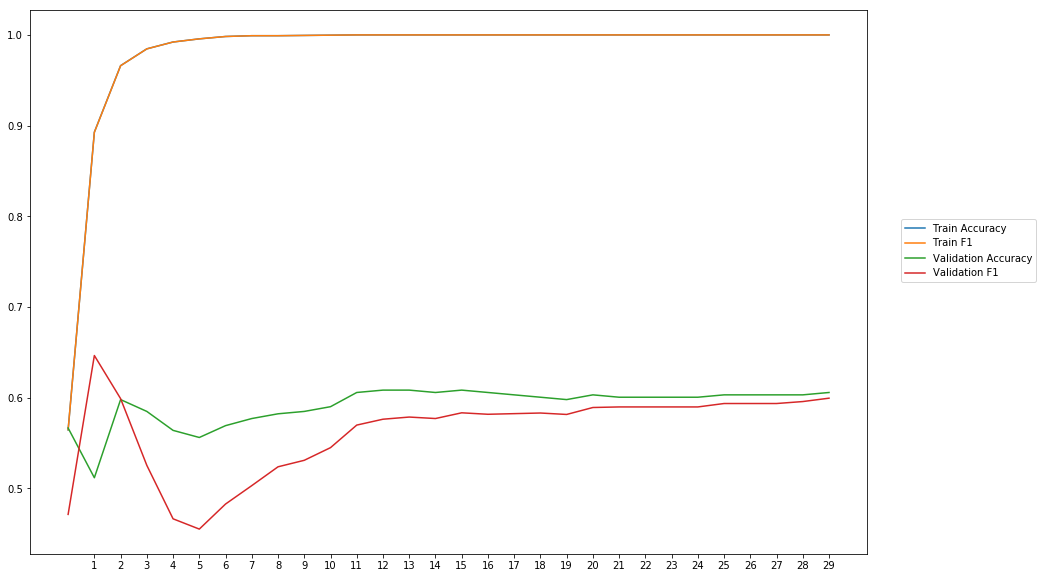

Average Accuracy: 59.17%
Average Precision: 60.51%
Average Recall: 53.54%
Average F1: 56.29%

-----Fold 6--------


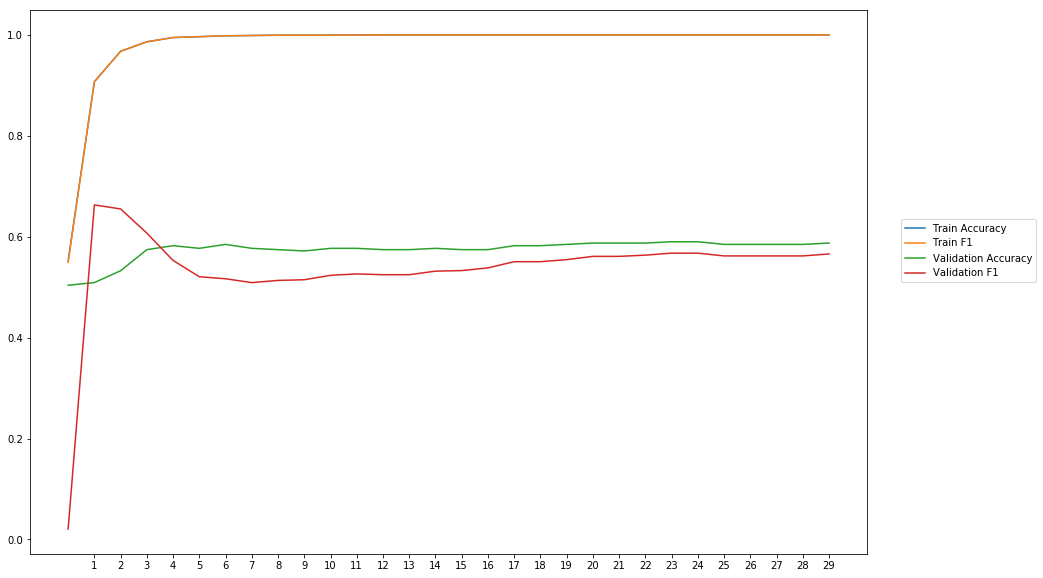

Average Accuracy: 57.45%
Average Precision: 59.13%
Average Recall: 51.78%
Average F1: 53.56%

-----Fold 7--------


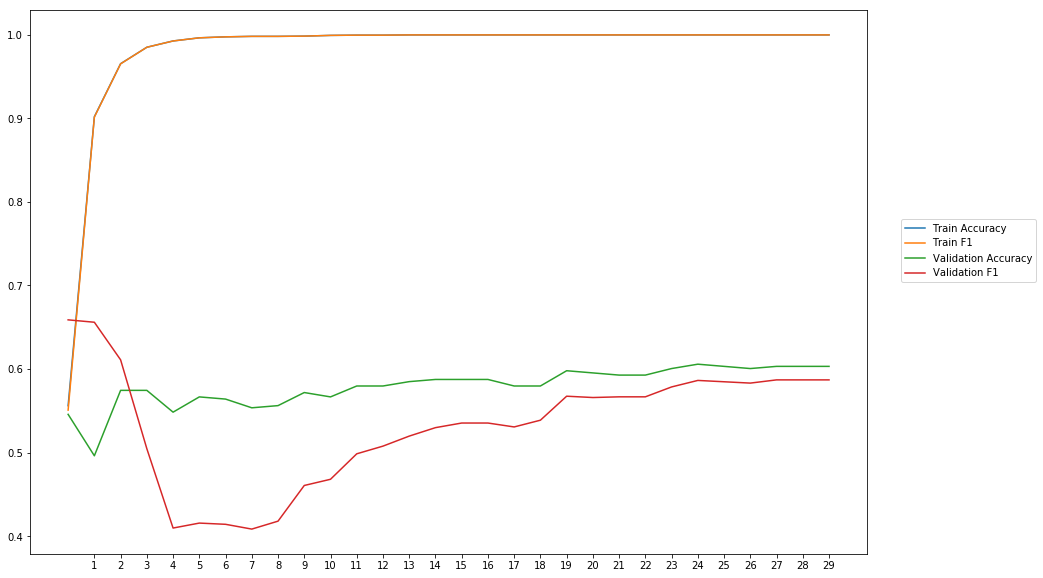

Average Accuracy: 57.94%
Average Precision: 60.13%
Average Recall: 50.00%
Average F1: 53.26%

-----Fold 8--------


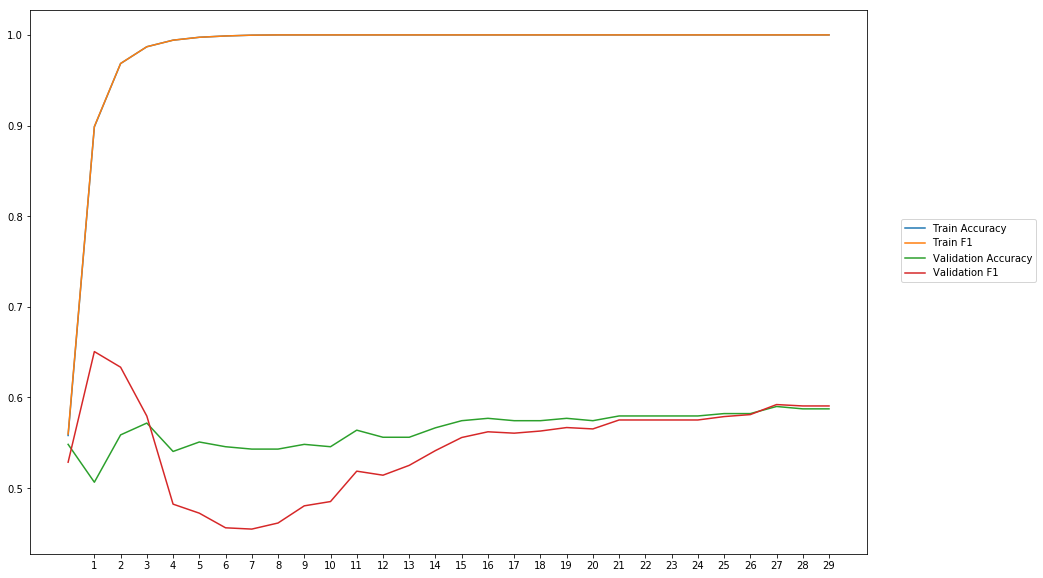

Average Accuracy: 56.48%
Average Precision: 56.93%
Average Recall: 53.61%
Average F1: 54.64%

-----Fold 9--------


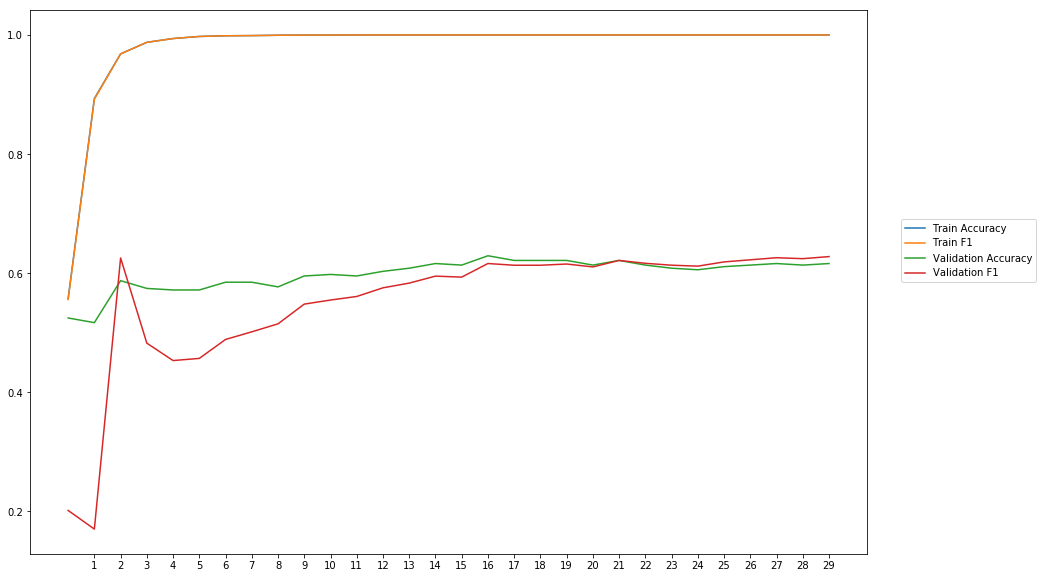

Average Accuracy: 59.83%
Average Precision: 61.46%
Average Recall: 52.48%
Average F1: 55.20%

-----Fold 10--------


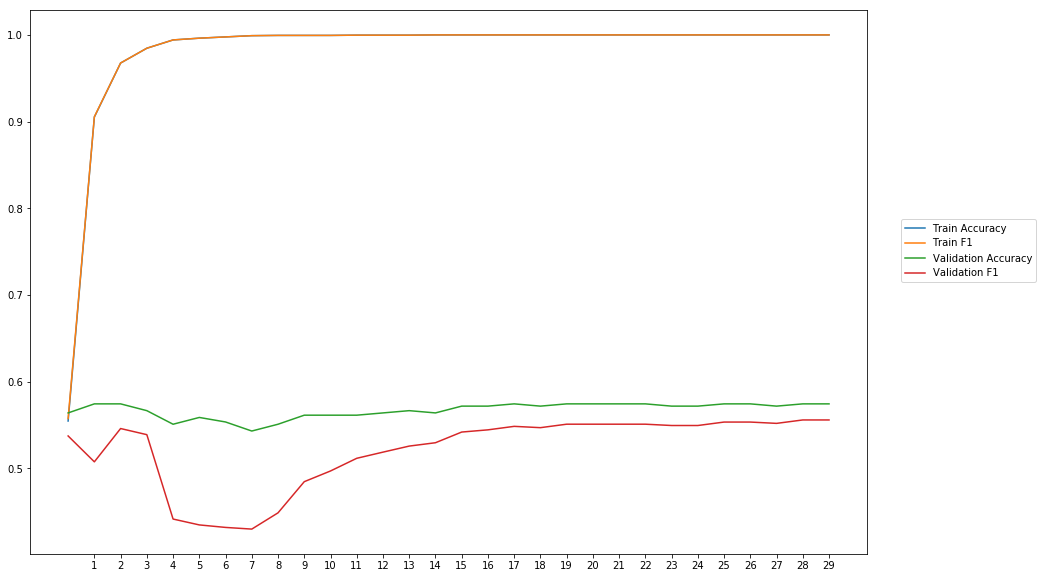

Average Accuracy: 56.72%
Average Precision: 58.07%
Average Recall: 47.75%
Average F1: 52.13%

-------Overallresults-------


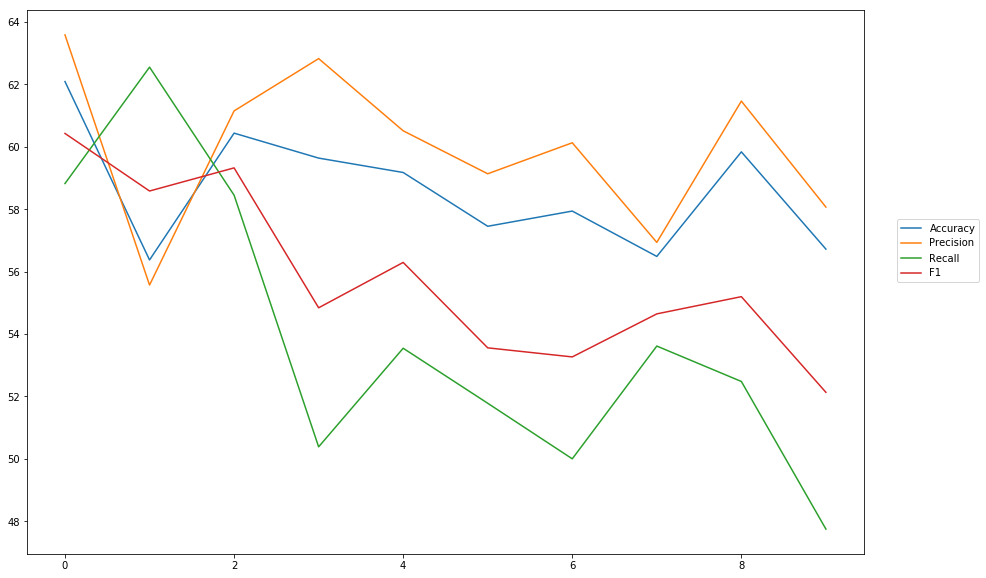

Accuracy: Mean = 58.61% (+/- 1.82%), Max = 62.09%, Min =  56.37%
Precision: Mean = 59.93% (+/- 2.41%), Max = 63.58%, Min =  55.57%
Recall: Mean = 53.94% (+/- 4.38%), Max = 62.55%, Min =  47.75%
F1: Mean = 55.82% (+/- 2.63%), Max = 60.42%, Min =  52.13%


In [52]:
cross_val_three_inputs(model_11, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeAfterHiddenOutAxis1')

# Normalization before hidden layer and output layer

In [53]:
#Word Embeddings
wv_layer_12 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_12 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_12 = wv_layer_12(input_embedding_12)
x_embedding_12 = BatchNormalization()(embedded_sequences_12)
x_embedding_12 = Dense(600, activation='relu', use_bias = False)(x_embedding_12)
x_embedding_12 = Flatten()(x_embedding_12)

#Sentiment Features
input_sentiment_12 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_12 = BatchNormalization()(input_sentiment_12)
x_sentiment_12 = Dense(600, activation='relu', use_bias = False)(x_sentiment_12)

#POS Features
input_pos_12 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_12 = BatchNormalization()(input_pos_12)
x_pos_12 = Dense(600, activation='relu', use_bias = False)(x_pos_12)

#Concatination
concat_12 = concatenate([x_embedding_12, x_sentiment_12, x_pos_12])
preds_12 = BatchNormalization()(concat_12)
preds_12 = Dense(2, activation='softmax')(preds_12)

model_12 = Model(inputs=[input_embedding_12, input_sentiment_12, input_pos_12], outputs=preds_12)


-----Fold 1--------


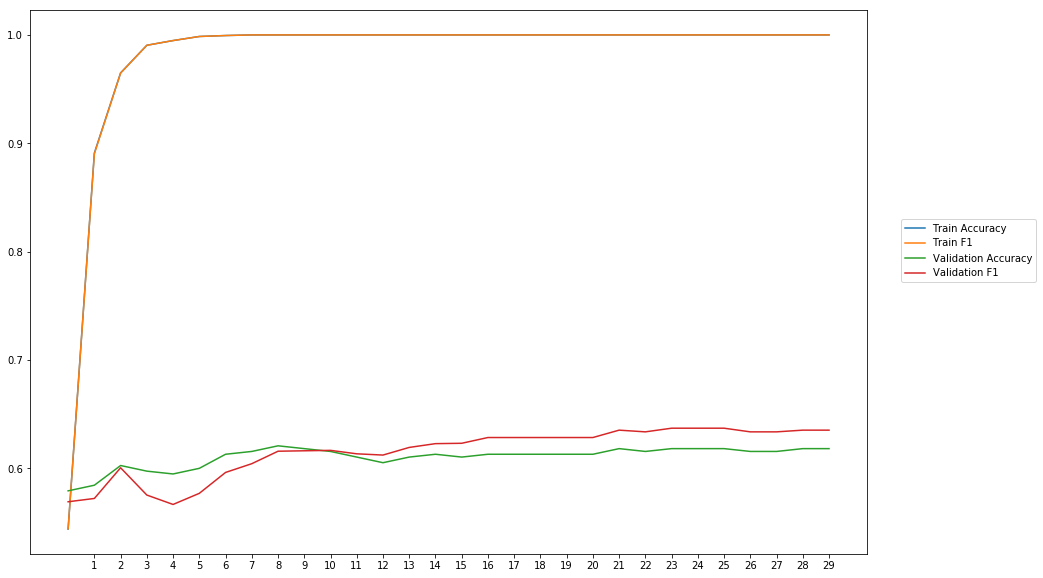

Average Accuracy: 61.04%
Average Precision: 60.58%
Average Recall: 62.69%
Average F1: 61.54%

-----Fold 2--------


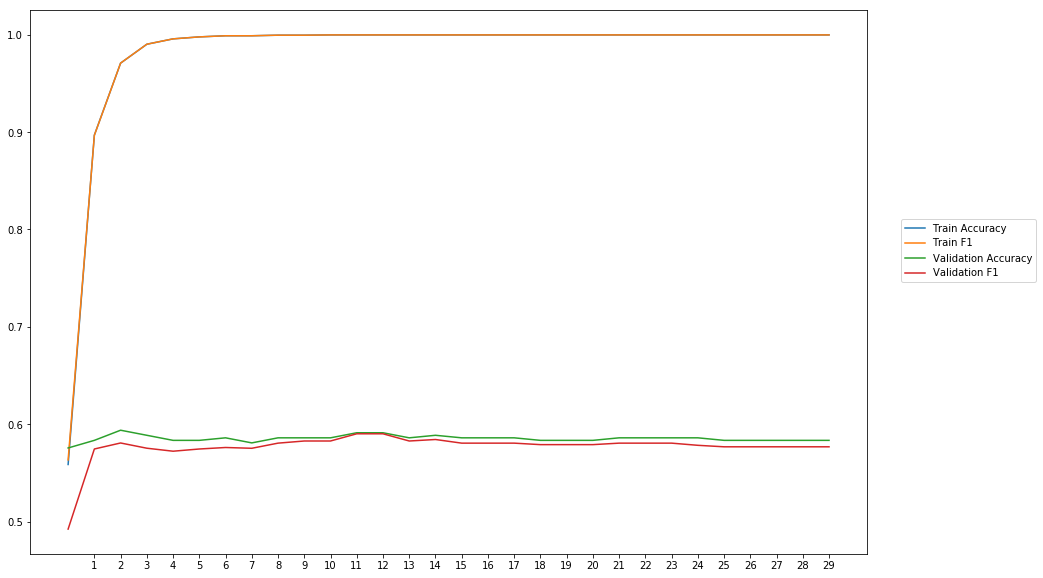

Average Accuracy: 58.52%
Average Precision: 58.58%
Average Recall: 56.86%
Average F1: 57.65%

-----Fold 3--------


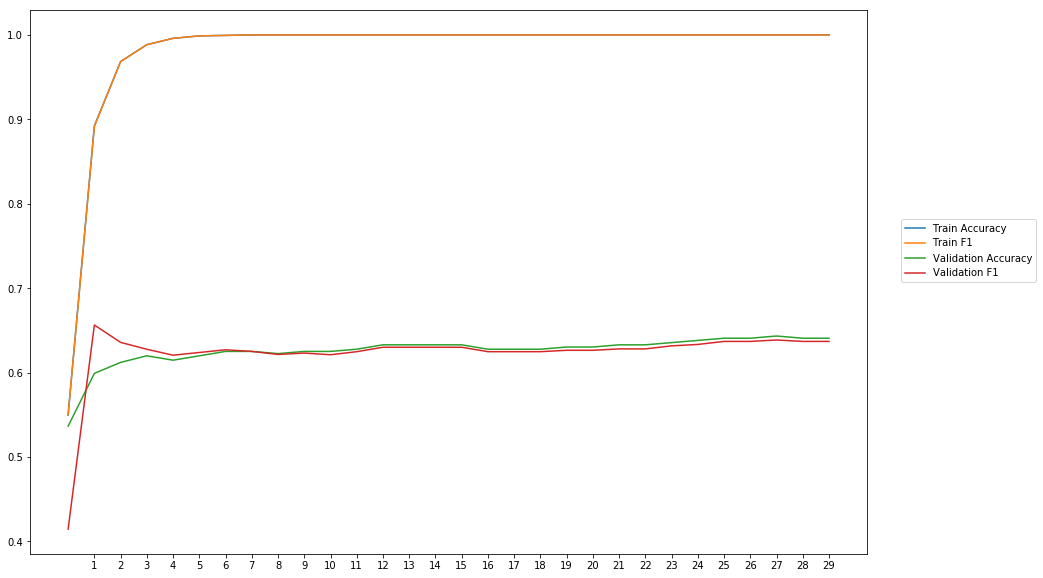

Average Accuracy: 62.57%
Average Precision: 62.35%
Average Recall: 62.46%
Average F1: 62.24%

-----Fold 4--------


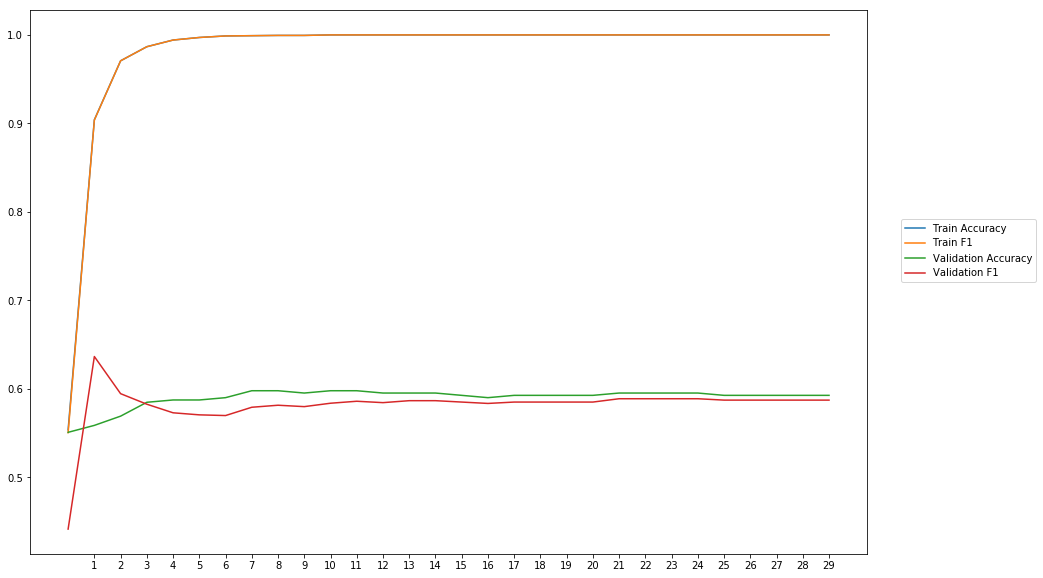

Average Accuracy: 59.00%
Average Precision: 59.27%
Average Recall: 57.38%
Average F1: 58.13%

-----Fold 5--------


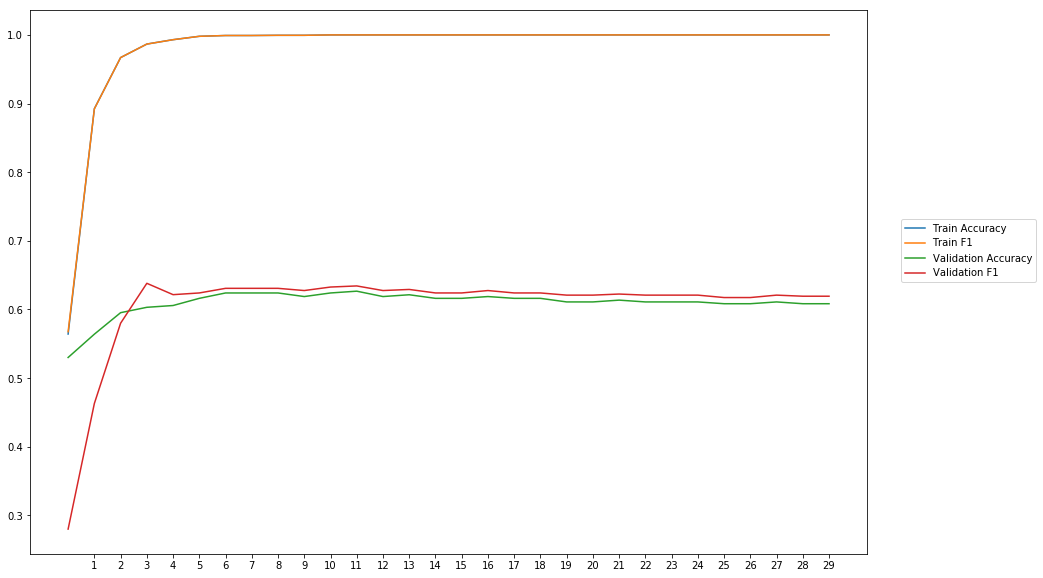

Average Accuracy: 60.97%
Average Precision: 60.68%
Average Recall: 61.62%
Average F1: 60.65%

-----Fold 6--------


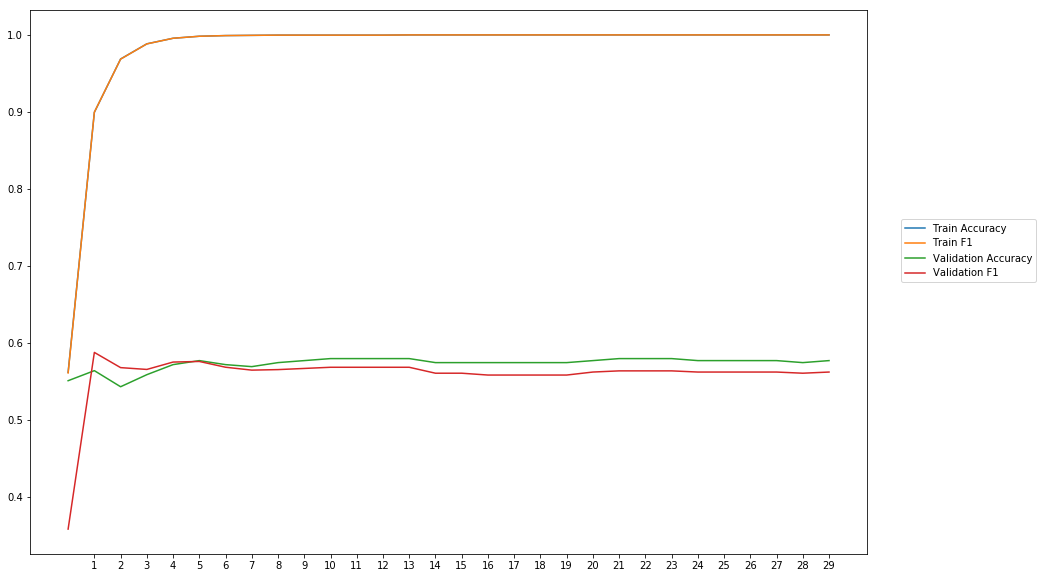

Average Accuracy: 57.33%
Average Precision: 57.77%
Average Recall: 54.52%
Average F1: 55.83%

-----Fold 7--------


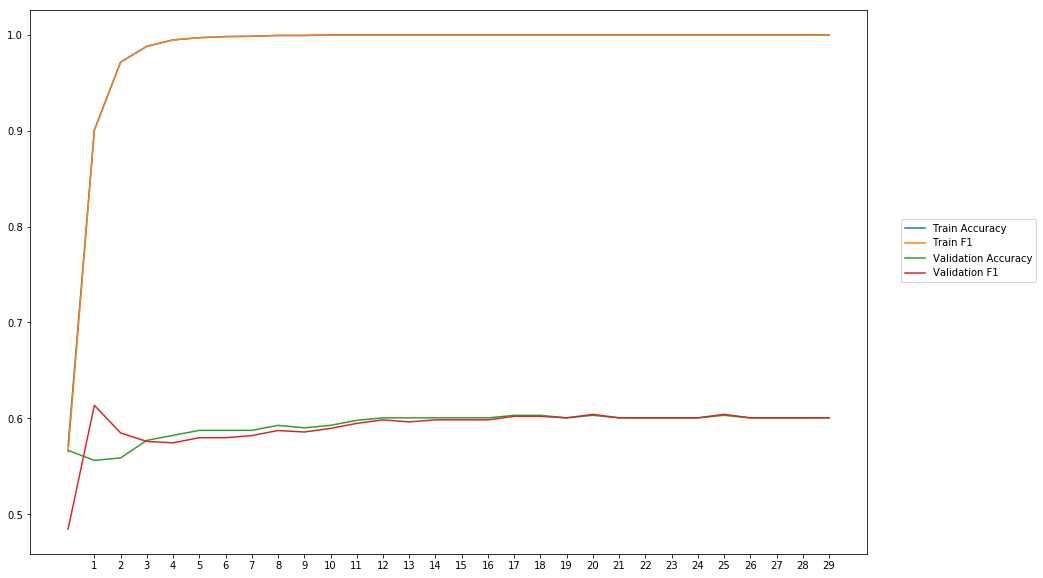

Average Accuracy: 59.32%
Average Precision: 59.29%
Average Recall: 59.18%
Average F1: 59.13%

-----Fold 8--------


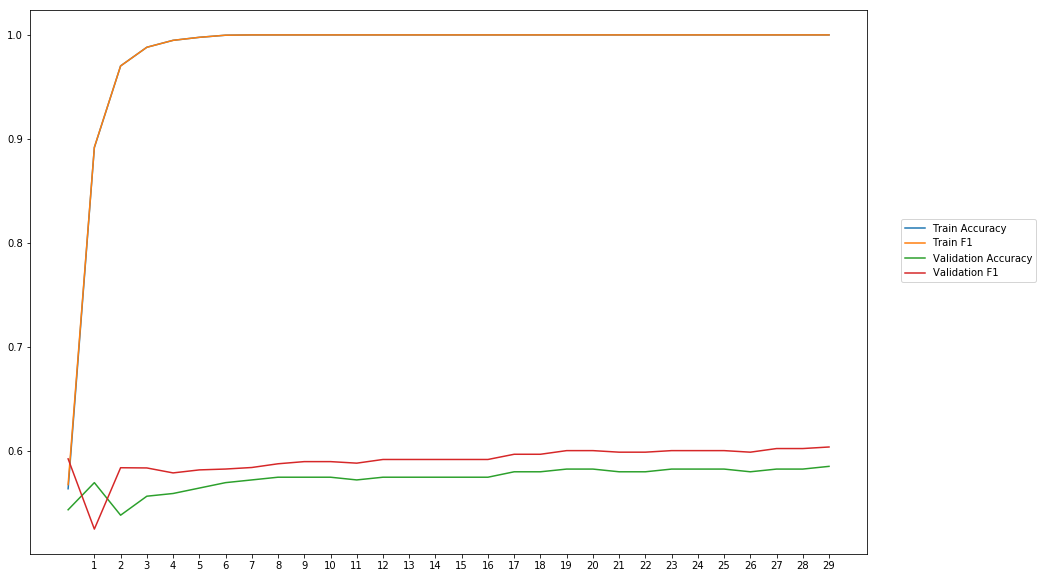

Average Accuracy: 57.32%
Average Precision: 56.65%
Average Recall: 61.80%
Average F1: 59.06%

-----Fold 9--------


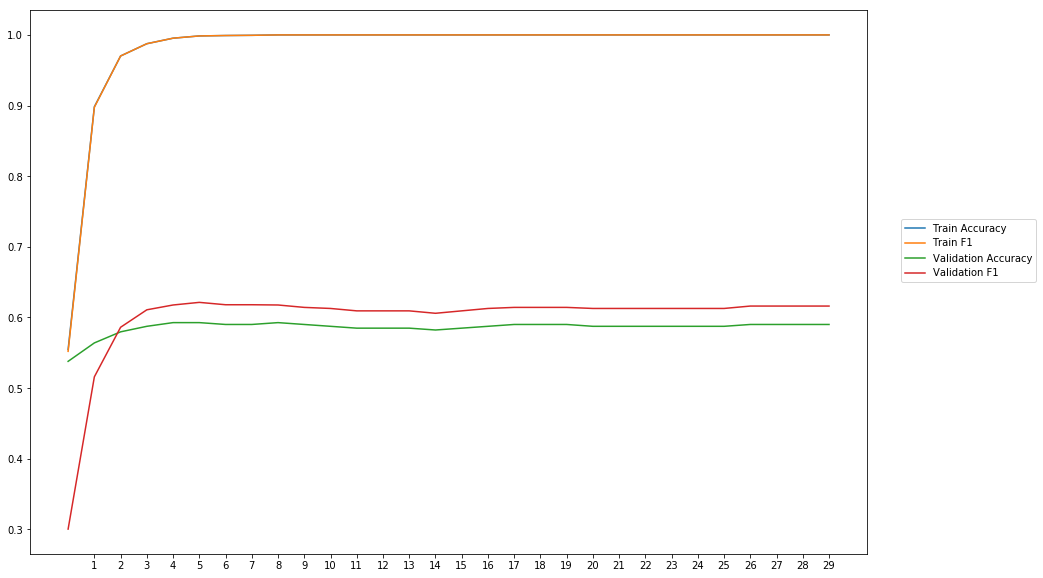

Average Accuracy: 58.56%
Average Precision: 57.81%
Average Recall: 63.21%
Average F1: 59.91%

-----Fold 10--------


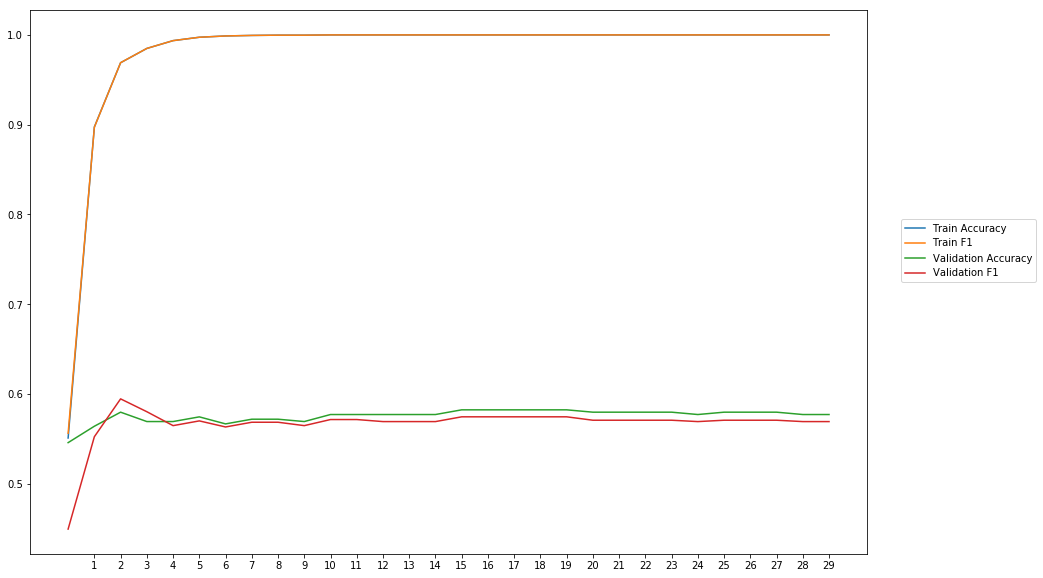

Average Accuracy: 57.55%
Average Precision: 57.69%
Average Recall: 55.81%
Average F1: 56.67%

-------Overallresults-------


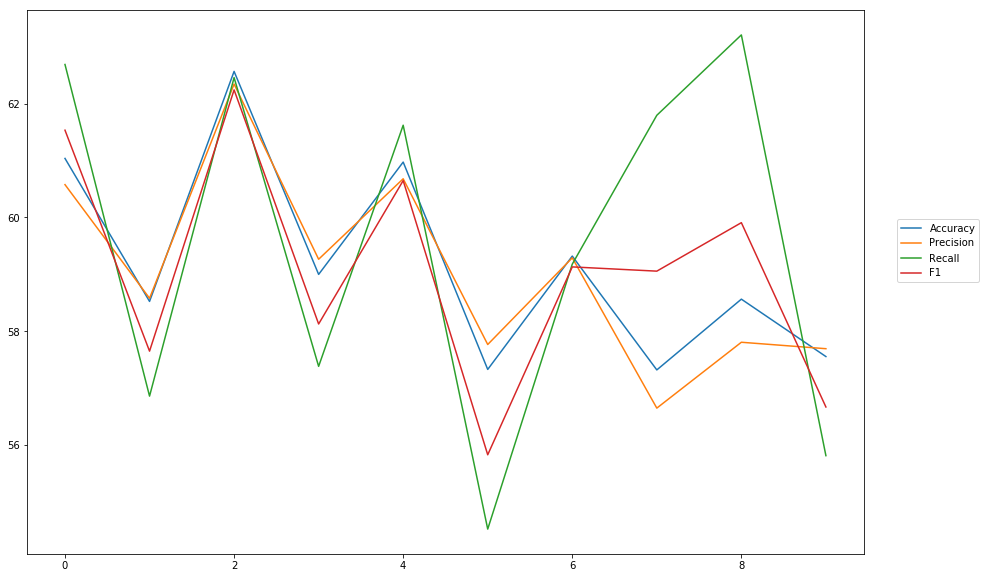

Accuracy: Mean = 59.22% (+/- 1.69%), Max = 62.57%, Min =  57.32%
Precision: Mean = 59.07% (+/- 1.64%), Max = 62.35%, Min =  56.65%
Recall: Mean = 59.55% (+/- 3.04%), Max = 63.21%, Min =  54.52%
F1: Mean = 59.08% (+/- 1.96%), Max = 62.24%, Min =  55.83%


In [54]:
cross_val_three_inputs(model_12, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeHiddenOut')

# Normalization after hidden layer and output layer, axis =1

In [56]:
#word Embeddings
wv_layer_13 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_13 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_13 = wv_layer_13(input_embedding_13)
x_embedding_13 = Dense(600, activation='relu')(embedded_sequences_13)
x_embedding_13 = BatchNormalization()(x_embedding_13)
x_embedding_13 = Flatten()(x_embedding_13)

#Sentiment Features
input_sentiment_13 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_13 = Dense(600, activation='relu')(input_sentiment_13)
x_sentiment_13 = BatchNormalization()(x_sentiment_13)

#POS Features
input_pos_13 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_13 = Dense(600, activation='relu')(input_pos_13)
x_pos_13 = BatchNormalization()(x_pos_13)

#Concatination
concat_13 = concatenate([x_embedding_13, x_sentiment_13, x_pos_13])
preds_13 = BatchNormalization(axis=1)(concat_13)
preds_13 = Dense(2, activation='softmax')(preds_13)

model_13 = Model(inputs=[input_embedding_13, input_sentiment_13, input_pos_13], outputs=preds_13)


-----Fold 1--------


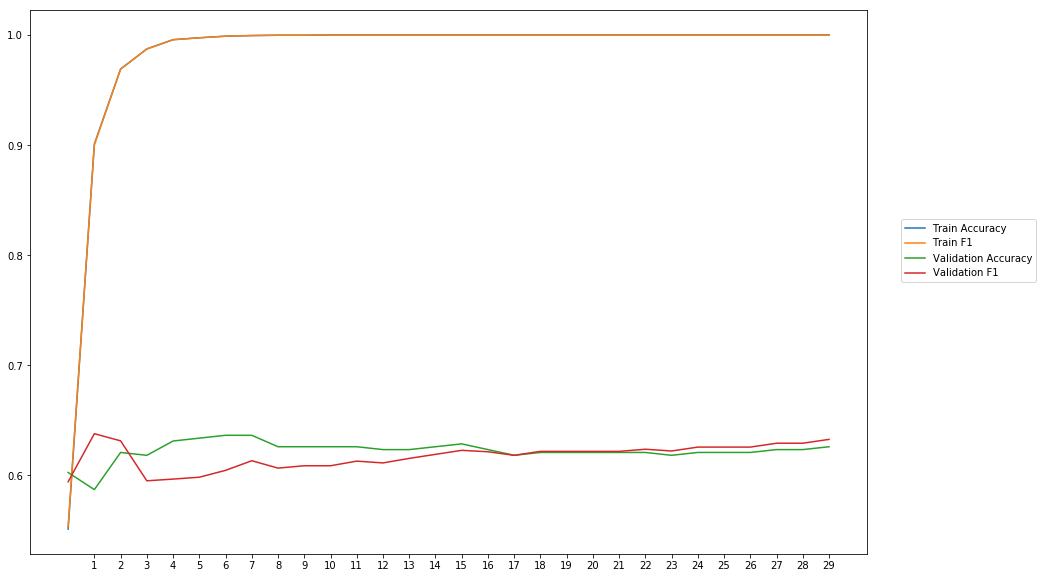

Average Accuracy: 62.23%
Average Precision: 62.53%
Average Recall: 61.16%
Average F1: 61.72%

-----Fold 2--------


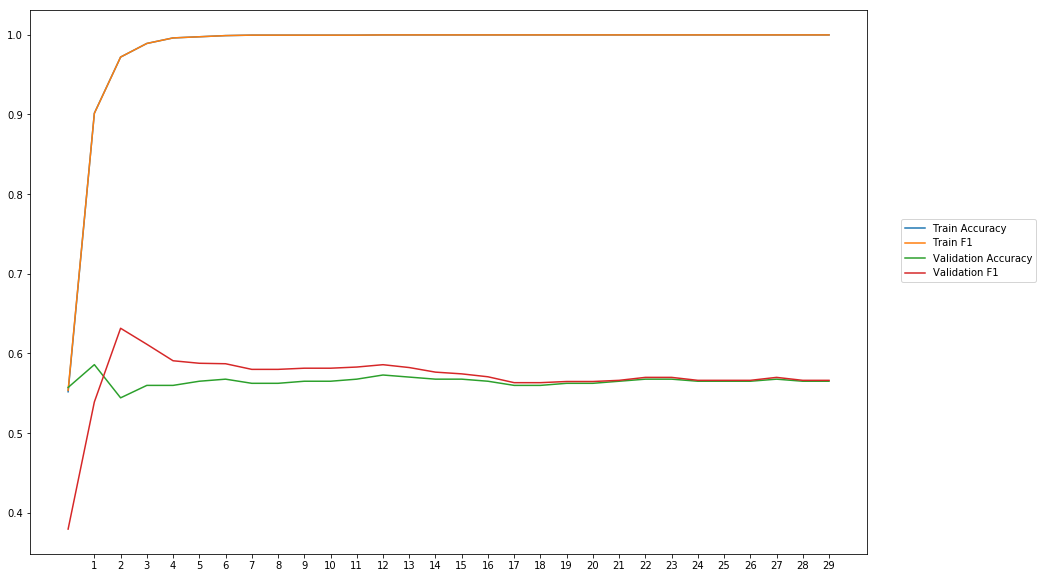

Average Accuracy: 56.48%
Average Precision: 56.21%
Average Recall: 58.53%
Average F1: 56.95%

-----Fold 3--------


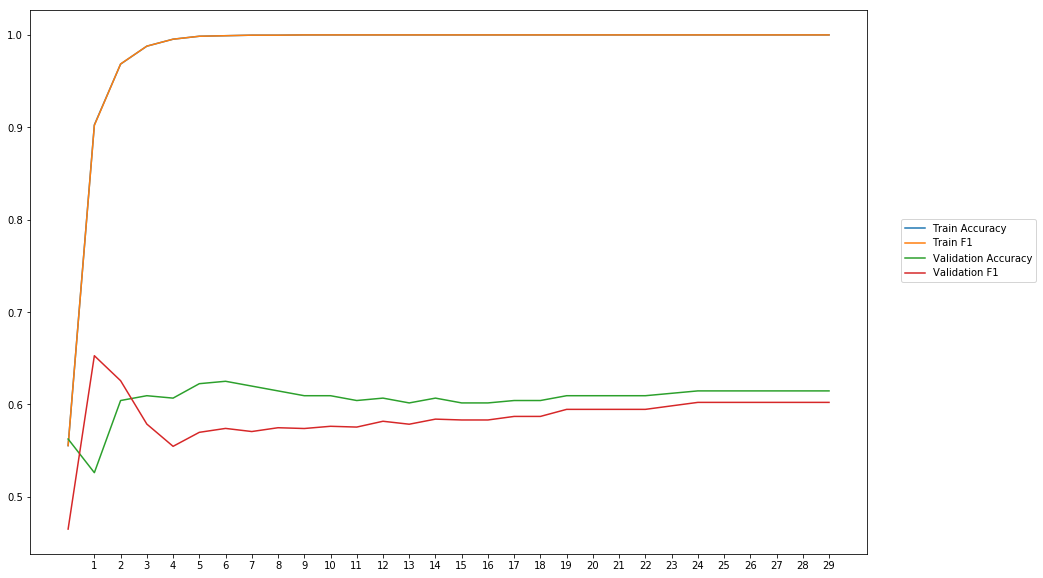

Average Accuracy: 60.59%
Average Precision: 61.67%
Average Recall: 56.42%
Average F1: 58.55%

-----Fold 4--------


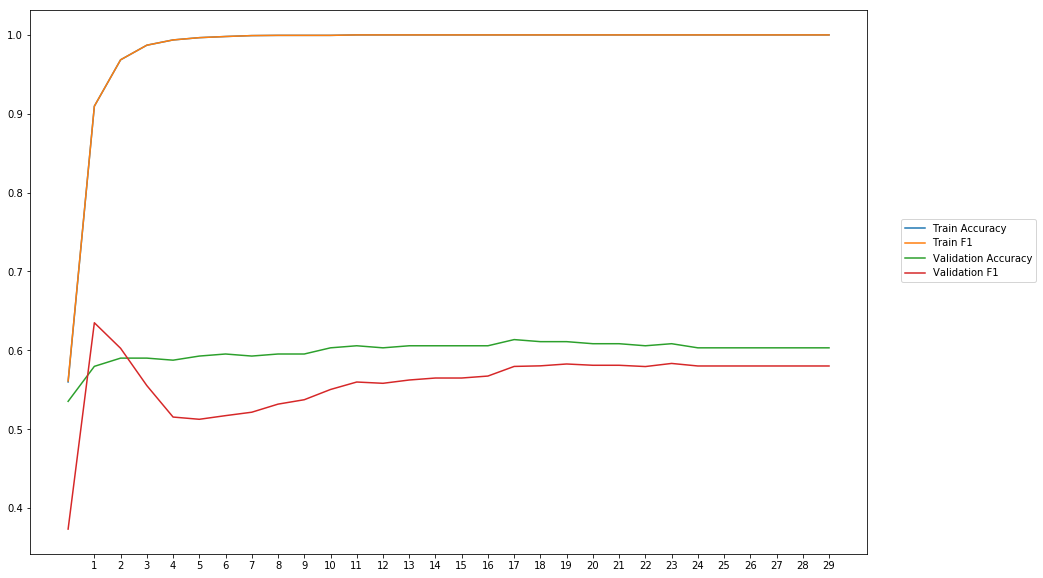

Average Accuracy: 59.91%
Average Precision: 61.87%
Average Recall: 51.57%
Average F1: 55.92%

-----Fold 5--------


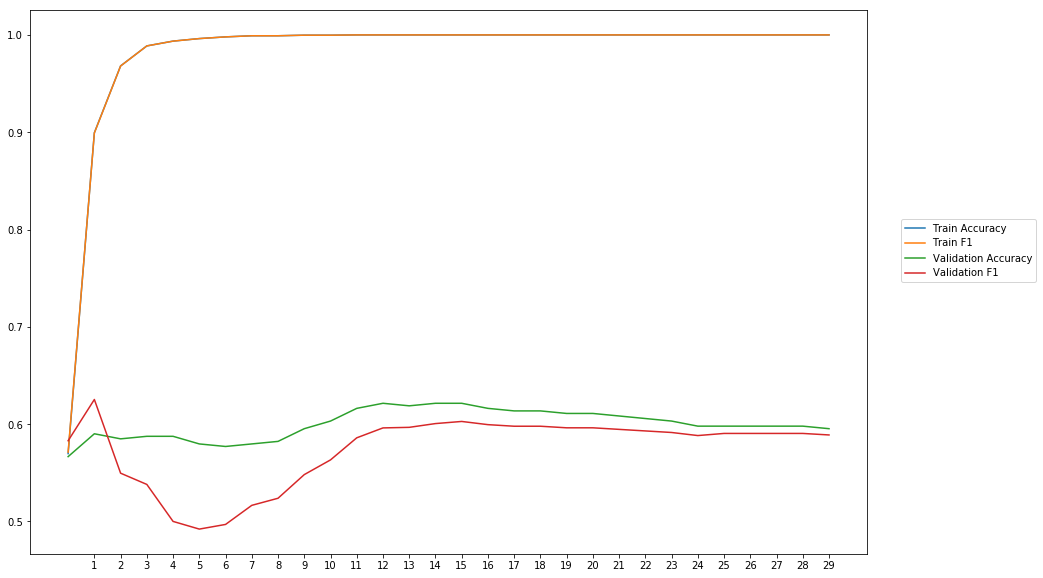

Average Accuracy: 60.00%
Average Precision: 61.21%
Average Recall: 54.49%
Average F1: 57.41%

-----Fold 6--------


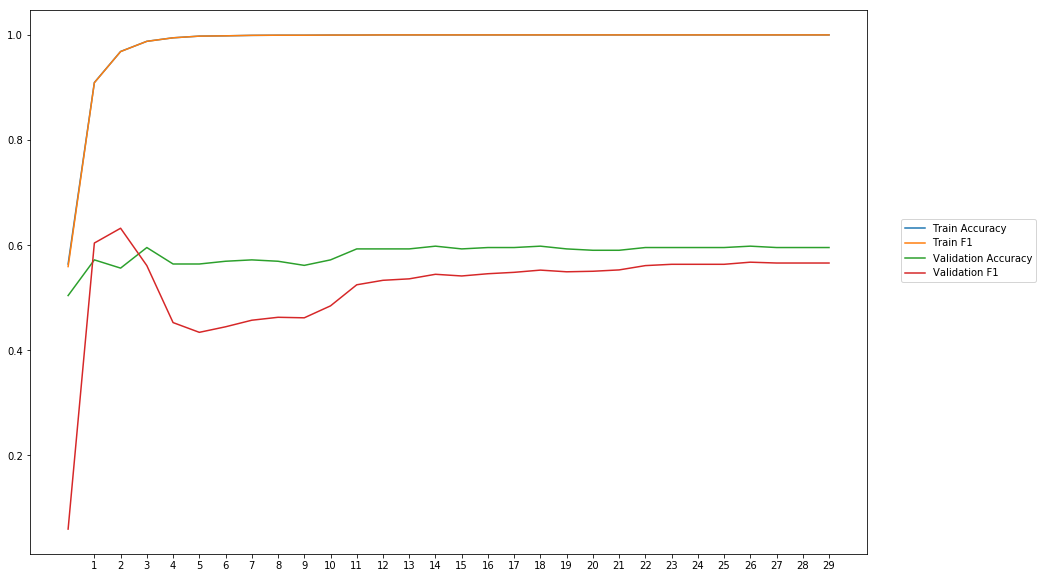

Average Accuracy: 58.31%
Average Precision: 60.71%
Average Recall: 46.88%
Average F1: 51.82%

-----Fold 7--------


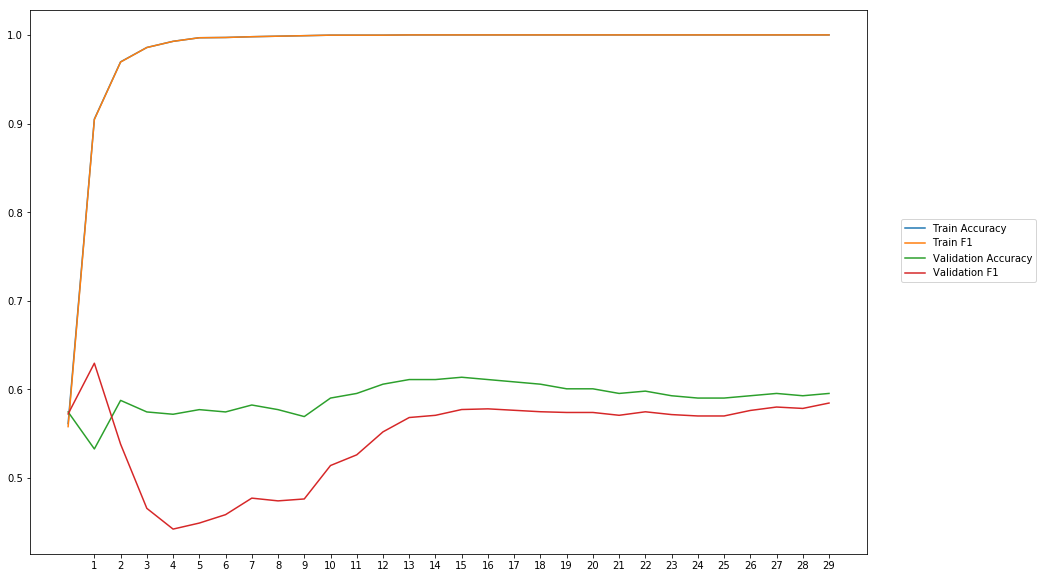

Average Accuracy: 59.05%
Average Precision: 61.35%
Average Recall: 50.00%
Average F1: 54.47%

-----Fold 8--------


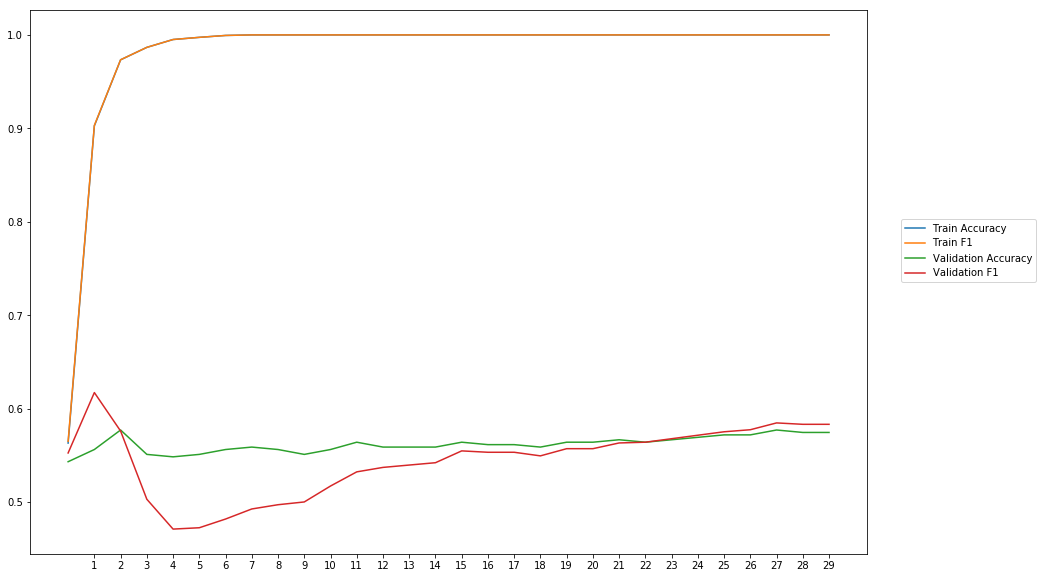

Average Accuracy: 56.18%
Average Precision: 56.52%
Average Recall: 52.95%
Average F1: 54.42%

-----Fold 9--------


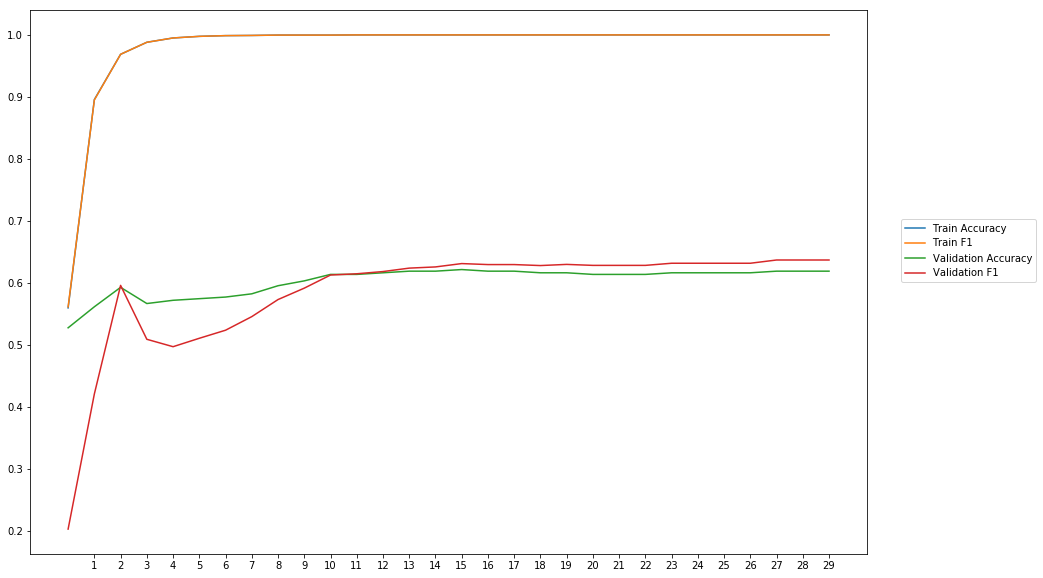

Average Accuracy: 60.29%
Average Precision: 60.68%
Average Recall: 58.13%
Average F1: 58.44%

-----Fold 10--------


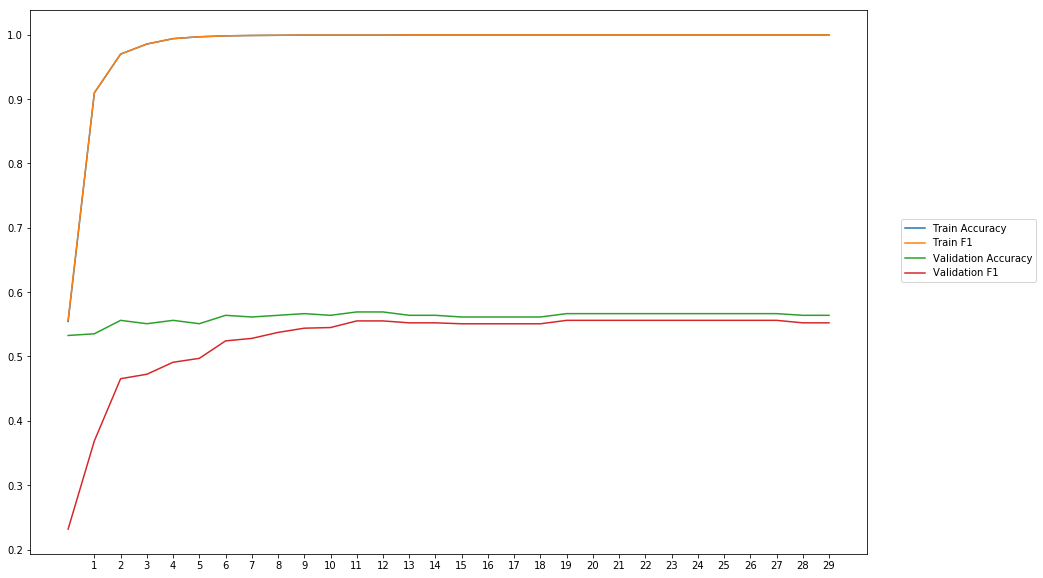

Average Accuracy: 56.14%
Average Precision: 57.11%
Average Recall: 49.65%
Average F1: 52.44%

-------Overallresults-------


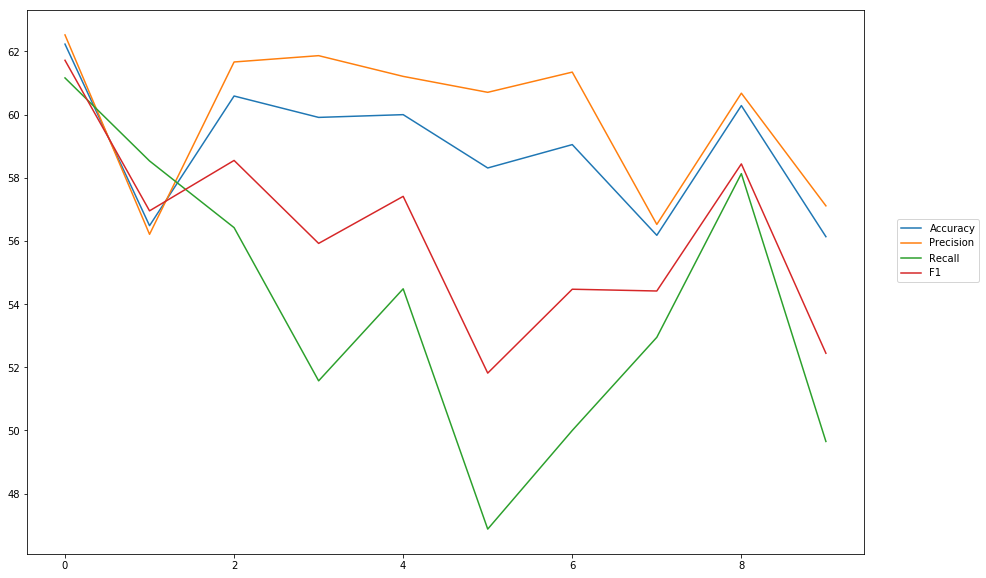

Accuracy: Mean = 58.92% (+/- 1.98%), Max = 62.23%, Min =  56.14%
Precision: Mean = 59.99% (+/- 2.27%), Max = 62.53%, Min =  56.21%
Recall: Mean = 53.98% (+/- 4.33%), Max = 61.16%, Min =  46.88%
F1: Mean = 56.21% (+/- 2.87%), Max = 61.72%, Min =  51.82%


In [57]:
cross_val_three_inputs(model_13, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationAfterHiddenOut')

# Before and after hidden layer and output layer, axis =1

In [58]:
#Word Embeddings
wv_layer_14 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

input_embedding_14 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')
embedded_sequences_14 = wv_layer_14(input_embedding_14)
x_embedding_14 = BatchNormalization()(embedded_sequences_14)
x_embedding_14 = Dense(600, activation='relu')(x_embedding_14)
x_embedding_14 = BatchNormalization()(x_embedding_14)
x_embedding_14 = Flatten()(x_embedding_14)

#Sentiment Features
input_sentiment_14 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_sentiment_14 = BatchNormalization()(input_sentiment_14)
x_sentiment_14 = Dense(600, activation='relu')(x_sentiment_14)
x_sentiment_14 = BatchNormalization()(x_sentiment_14)

#POS Features
input_pos_14 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float')
x_pos_14 = BatchNormalization() (input_pos_14)
x_pos_14 = Dense(600, activation='relu')(x_pos_14)
x_pos_14 = BatchNormalization()(x_pos_14)

#Concatination
concat_14 = concatenate([x_embedding_14, x_sentiment_14, x_pos_14])
preds_14 = BatchNormalization(axis=1)(concat_14)
preds_14 = Dense(2, activation='softmax')(preds_14)

model_14 = Model(inputs=[input_embedding_14, input_sentiment_14, input_pos_14], outputs=preds_14)


-----Fold 1--------


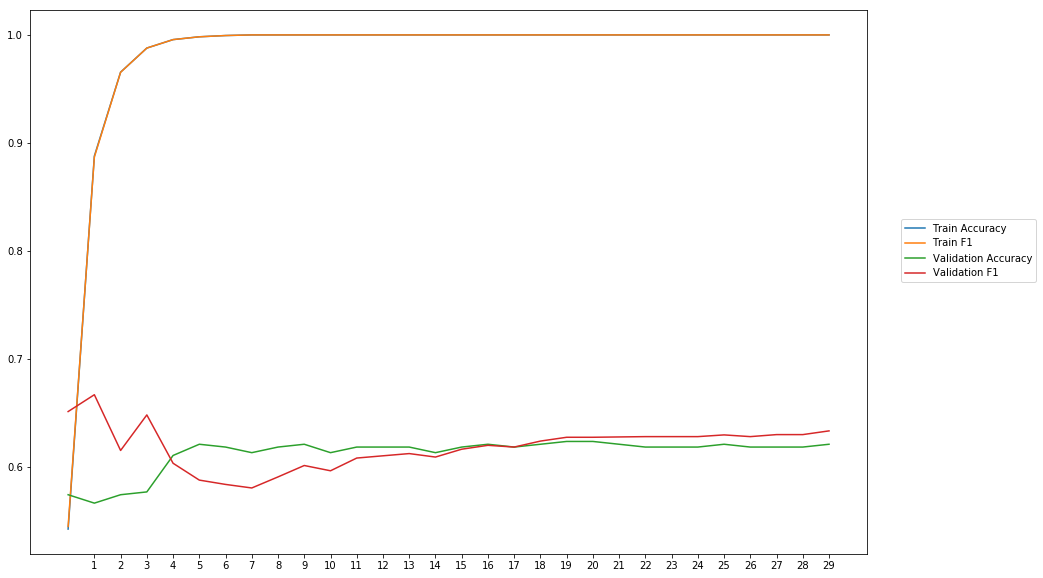

Average Accuracy: 61.23%
Average Precision: 61.04%
Average Recall: 63.40%
Average F1: 61.85%

-----Fold 2--------


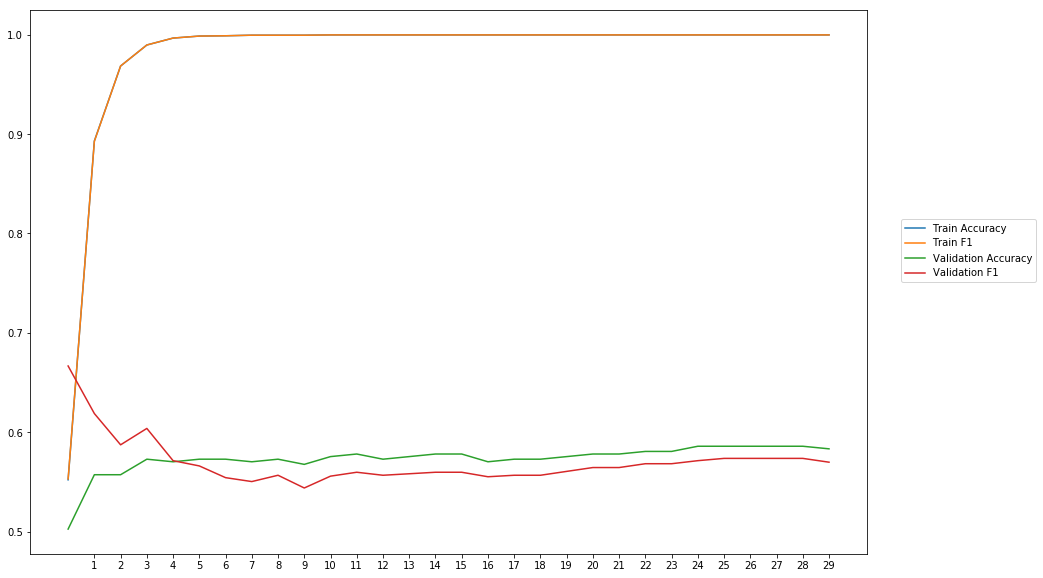

Average Accuracy: 57.33%
Average Precision: 57.39%
Average Recall: 57.40%
Average F1: 57.00%

-----Fold 3--------


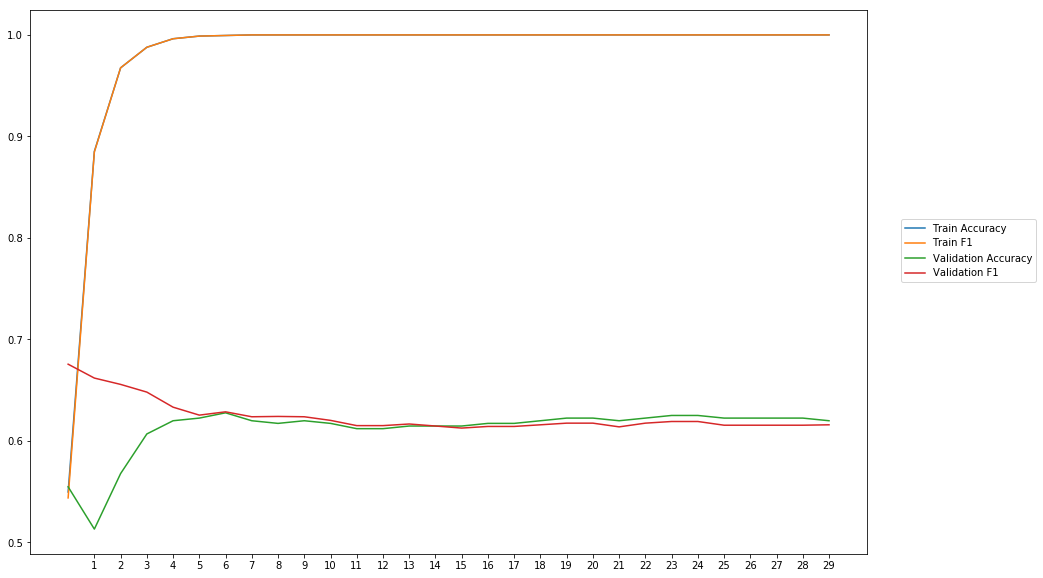

Average Accuracy: 61.18%
Average Precision: 60.71%
Average Recall: 65.18%
Average F1: 62.40%

-----Fold 4--------


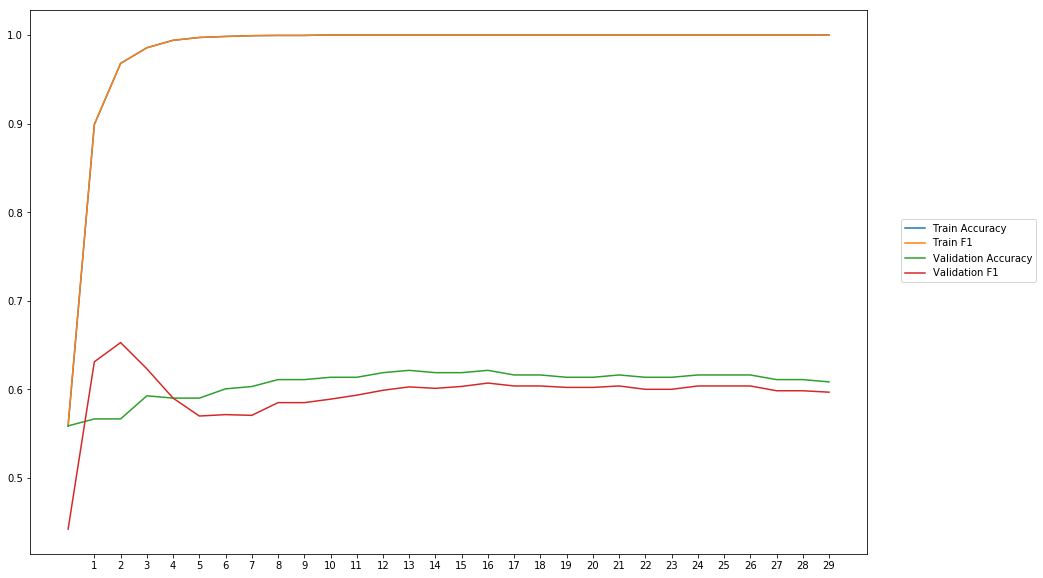

Average Accuracy: 60.66%
Average Precision: 61.32%
Average Recall: 58.31%
Average F1: 59.46%

-----Fold 5--------


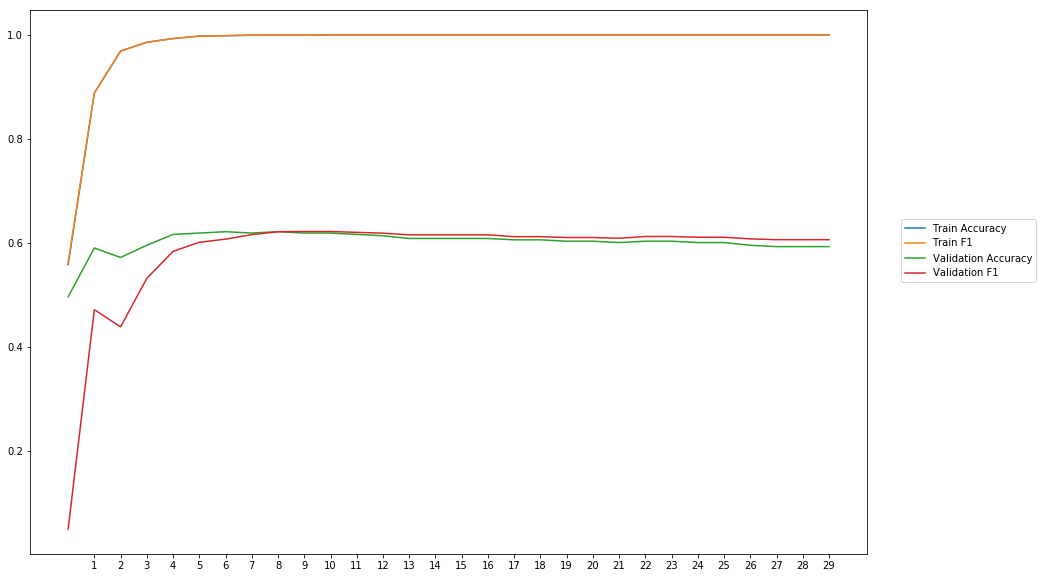

Average Accuracy: 60.17%
Average Precision: 60.18%
Average Recall: 57.64%
Average F1: 57.96%

-----Fold 6--------


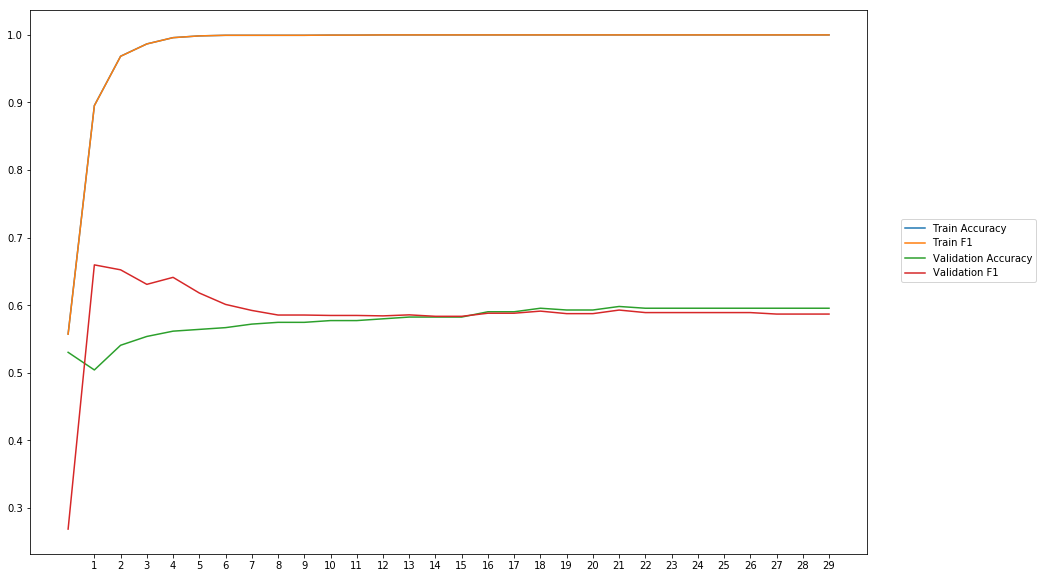

Average Accuracy: 57.81%
Average Precision: 57.70%
Average Recall: 61.43%
Average F1: 58.59%

-----Fold 7--------


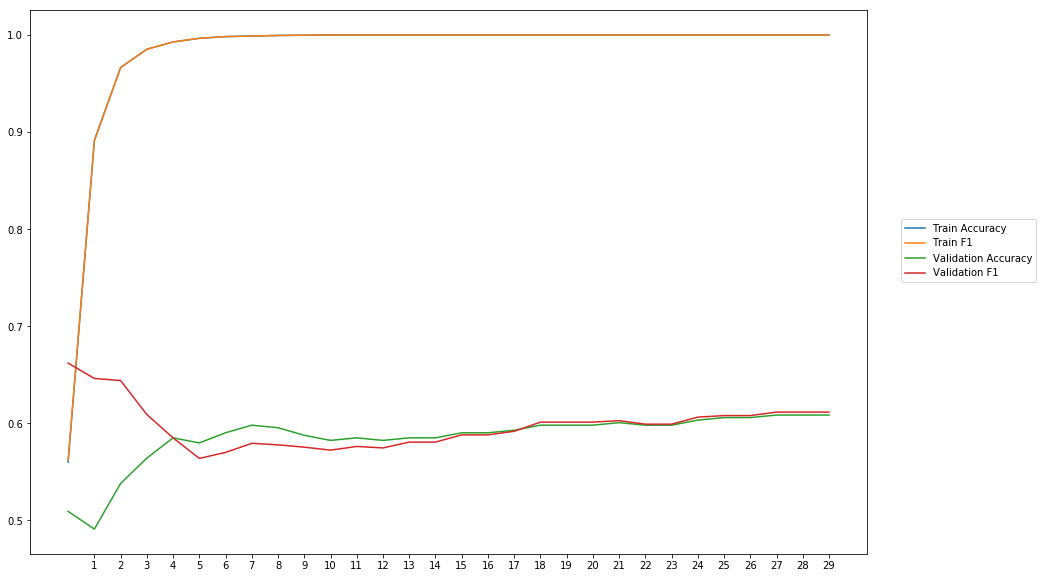

Average Accuracy: 58.53%
Average Precision: 58.43%
Average Recall: 62.30%
Average F1: 59.74%

-----Fold 8--------


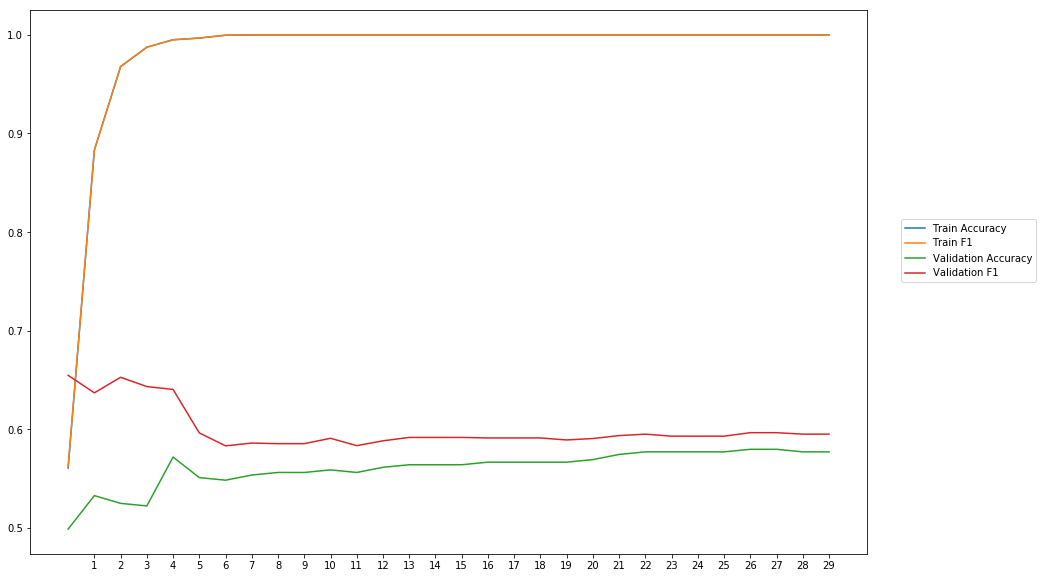

Average Accuracy: 56.05%
Average Precision: 55.19%
Average Recall: 66.67%
Average F1: 60.02%

-----Fold 9--------


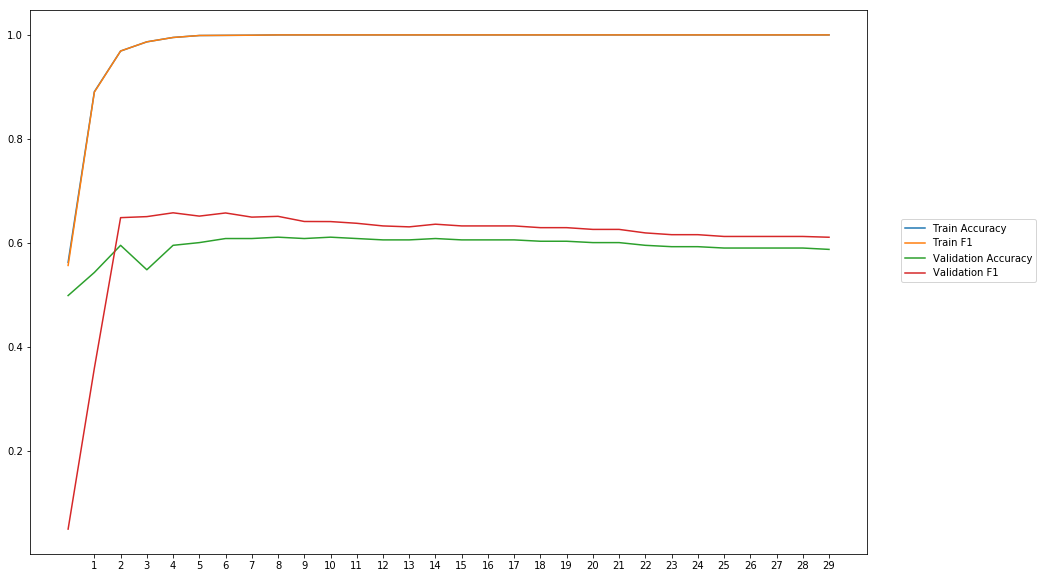

Average Accuracy: 59.36%
Average Precision: 57.92%
Average Recall: 65.64%
Average F1: 60.38%

-----Fold 10--------


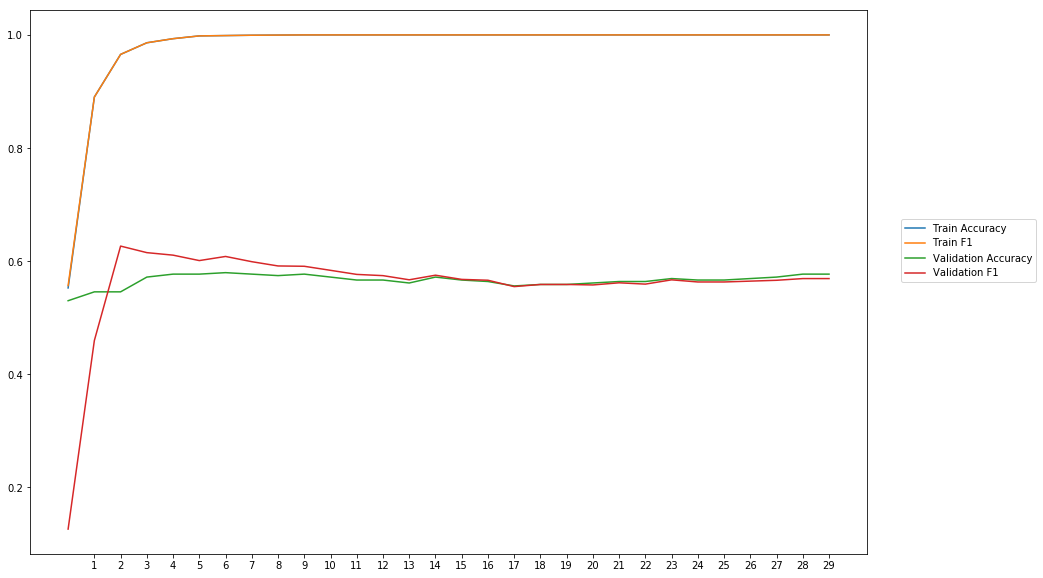

Average Accuracy: 56.61%
Average Precision: 57.43%
Average Recall: 56.93%
Average F1: 55.84%

-------Overallresults-------


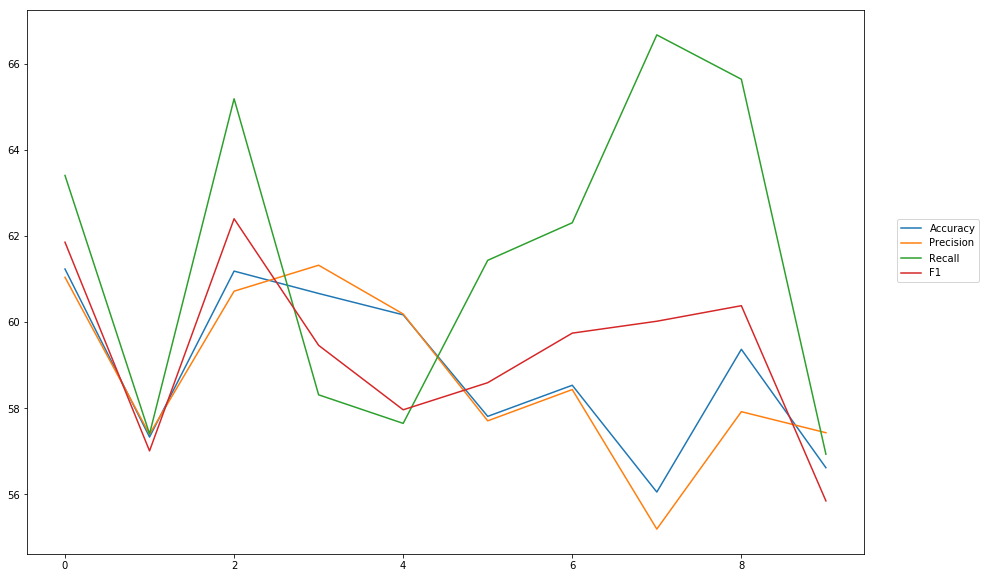

Accuracy: Mean = 58.89% (+/- 1.81%), Max = 61.23%, Min =  56.05%
Precision: Mean = 58.73% (+/- 1.89%), Max = 61.32%, Min =  55.19%
Recall: Mean = 61.49% (+/- 3.53%), Max = 66.67%, Min =  56.93%
F1: Mean = 59.32% (+/- 1.94%), Max = 62.40%, Min =  55.84%


In [59]:
cross_val_three_inputs(model_14, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, softmax, outputpath, 'normalizationBeforeAfterHiddenOut')

# Test the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


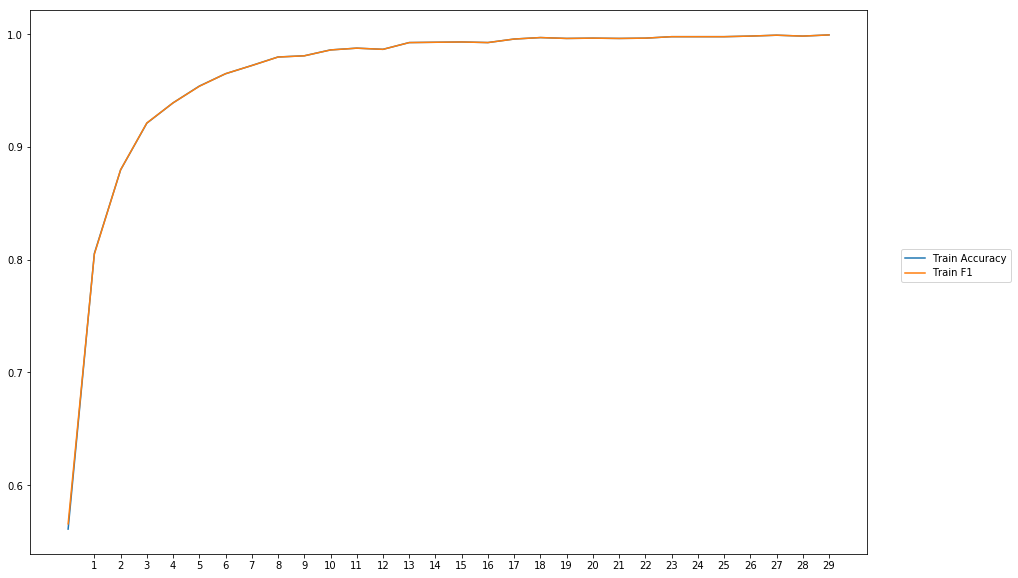


-----Test Scores----
Loss: 0.9341883221451117
Accuracy: 61.47959183673469
Precision: 51.18110234877137
Recall: 62.700964610064005
F1: 56.35837653776482


In [17]:
train_evaluate_three_inputs(model_7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_senti_blob, train_pos, train_labels, test_data, test_senti_blob, test_pos, test_labels, softmax, outputpath, 'final_BatchNorm')